In [1]:
import json

with open("./params.json", mode = "r", encoding = "utf-8") as f:
    data = json.load(f)
    model_path = data["model_path"]
    dataset_path_train = data["dataset_path"]["train"]
    dataset_path_test = data["dataset_path"]["test"]
    num_single_sample_timesteps = data["num_single_sample_timesteps"]
    input_window_length = data["input_window_length"]
    label_window_length = data["label_window_length"]
    input_features = data["input_features"]
    label_features = data["label_features"]

    # Usually window_stride = 1 since we want to check each input window
    window_stride = 20
    seed_val = 0

In [2]:
import torch
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(seed_val)
random.seed(seed_val)
np.random.seed(seed_val)

In [3]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from utils.pipeline.Model import TimeSeriesHuggingFaceTransformer
from utils.pipeline.Data import get_mean_std, WindowedIterableDataset
from utils.pipeline.Run import autoregress

/users/labnet5/gr5/abahari/Documents/Thesis/src/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
stats = get_mean_std(
    dataset_path = dataset_path_train,
    cols = input_features
)

df_test = WindowedIterableDataset(
    dataset_path = dataset_path_test,
    stats = stats,
    input_features = input_features,
    label_features = label_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    stride = window_stride,
    input_window_length = input_window_length,
    label_window_length = label_window_length,
    inference = True
)

data_loader_test = DataLoader(
    df_test,
    batch_size = 1,    # One windowed datapoint at a time
    pin_memory = True
)

## Prediction

In [5]:
model = torch.load(model_path, weights_only = False).to(device)
model.eval()

TimeSeriesHuggingFaceTransformer(
  (shared): Embedding(1, 64)
  (encoder): T5Stack(
    (embed_tokens): Linear(in_features=5, out_features=64, bias=True)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=64, out_features=64, bias=False)
              (k): Linear(in_features=64, out_features=64, bias=False)
              (v): Linear(in_features=64, out_features=64, bias=False)
              (o): Linear(in_features=64, out_features=64, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=64, out_features=64, bias=False)
              (wo): Linear(in_features=64, out_features=64, bias=False)
              

0it [00:00, ?it/s, single_test_loss=0.003887]

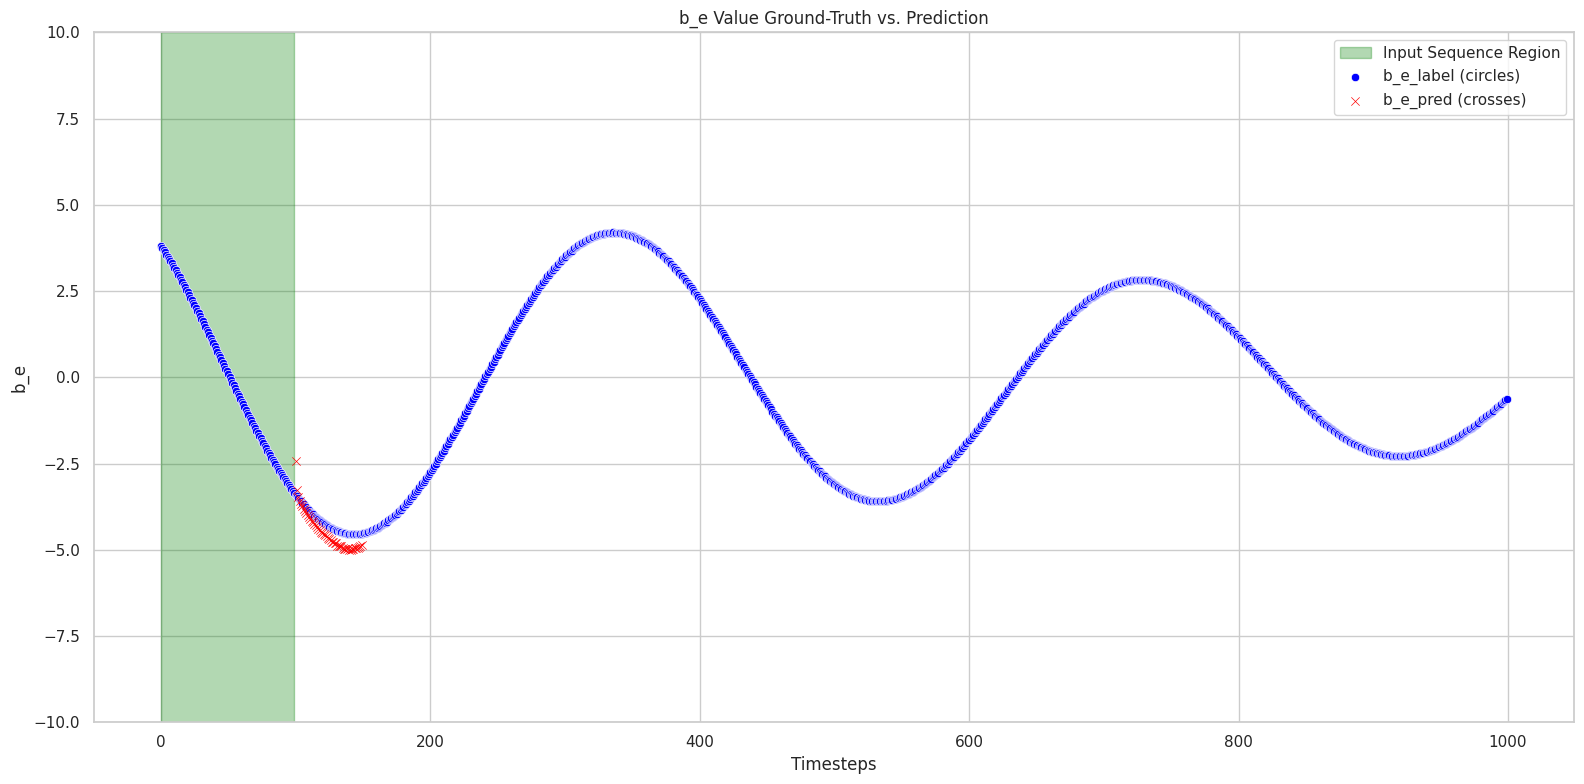

1it [00:00,  2.07it/s, single_test_loss=0.004430]

Output Timestep 101
    Input Timesteps [ 1  2  3  4  5  6  7  8  9 10]
    Scores ['0.01167', '0.01163', '0.01159', '0.01156', '0.01153', '0.01150', '0.01146', '0.01141', '0.01138', '0.01134']

Output Timestep 102
    Input Timesteps [ 1  2  3  4  5  6  7  8  9 10]
    Scores ['0.01097', '0.01096', '0.01096', '0.01096', '0.01095', '0.01095', '0.01095', '0.01094', '0.01093', '0.01092']

Output Timestep 103
    Input Timesteps [ 6  5  1  4  3  7  2  8  9 10]
    Scores ['0.01090', '0.01090', '0.01090', '0.01090', '0.01090', '0.01090', '0.01090', '0.01089', '0.01089', '0.01088']

Output Timestep 104
    Input Timesteps [ 7  6  5  8  9  4 10  3 11 12]
    Scores ['0.01080', '0.01080', '0.01079', '0.01079', '0.01079', '0.01079', '0.01079', '0.01079', '0.01079', '0.01078']

Output Timestep 105
    Input Timesteps [ 7 12 11 13 10  9  6  8 14 15]
    Scores ['0.01069', '0.01069', '0.01069', '0.01069', '0.01069', '0.01069', '0.01069', '0.01069', '0.01069', '0.01069']

Output Timestep 106
    I

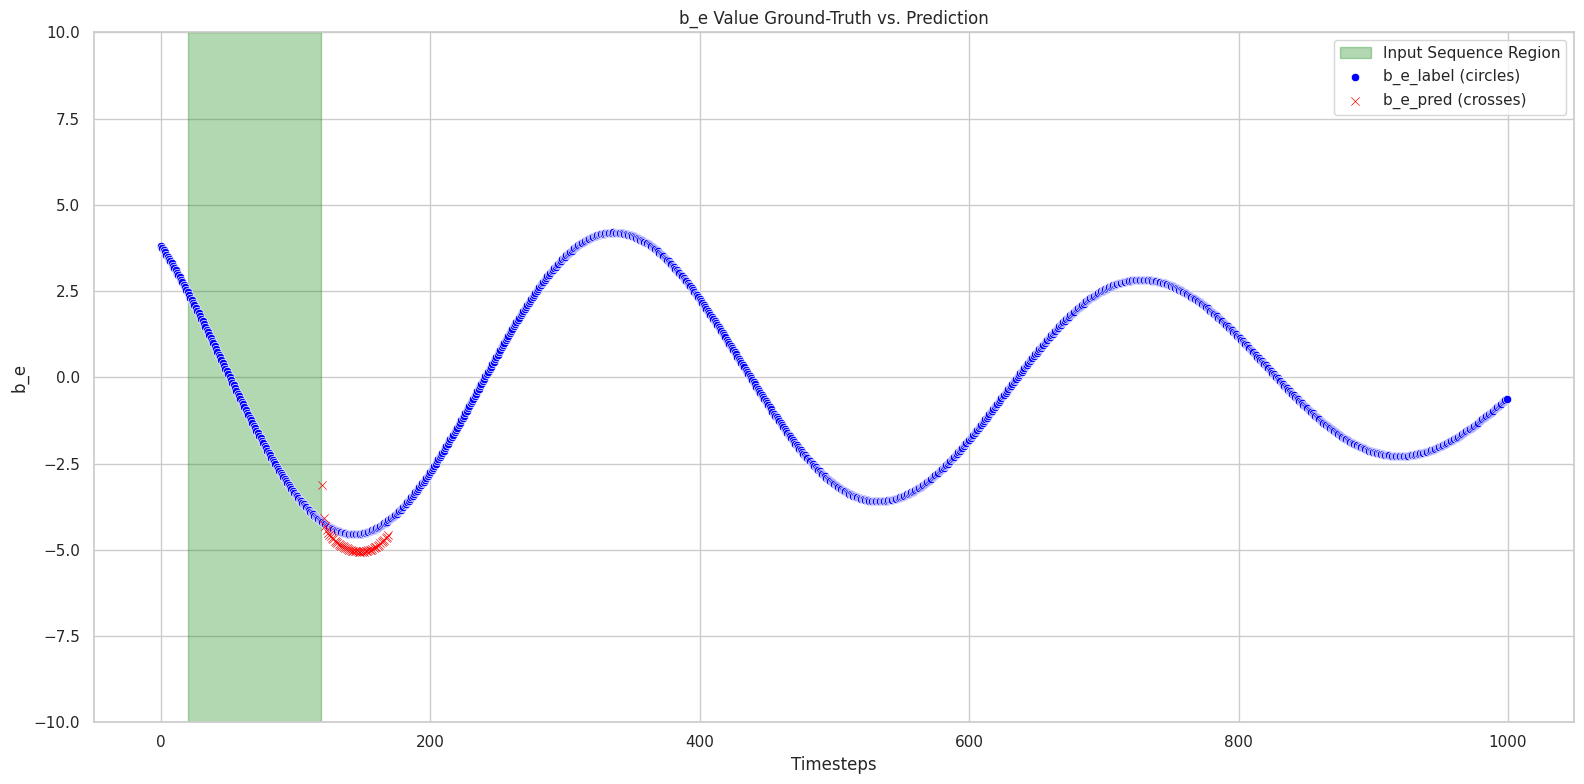

2it [00:00,  2.93it/s, single_test_loss=0.005004]

Output Timestep 121
    Input Timesteps [21 22 23 24 25 26 27 28 29 30]
    Scores ['0.01202', '0.01197', '0.01193', '0.01188', '0.01183', '0.01179', '0.01175', '0.01169', '0.01165', '0.01161']

Output Timestep 122
    Input Timesteps [21 22 23 24 25 26 27 28 29 30]
    Scores ['0.01154', '0.01152', '0.01150', '0.01148', '0.01145', '0.01144', '0.01141', '0.01139', '0.01137', '0.01135']

Output Timestep 123
    Input Timesteps [21 22 23 24 25 26 27 28 29 30]
    Scores ['0.01146', '0.01145', '0.01143', '0.01141', '0.01139', '0.01138', '0.01136', '0.01134', '0.01132', '0.01130']

Output Timestep 124
    Input Timesteps [21 22 23 24 25 26 27 28 29 30]
    Scores ['0.01133', '0.01132', '0.01131', '0.01130', '0.01128', '0.01127', '0.01126', '0.01124', '0.01122', '0.01121']

Output Timestep 125
    Input Timesteps [21 22 23 24 25 26 27 28 29 30]
    Scores ['0.01121', '0.01120', '0.01119', '0.01118', '0.01117', '0.01116', '0.01115', '0.01114', '0.01113', '0.01112']

Output Timestep 126
    I

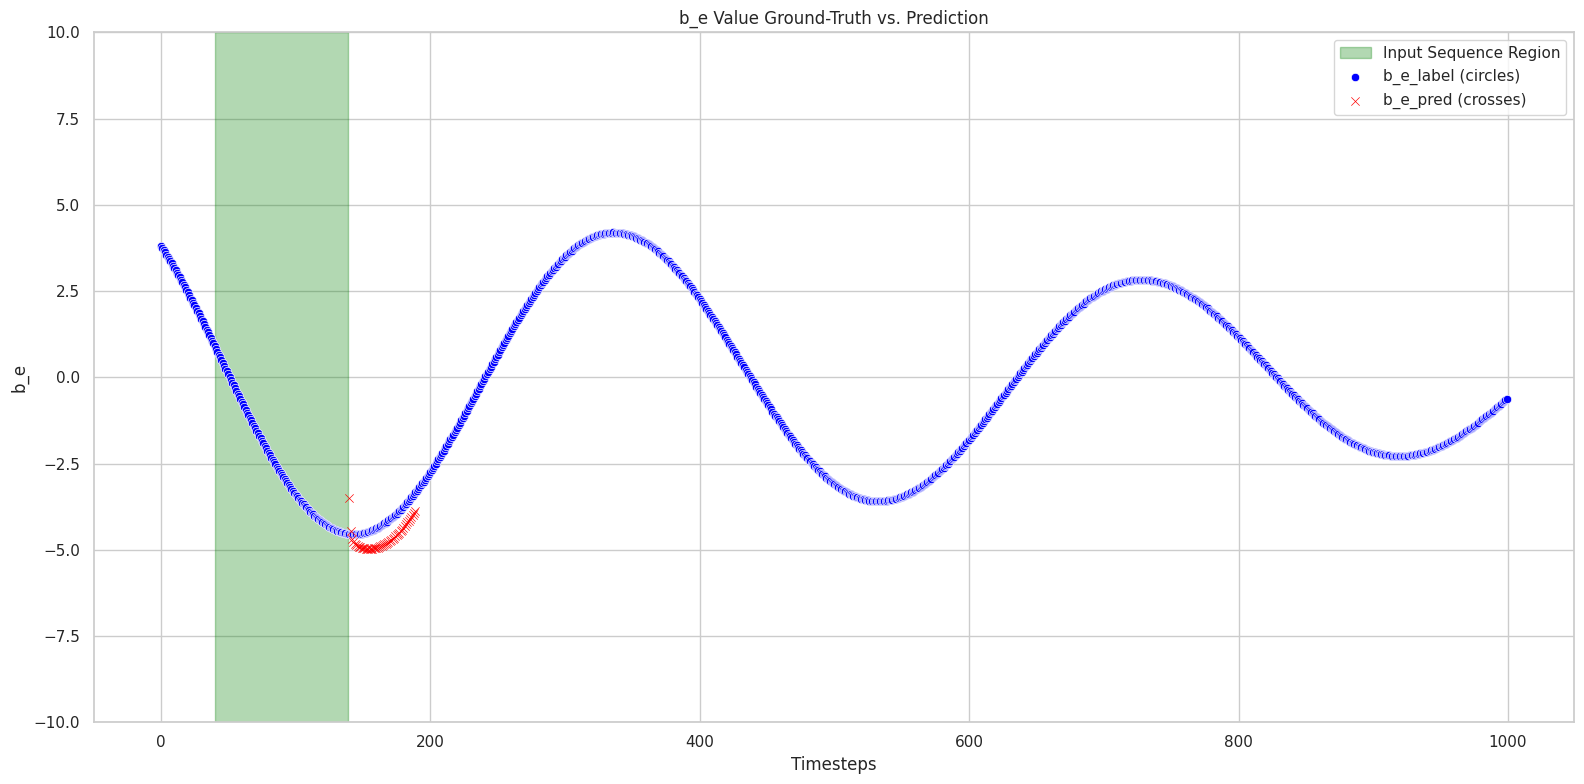

3it [00:01,  3.45it/s, single_test_loss=0.005036]

Output Timestep 141
    Input Timesteps [41 42 43 44 45 46 47 48 49 50]
    Scores ['0.01235', '0.01229', '0.01222', '0.01217', '0.01211', '0.01206', '0.01200', '0.01194', '0.01189', '0.01183']

Output Timestep 142
    Input Timesteps [41 42 43 44 45 46 47 48 49 50]
    Scores ['0.01201', '0.01198', '0.01194', '0.01190', '0.01187', '0.01184', '0.01180', '0.01176', '0.01173', '0.01169']

Output Timestep 143
    Input Timesteps [41 42 43 44 45 46 47 48 49 50]
    Scores ['0.01192', '0.01189', '0.01185', '0.01183', '0.01180', '0.01177', '0.01174', '0.01170', '0.01167', '0.01164']

Output Timestep 144
    Input Timesteps [41 42 43 44 45 46 47 48 49 50]
    Scores ['0.01180', '0.01177', '0.01174', '0.01172', '0.01169', '0.01167', '0.01164', '0.01161', '0.01158', '0.01156']

Output Timestep 145
    Input Timesteps [41 42 43 44 45 46 47 48 49 50]
    Scores ['0.01167', '0.01165', '0.01162', '0.01160', '0.01158', '0.01156', '0.01154', '0.01151', '0.01149', '0.01146']

Output Timestep 146
    I

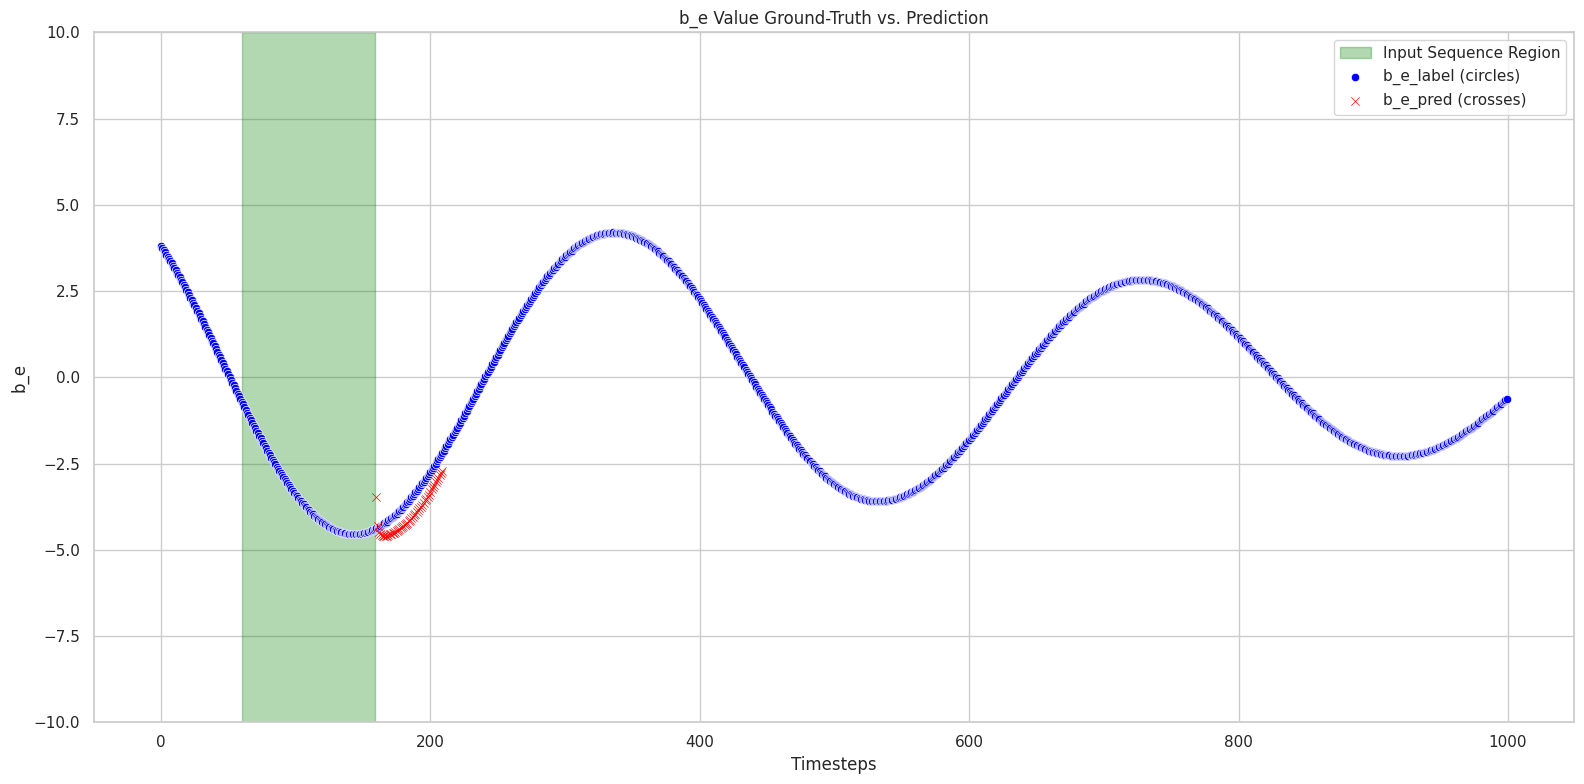

4it [00:01,  3.78it/s, single_test_loss=0.004874]

Output Timestep 161
    Input Timesteps [61 62 63 64 65 66 67 68 69 70]
    Scores ['0.01257', '0.01251', '0.01245', '0.01239', '0.01233', '0.01227', '0.01221', '0.01215', '0.01209', '0.01203']

Output Timestep 162
    Input Timesteps [61 62 63 64 65 66 67 68 69 70]
    Scores ['0.01224', '0.01220', '0.01216', '0.01211', '0.01207', '0.01203', '0.01198', '0.01193', '0.01189', '0.01184']

Output Timestep 163
    Input Timesteps [61 62 63 64 65 66 67 68 69 70]
    Scores ['0.01213', '0.01210', '0.01206', '0.01202', '0.01198', '0.01194', '0.01191', '0.01186', '0.01182', '0.01178']

Output Timestep 164
    Input Timesteps [61 62 63 64 65 66 67 68 69 70]
    Scores ['0.01201', '0.01198', '0.01195', '0.01191', '0.01188', '0.01185', '0.01181', '0.01177', '0.01173', '0.01170']

Output Timestep 165
    Input Timesteps [61 62 63 64 65 66 67 68 69 70]
    Scores ['0.01189', '0.01186', '0.01183', '0.01180', '0.01177', '0.01174', '0.01171', '0.01167', '0.01164', '0.01160']

Output Timestep 166
    I

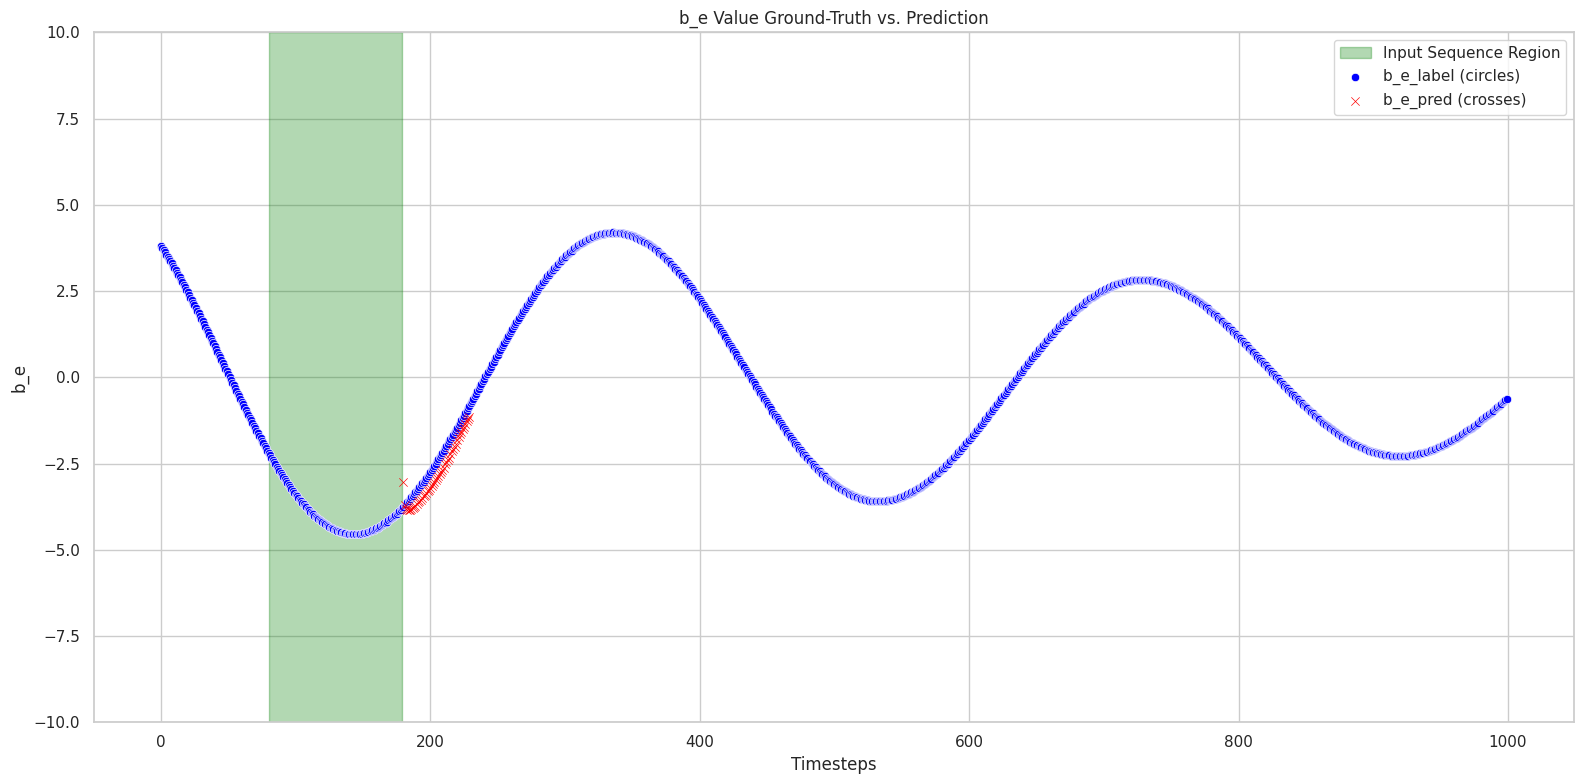

5it [00:01,  3.98it/s, single_test_loss=0.005321]

Output Timestep 181
    Input Timesteps [81 82 83 84 85 86 87 88 89 90]
    Scores ['0.01263', '0.01258', '0.01252', '0.01247', '0.01242', '0.01237', '0.01232', '0.01226', '0.01221', '0.01215']

Output Timestep 182
    Input Timesteps [81 82 83 84 85 86 87 88 89 90]
    Scores ['0.01212', '0.01208', '0.01204', '0.01200', '0.01196', '0.01192', '0.01188', '0.01184', '0.01180', '0.01176']

Output Timestep 183
    Input Timesteps [81 82 83 84 85 86 87 88 89 90]
    Scores ['0.01200', '0.01197', '0.01193', '0.01190', '0.01186', '0.01183', '0.01179', '0.01175', '0.01171', '0.01168']

Output Timestep 184
    Input Timesteps [81 82 83 84 85 86 87 88 89 90]
    Scores ['0.01189', '0.01186', '0.01182', '0.01179', '0.01176', '0.01173', '0.01170', '0.01166', '0.01163', '0.01159']

Output Timestep 185
    Input Timesteps [81 82 83 84 85 86 87 88 89 90]
    Scores ['0.01177', '0.01174', '0.01171', '0.01168', '0.01165', '0.01163', '0.01160', '0.01156', '0.01153', '0.01150']

Output Timestep 186
    I

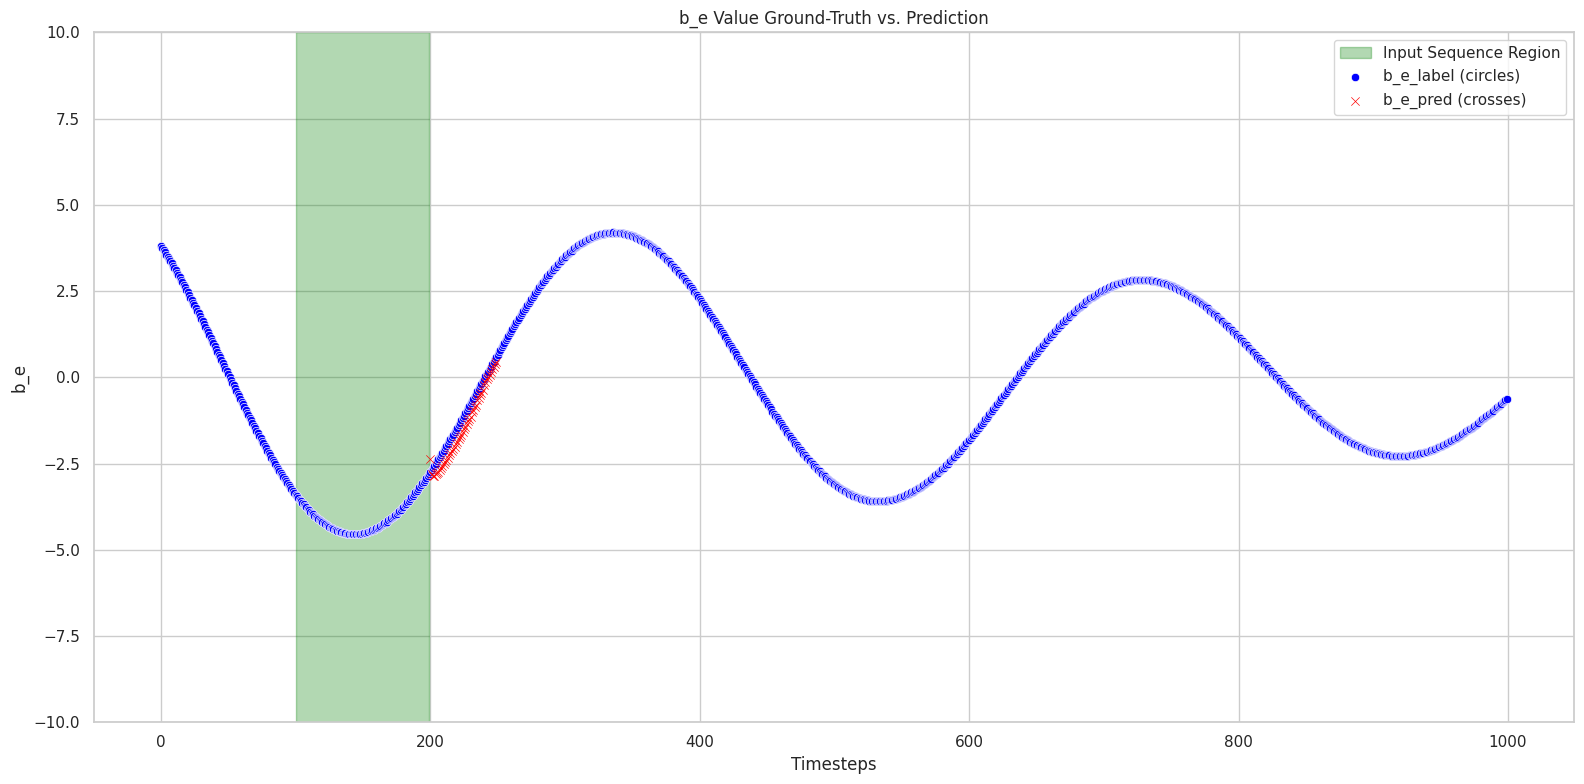

6it [00:01,  4.12it/s, single_test_loss=0.005582]

Output Timestep 201
    Input Timesteps [101 102 103 104 105 106 107 108 109 110]
    Scores ['0.01288', '0.01281', '0.01275', '0.01269', '0.01263', '0.01257', '0.01251', '0.01244', '0.01238', '0.01231']

Output Timestep 202
    Input Timesteps [101 102 103 104 105 106 107 108 109 110]
    Scores ['0.01199', '0.01195', '0.01191', '0.01187', '0.01183', '0.01179', '0.01175', '0.01170', '0.01166', '0.01162']

Output Timestep 203
    Input Timesteps [101 102 103 104 105 106 107 108 109 110]
    Scores ['0.01185', '0.01182', '0.01178', '0.01175', '0.01171', '0.01167', '0.01164', '0.01160', '0.01156', '0.01152']

Output Timestep 204
    Input Timesteps [101 102 103 104 105 106 107 108 109 110]
    Scores ['0.01173', '0.01170', '0.01166', '0.01163', '0.01160', '0.01156', '0.01153', '0.01149', '0.01146', '0.01142']

Output Timestep 205
    Input Timesteps [101 102 103 104 105 106 107 108 109 110]
    Scores ['0.01161', '0.01158', '0.01155', '0.01152', '0.01149', '0.01146', '0.01143', '0.01139'

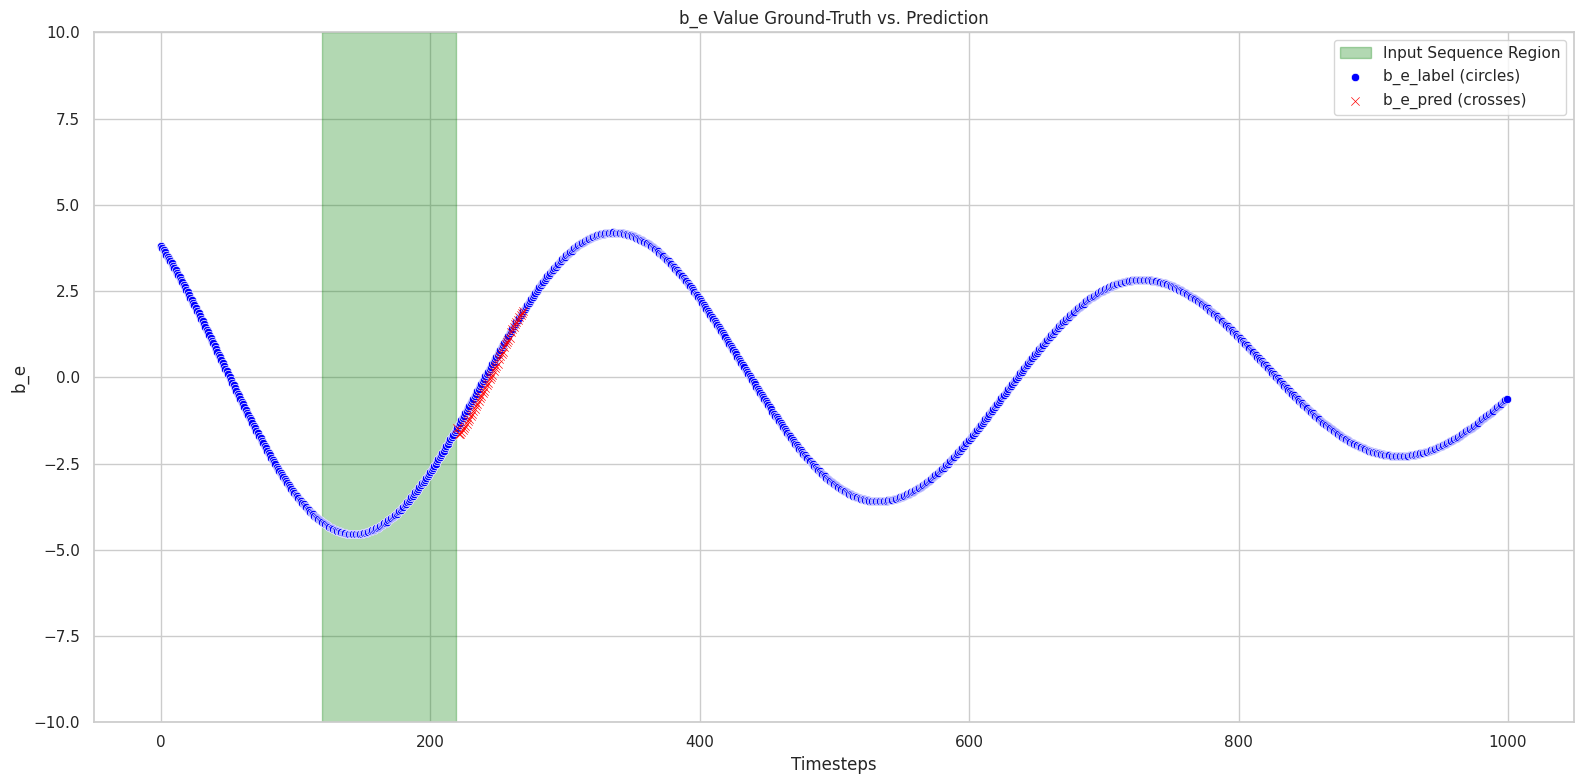

7it [00:01,  4.21it/s, single_test_loss=0.005457]

Output Timestep 221
    Input Timesteps [121 122 123 124 125 126 127 128 129 130]
    Scores ['0.01290', '0.01284', '0.01277', '0.01271', '0.01264', '0.01257', '0.01251', '0.01244', '0.01237', '0.01231']

Output Timestep 222
    Input Timesteps [121 122 123 124 125 126 127 128 129 130]
    Scores ['0.01171', '0.01168', '0.01164', '0.01160', '0.01156', '0.01153', '0.01149', '0.01145', '0.01141', '0.01137']

Output Timestep 223
    Input Timesteps [121 122 123 124 125 126 127 128 129 130]
    Scores ['0.01157', '0.01154', '0.01151', '0.01148', '0.01144', '0.01141', '0.01137', '0.01134', '0.01131', '0.01127']

Output Timestep 224
    Input Timesteps [121 122 123 124 125 126 127 128 129 130]
    Scores ['0.01145', '0.01141', '0.01138', '0.01136', '0.01132', '0.01129', '0.01126', '0.01123', '0.01120', '0.01117']

Output Timestep 225
    Input Timesteps [121 122 123 124 125 126 127 128 129 130]
    Scores ['0.01133', '0.01130', '0.01127', '0.01125', '0.01122', '0.01119', '0.01116', '0.01113'

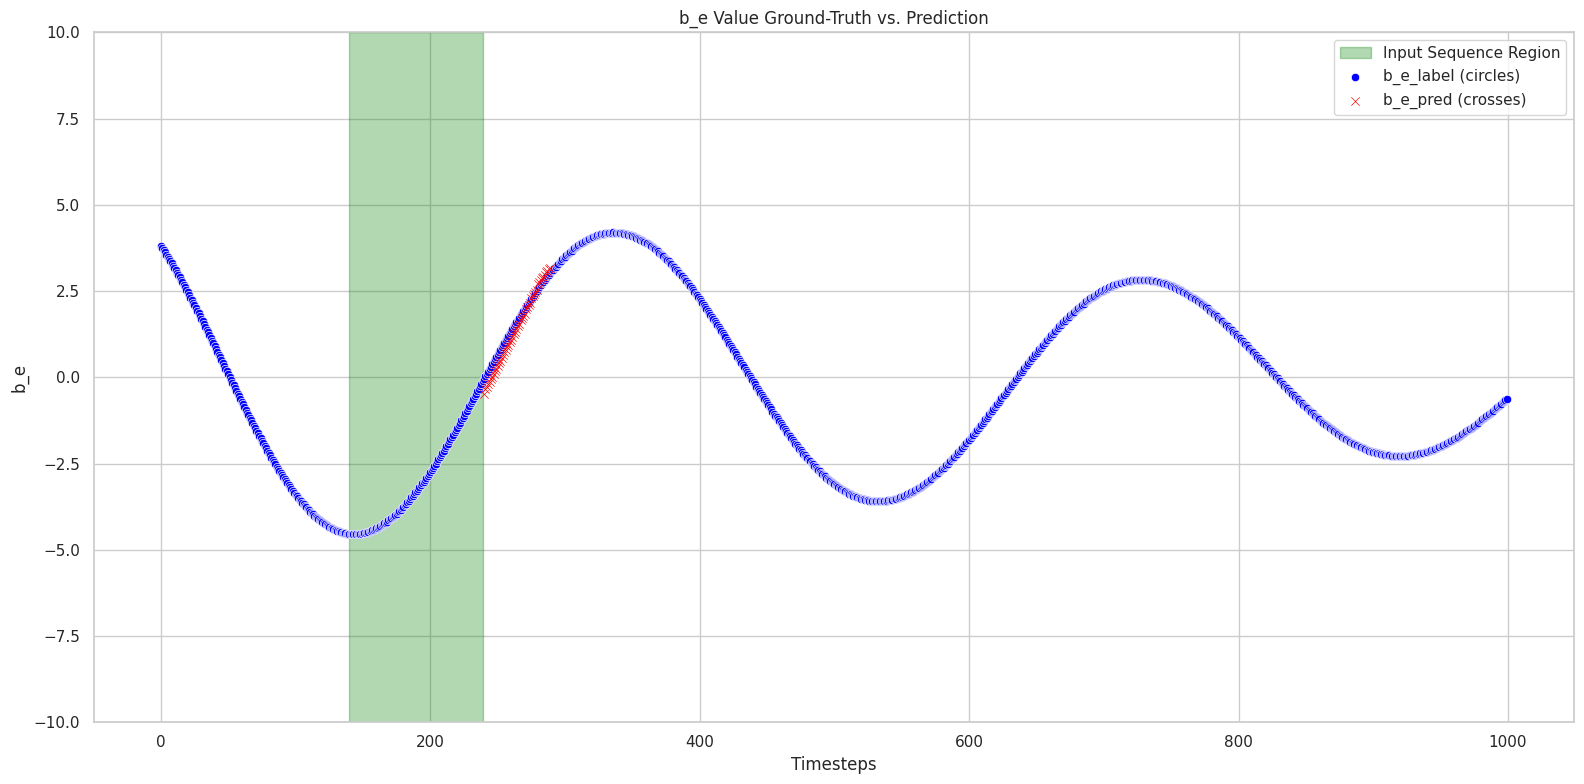

8it [00:02,  4.25it/s, single_test_loss=0.004753]

Output Timestep 241
    Input Timesteps [141 142 143 144 145 146 147 148 149 150]
    Scores ['0.01278', '0.01271', '0.01264', '0.01258', '0.01251', '0.01244', '0.01237', '0.01230', '0.01223', '0.01216']

Output Timestep 242
    Input Timesteps [141 142 143 144 145 146 147 148 149 150]
    Scores ['0.01140', '0.01137', '0.01133', '0.01130', '0.01127', '0.01124', '0.01120', '0.01117', '0.01114', '0.01110']

Output Timestep 243
    Input Timesteps [141 142 143 144 145 146 147 148 149 150]
    Scores ['0.01129', '0.01126', '0.01123', '0.01120', '0.01117', '0.01114', '0.01111', '0.01109', '0.01106', '0.01103']

Output Timestep 244
    Input Timesteps [141 142 143 144 145 146 147 148 149 150]
    Scores ['0.01117', '0.01114', '0.01111', '0.01109', '0.01106', '0.01104', '0.01101', '0.01098', '0.01096', '0.01093']

Output Timestep 245
    Input Timesteps [141 142 143 144 145 146 147 148 149 150]
    Scores ['0.01106', '0.01103', '0.01101', '0.01099', '0.01096', '0.01094', '0.01091', '0.01089'

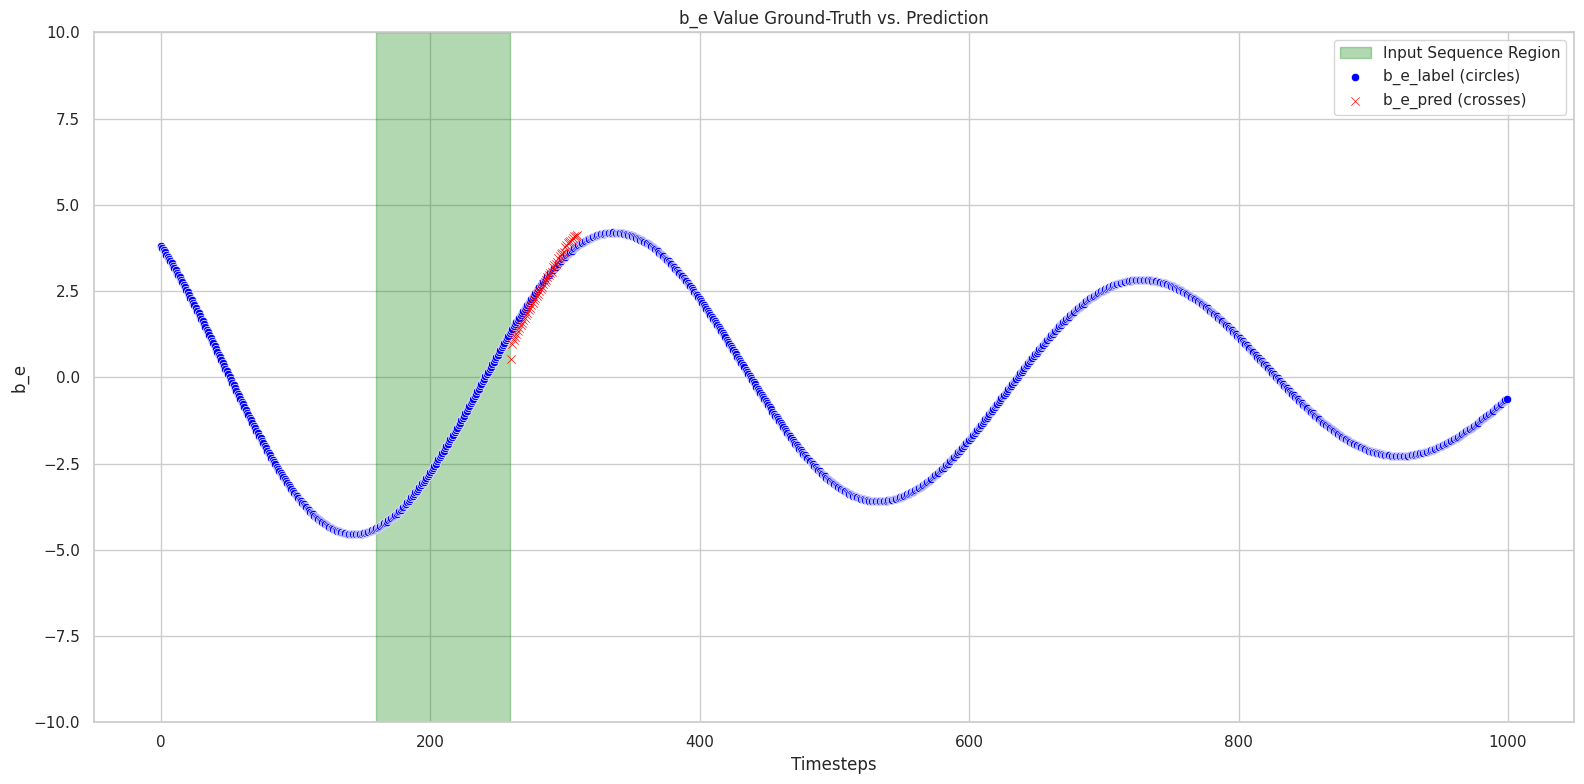

9it [00:02,  4.23it/s, single_test_loss=0.004955]

Output Timestep 261
    Input Timesteps [161 162 163 164 165 166 167 168 169 170]
    Scores ['0.01248', '0.01241', '0.01233', '0.01227', '0.01219', '0.01212', '0.01205', '0.01199', '0.01192', '0.01185']

Output Timestep 262
    Input Timesteps [161 162 163 164 165 166 167 168 169 170]
    Scores ['0.01111', '0.01107', '0.01104', '0.01101', '0.01098', '0.01095', '0.01092', '0.01089', '0.01086', '0.01083']

Output Timestep 263
    Input Timesteps [161 162 163 164 165 166 167 168 169 170]
    Scores ['0.01106', '0.01103', '0.01100', '0.01097', '0.01094', '0.01092', '0.01089', '0.01086', '0.01083', '0.01081']

Output Timestep 264
    Input Timesteps [161 162 163 164 165 166 167 168 169 170]
    Scores ['0.01095', '0.01092', '0.01090', '0.01087', '0.01085', '0.01082', '0.01080', '0.01077', '0.01075', '0.01072']

Output Timestep 265
    Input Timesteps [161 162 163 164 165 166 167 168 169 170]
    Scores ['0.01085', '0.01082', '0.01080', '0.01078', '0.01075', '0.01073', '0.01071', '0.01069'

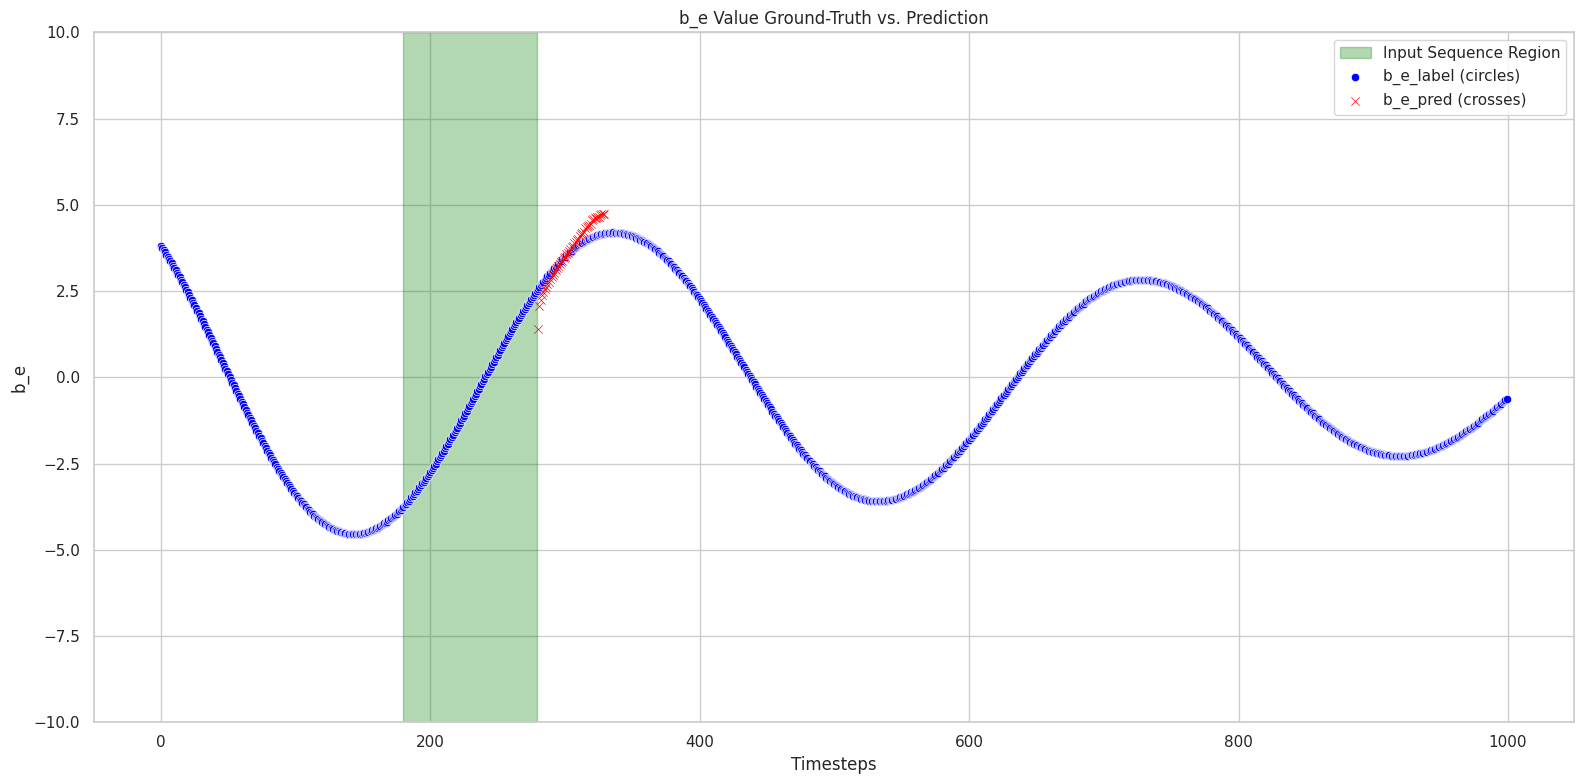

10it [00:02,  4.28it/s, single_test_loss=0.005903]

Output Timestep 281
    Input Timesteps [181 182 183 184 185 186 187 188 189 190]
    Scores ['0.01197', '0.01190', '0.01183', '0.01177', '0.01170', '0.01164', '0.01158', '0.01152', '0.01146', '0.01140']

Output Timestep 282
    Input Timesteps [181 182 183 184 185 186 187 188 189 190]
    Scores ['0.01086', '0.01084', '0.01081', '0.01078', '0.01075', '0.01073', '0.01071', '0.01068', '0.01066', '0.01064']

Output Timestep 283
    Input Timesteps [181 182 183 184 185 186 187 188 189 190]
    Scores ['0.01090', '0.01088', '0.01085', '0.01083', '0.01080', '0.01078', '0.01076', '0.01074', '0.01072', '0.01070']

Output Timestep 284
    Input Timesteps [181 182 183 184 185 186 187 188 189 190]
    Scores ['0.01082', '0.01080', '0.01078', '0.01076', '0.01073', '0.01071', '0.01069', '0.01068', '0.01066', '0.01064']

Output Timestep 285
    Input Timesteps [181 182 183 184 185 186 187 188 189 190]
    Scores ['0.01073', '0.01071', '0.01069', '0.01067', '0.01065', '0.01063', '0.01061', '0.01060'

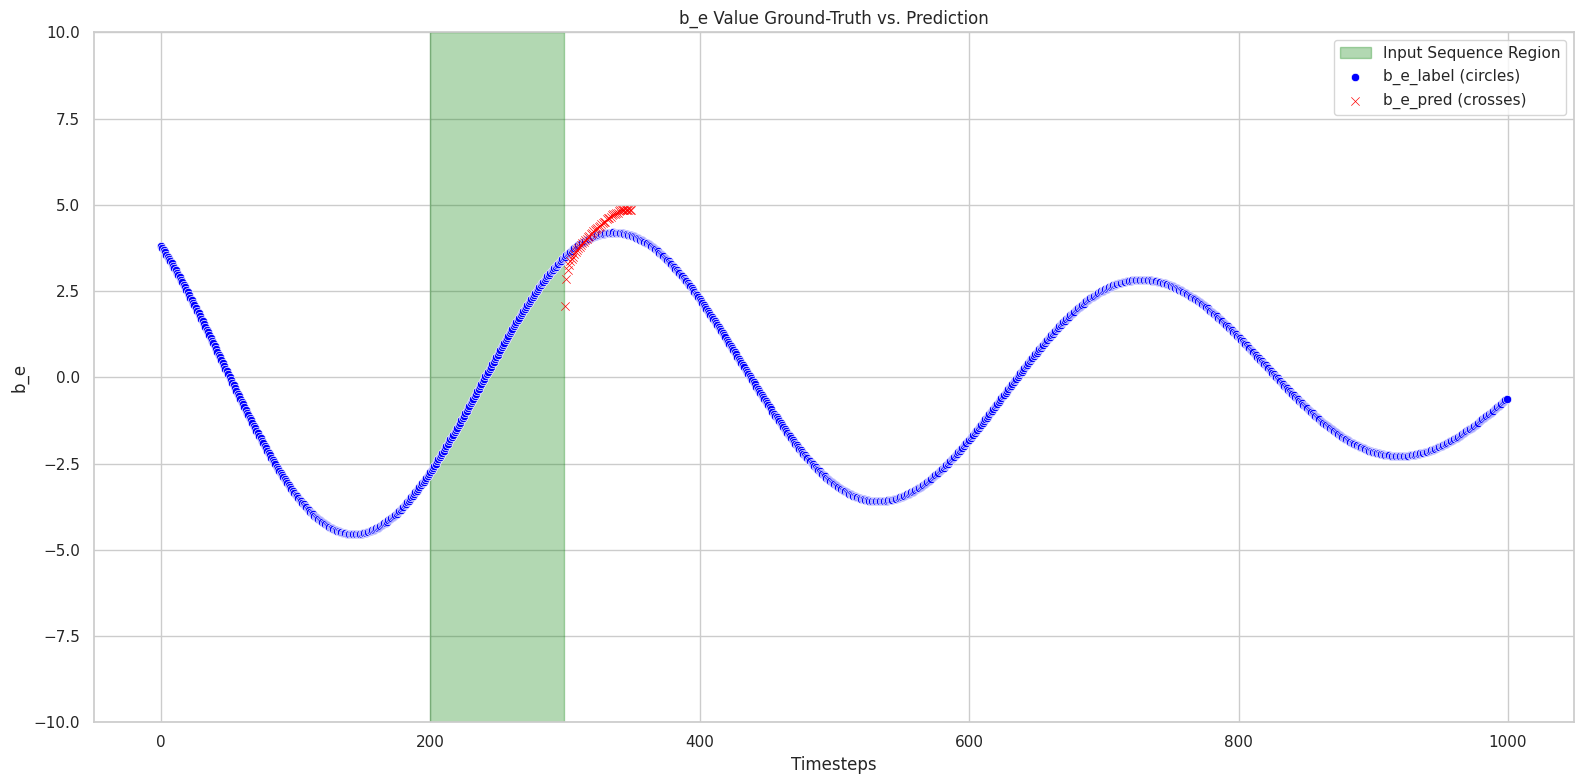

11it [00:02,  4.32it/s, single_test_loss=0.005907]

Output Timestep 301
    Input Timesteps [201 202 203 204 205 206 207 208 209 210]
    Scores ['0.01133', '0.01127', '0.01122', '0.01117', '0.01112', '0.01107', '0.01102', '0.01097', '0.01092', '0.01087']

Output Timestep 302
    Input Timesteps [201 202 203 204 205 206 207 208 209 210]
    Scores ['0.01070', '0.01068', '0.01066', '0.01064', '0.01062', '0.01060', '0.01058', '0.01056', '0.01054', '0.01052']

Output Timestep 303
    Input Timesteps [201 202 203 204 205 206 207 208 209 210]
    Scores ['0.01084', '0.01082', '0.01080', '0.01078', '0.01076', '0.01074', '0.01072', '0.01070', '0.01068', '0.01066']

Output Timestep 304
    Input Timesteps [201 202 203 204 205 206 207 208 209 210]
    Scores ['0.01080', '0.01078', '0.01077', '0.01075', '0.01073', '0.01071', '0.01069', '0.01067', '0.01066', '0.01064']

Output Timestep 305
    Input Timesteps [201 202 203 204 205 206 207 208 209 210]
    Scores ['0.01073', '0.01071', '0.01070', '0.01068', '0.01066', '0.01065', '0.01063', '0.01062'

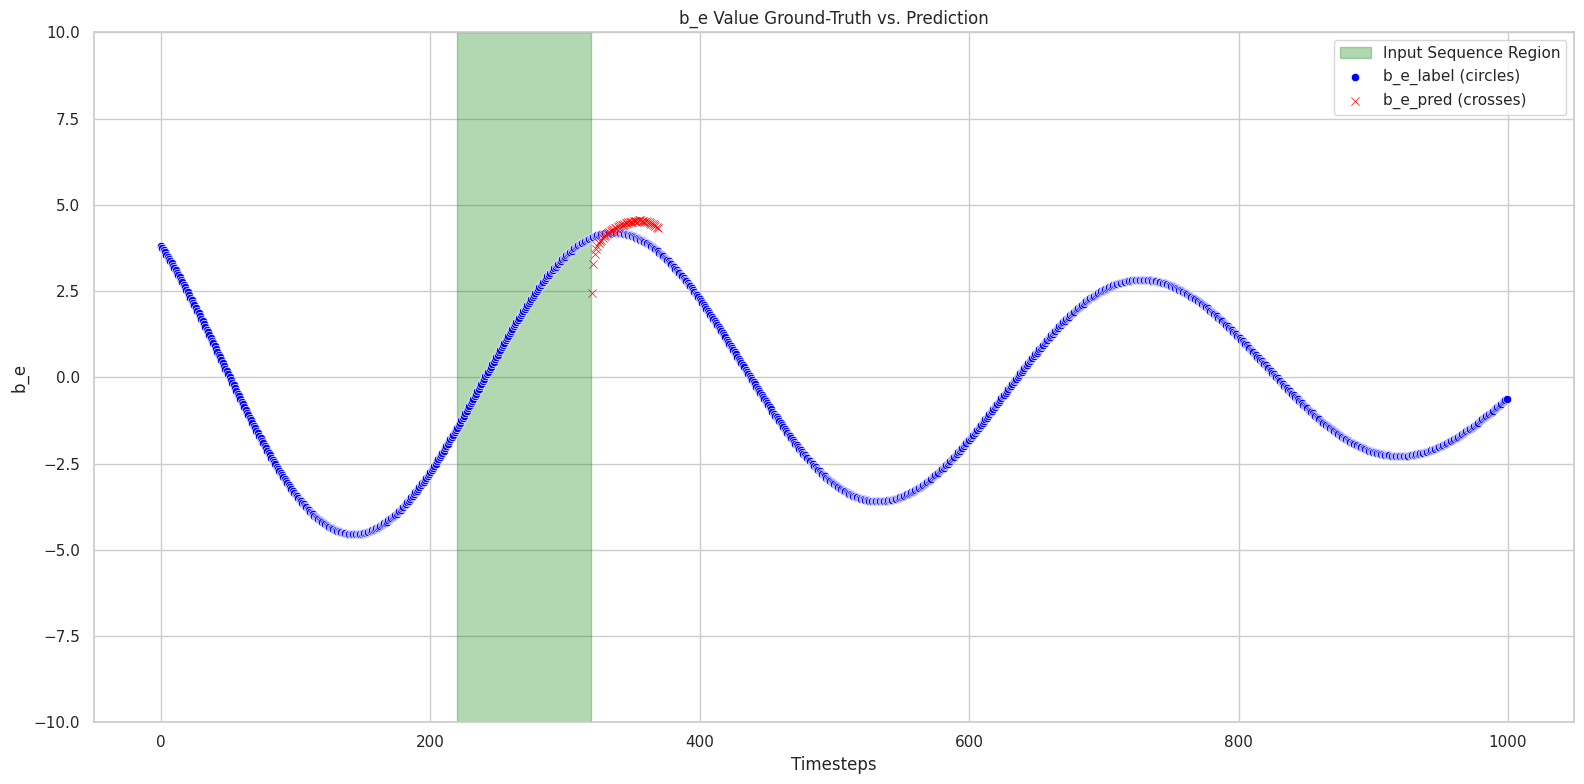

12it [00:03,  4.34it/s, single_test_loss=0.005862]

Output Timestep 321
    Input Timesteps [320 319 318 317 316 315 314 313 312 311]
    Scores ['0.01082', '0.01078', '0.01074', '0.01070', '0.01067', '0.01063', '0.01060', '0.01056', '0.01053', '0.01050']

Output Timestep 322
    Input Timesteps [221 222 223 224 225 226 227 228 229 230]
    Scores ['0.01034', '0.01033', '0.01031', '0.01030', '0.01028', '0.01027', '0.01026', '0.01025', '0.01024', '0.01023']

Output Timestep 323
    Input Timesteps [221 222 223 224 225 226 227 228 229 230]
    Scores ['0.01057', '0.01055', '0.01053', '0.01052', '0.01050', '0.01048', '0.01047', '0.01045', '0.01044', '0.01043']

Output Timestep 324
    Input Timesteps [221 222 223 224 225 226 227 228 229 230]
    Scores ['0.01058', '0.01057', '0.01055', '0.01053', '0.01052', '0.01050', '0.01048', '0.01047', '0.01046', '0.01045']

Output Timestep 325
    Input Timesteps [221 222 223 224 225 226 227 228 229 230]
    Scores ['0.01054', '0.01053', '0.01051', '0.01050', '0.01048', '0.01047', '0.01045', '0.01044'

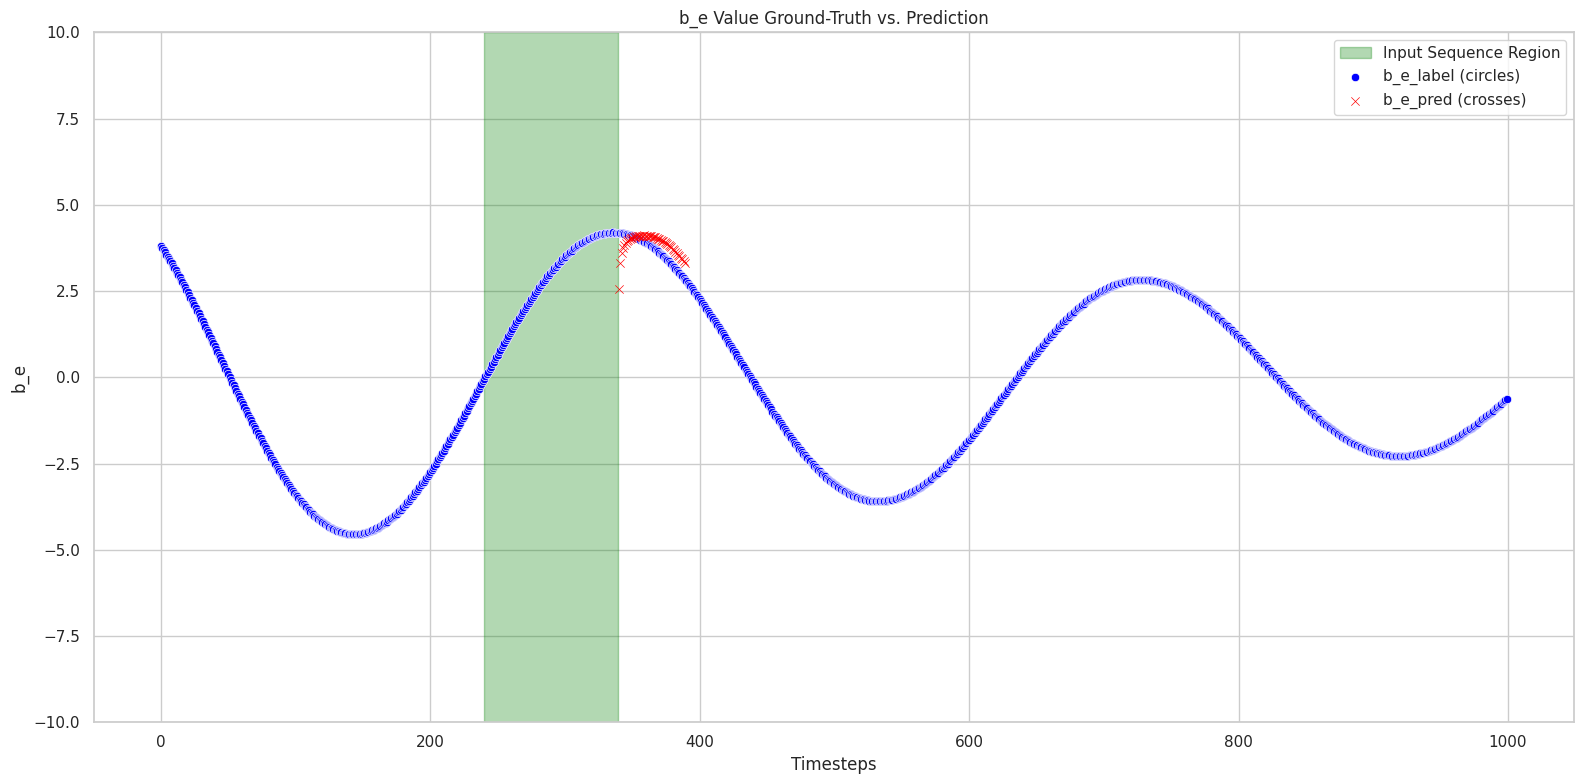

13it [00:03,  4.34it/s, single_test_loss=0.005743]

Output Timestep 341
    Input Timesteps [340 339 338 337 336 335 334 333 332 331]
    Scores ['0.01122', '0.01118', '0.01114', '0.01110', '0.01106', '0.01102', '0.01098', '0.01095', '0.01091', '0.01088']

Output Timestep 342
    Input Timesteps [340 339 338 337 336 335 334 333 332 331]
    Scores ['0.01030', '0.01029', '0.01028', '0.01027', '0.01026', '0.01025', '0.01024', '0.01023', '0.01022', '0.01021']

Output Timestep 343
    Input Timesteps [241 242 243 244 245 246 247 248 249 250]
    Scores ['0.01018', '0.01017', '0.01016', '0.01016', '0.01015', '0.01014', '0.01013', '0.01012', '0.01011', '0.01011']

Output Timestep 344
    Input Timesteps [241 242 243 244 245 246 247 248 249 250]
    Scores ['0.01024', '0.01023', '0.01022', '0.01021', '0.01020', '0.01019', '0.01018', '0.01017', '0.01017', '0.01016']

Output Timestep 345
    Input Timesteps [241 242 243 244 245 246 247 248 249 250]
    Scores ['0.01022', '0.01021', '0.01020', '0.01020', '0.01019', '0.01018', '0.01017', '0.01016'

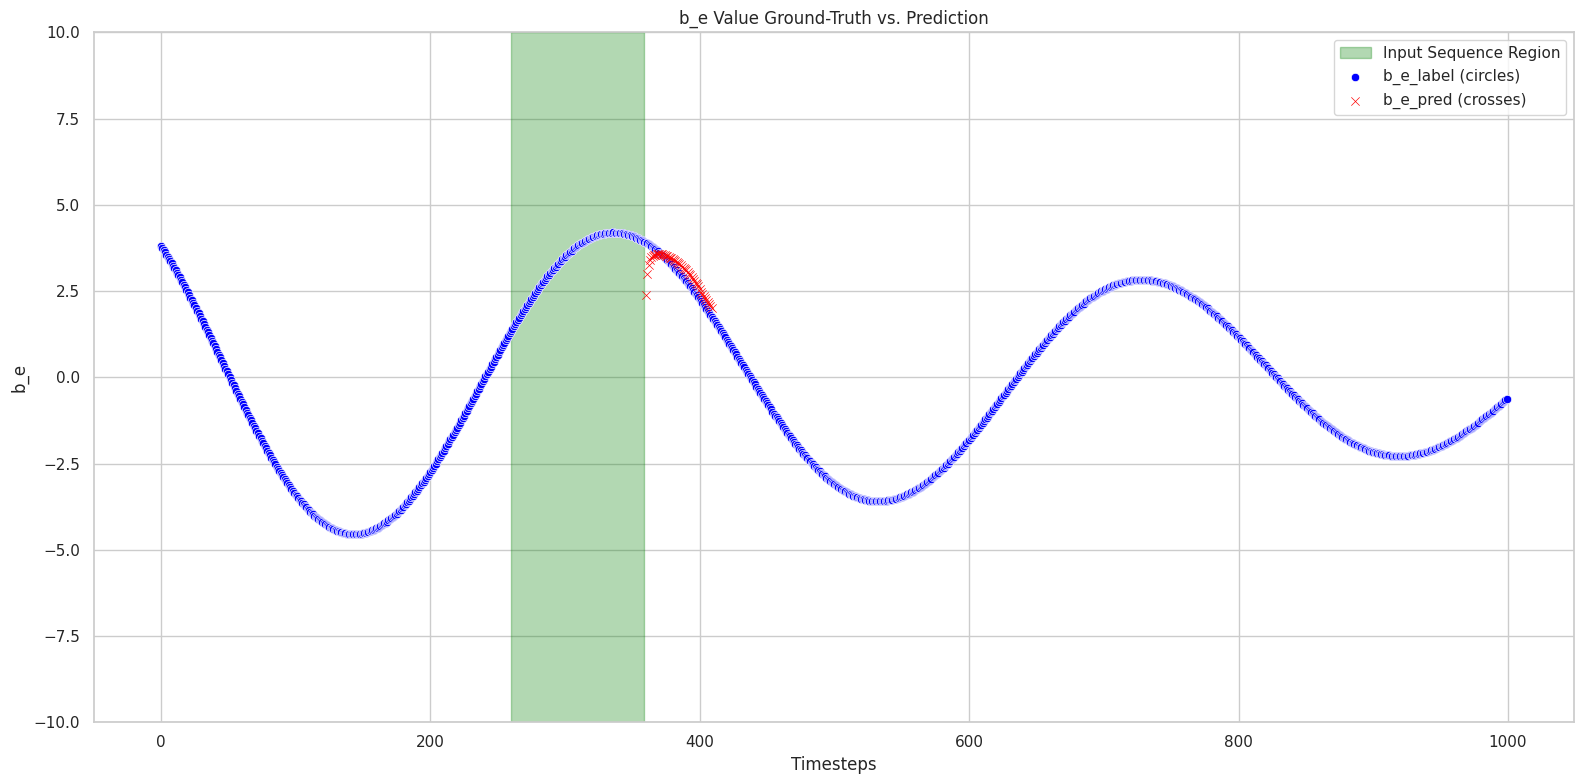

14it [00:03,  4.36it/s, single_test_loss=0.005278]

Output Timestep 361
    Input Timesteps [360 359 358 357 356 355 354 353 352 351]
    Scores ['0.01133', '0.01129', '0.01126', '0.01122', '0.01119', '0.01115', '0.01111', '0.01108', '0.01104', '0.01101']

Output Timestep 362
    Input Timesteps [360 359 358 357 356 355 354 353 352 351]
    Scores ['0.01050', '0.01048', '0.01047', '0.01046', '0.01045', '0.01043', '0.01042', '0.01041', '0.01040', '0.01038']

Output Timestep 363
    Input Timesteps [360 359 358 357 356 355 354 353 352 351]
    Scores ['0.01026', '0.01025', '0.01024', '0.01023', '0.01022', '0.01021', '0.01020', '0.01019', '0.01019', '0.01018']

Output Timestep 364
    Input Timesteps [360 359 358 357 356 355 354 353 352 351]
    Scores ['0.01019', '0.01018', '0.01018', '0.01017', '0.01016', '0.01015', '0.01014', '0.01013', '0.01012', '0.01012']

Output Timestep 365
    Input Timesteps [360 359 358 357 356 355 354 353 352 351]
    Scores ['0.01019', '0.01018', '0.01017', '0.01016', '0.01015', '0.01014', '0.01013', '0.01013'

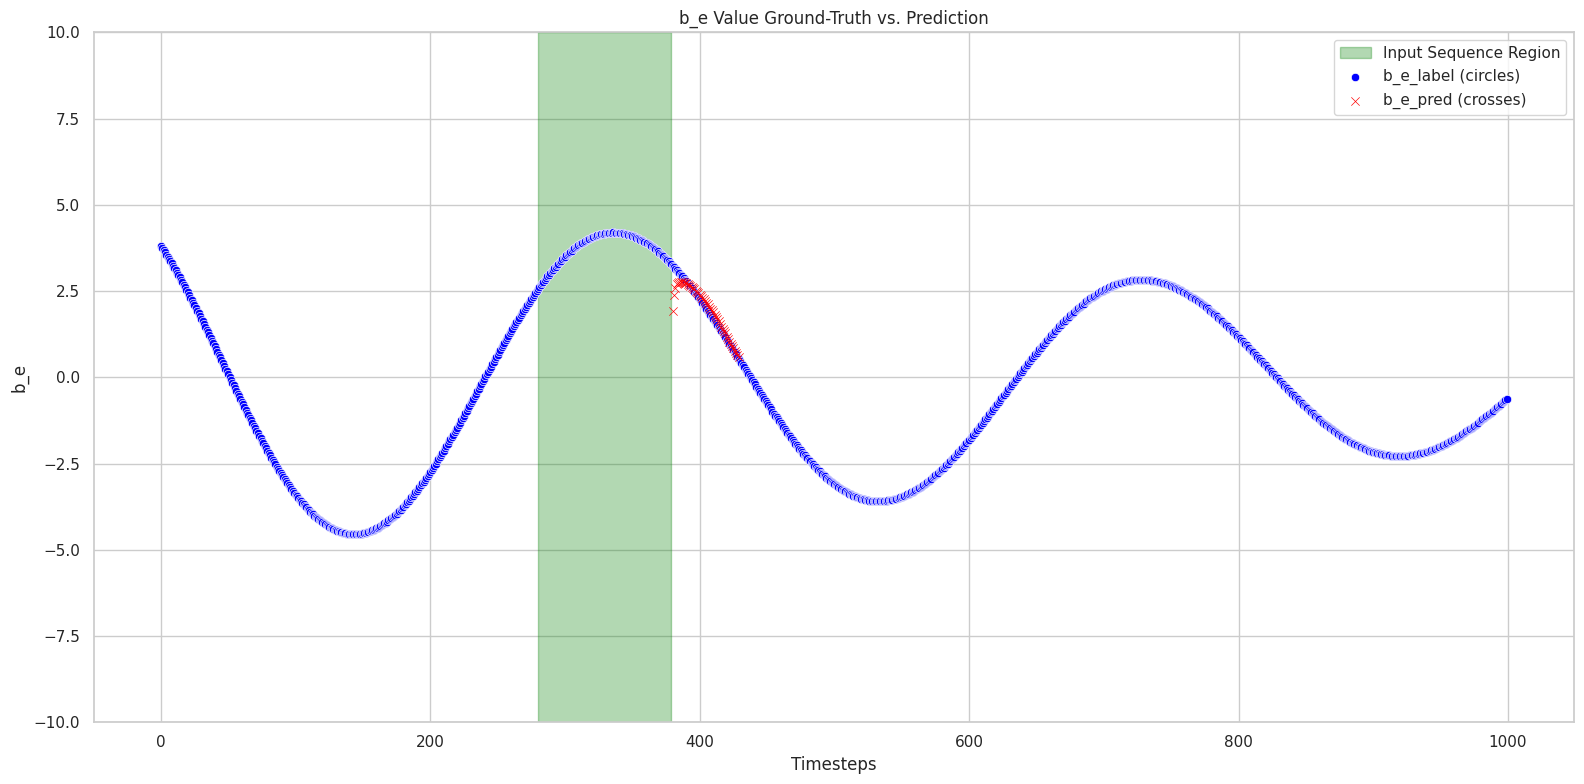

15it [00:03,  4.30it/s, single_test_loss=0.004573]

Output Timestep 381
    Input Timesteps [380 379 378 377 376 375 374 373 372 371]
    Scores ['0.01122', '0.01119', '0.01117', '0.01114', '0.01111', '0.01108', '0.01106', '0.01103', '0.01100', '0.01098']

Output Timestep 382
    Input Timesteps [380 379 378 377 376 375 374 373 372 371]
    Scores ['0.01067', '0.01065', '0.01064', '0.01063', '0.01062', '0.01060', '0.01059', '0.01058', '0.01056', '0.01055']

Output Timestep 383
    Input Timesteps [380 379 378 377 376 375 374 373 372 371]
    Scores ['0.01047', '0.01046', '0.01045', '0.01044', '0.01042', '0.01041', '0.01040', '0.01039', '0.01038', '0.01037']

Output Timestep 384
    Input Timesteps [380 379 378 377 376 375 374 373 372 371]
    Scores ['0.01041', '0.01040', '0.01039', '0.01038', '0.01037', '0.01036', '0.01035', '0.01034', '0.01033', '0.01032']

Output Timestep 385
    Input Timesteps [380 379 378 377 376 375 374 373 372 371]
    Scores ['0.01040', '0.01039', '0.01038', '0.01037', '0.01036', '0.01035', '0.01034', '0.01033'

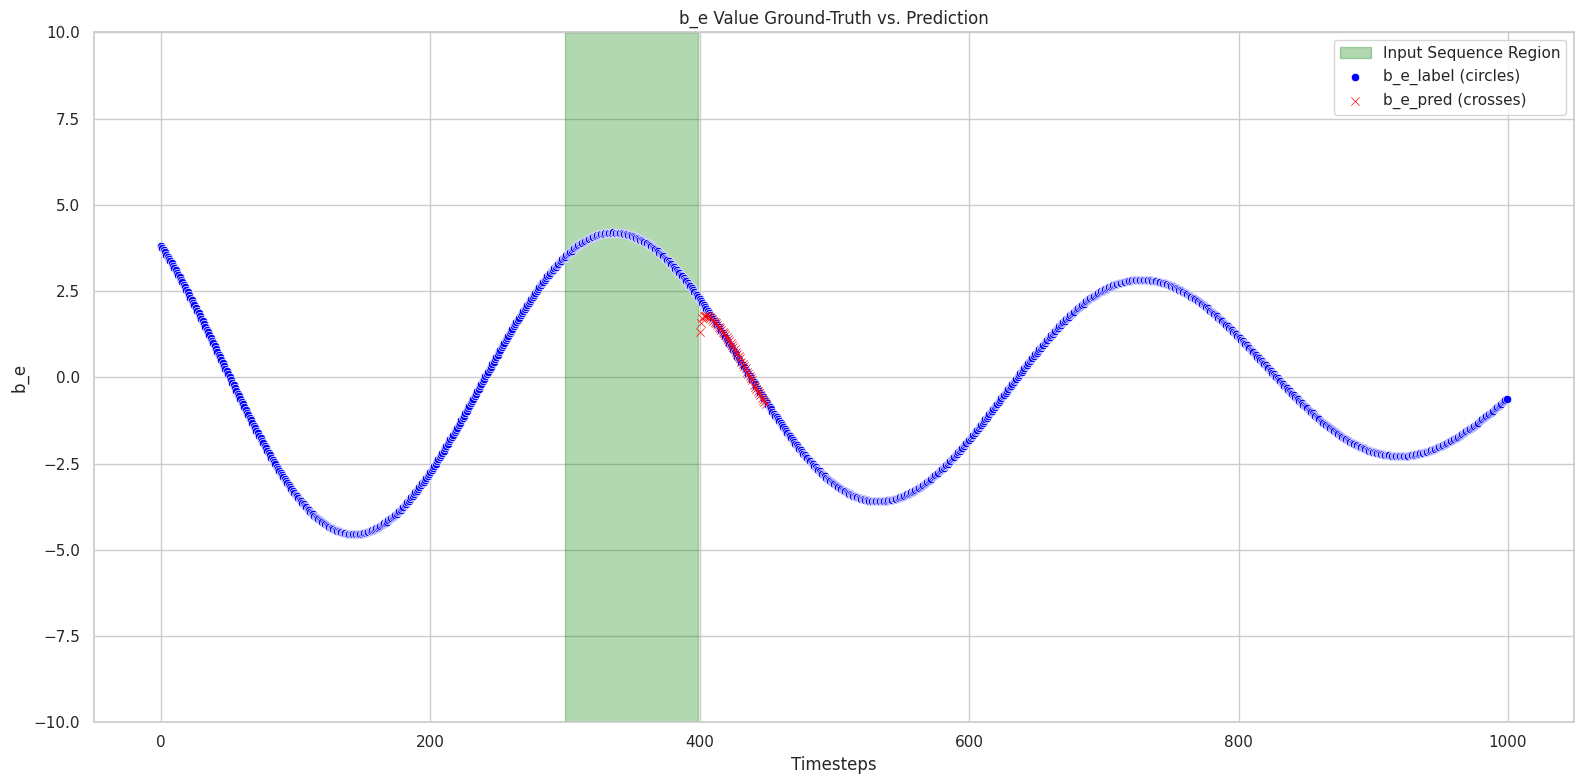

16it [00:04,  4.32it/s, single_test_loss=0.003954]

Output Timestep 401
    Input Timesteps [400 399 398 397 396 395 394 393 392 391]
    Scores ['0.01083', '0.01081', '0.01080', '0.01078', '0.01077', '0.01075', '0.01073', '0.01072', '0.01070', '0.01069']

Output Timestep 402
    Input Timesteps [400 399 398 397 396 395 394 393 392 391]
    Scores ['0.01063', '0.01062', '0.01062', '0.01061', '0.01060', '0.01059', '0.01058', '0.01057', '0.01056', '0.01056']

Output Timestep 403
    Input Timesteps [400 399 398 397 396 395 394 393 392 391]
    Scores ['0.01047', '0.01046', '0.01046', '0.01045', '0.01044', '0.01044', '0.01043', '0.01042', '0.01042', '0.01041']

Output Timestep 404
    Input Timesteps [400 399 398 397 396 395 394 393 392 391]
    Scores ['0.01042', '0.01042', '0.01041', '0.01041', '0.01040', '0.01040', '0.01039', '0.01039', '0.01038', '0.01037']

Output Timestep 405
    Input Timesteps [400 399 398 397 396 395 394 393 392 391]
    Scores ['0.01042', '0.01042', '0.01041', '0.01041', '0.01040', '0.01040', '0.01039', '0.01039'

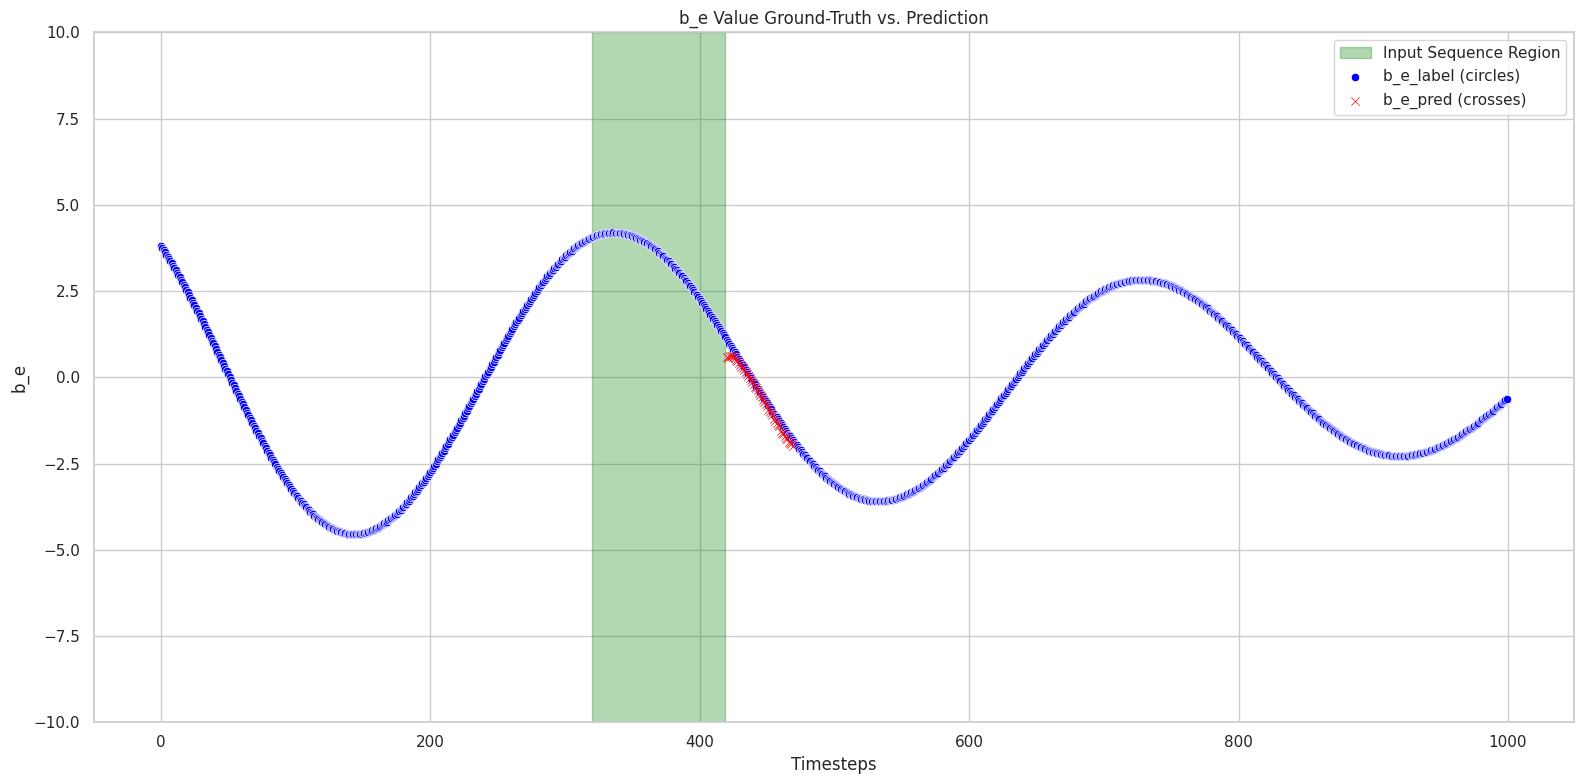

17it [00:04,  4.35it/s, single_test_loss=0.003563]

Output Timestep 421
    Input Timesteps [420 419 418 417 416 415 414 413 412 411]
    Scores ['0.01042', '0.01041', '0.01040', '0.01039', '0.01038', '0.01036', '0.01035', '0.01034', '0.01033', '0.01032']

Output Timestep 422
    Input Timesteps [420 419 418 417 416 415 414 413 412 411]
    Scores ['0.01050', '0.01049', '0.01049', '0.01049', '0.01048', '0.01048', '0.01047', '0.01047', '0.01046', '0.01046']

Output Timestep 423
    Input Timesteps [420 418 419 417 416 415 414 413 412 411]
    Scores ['0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01035', '0.01035', '0.01035', '0.01035']

Output Timestep 424
    Input Timesteps [420 418 419 417 416 415 414 413 412 411]
    Scores ['0.01034', '0.01034', '0.01034', '0.01034', '0.01034', '0.01034', '0.01033', '0.01033', '0.01033', '0.01033']

Output Timestep 425
    Input Timesteps [420 418 419 417 416 415 414 413 412 411]
    Scores ['0.01035', '0.01035', '0.01035', '0.01035', '0.01035', '0.01035', '0.01035', '0.01034'

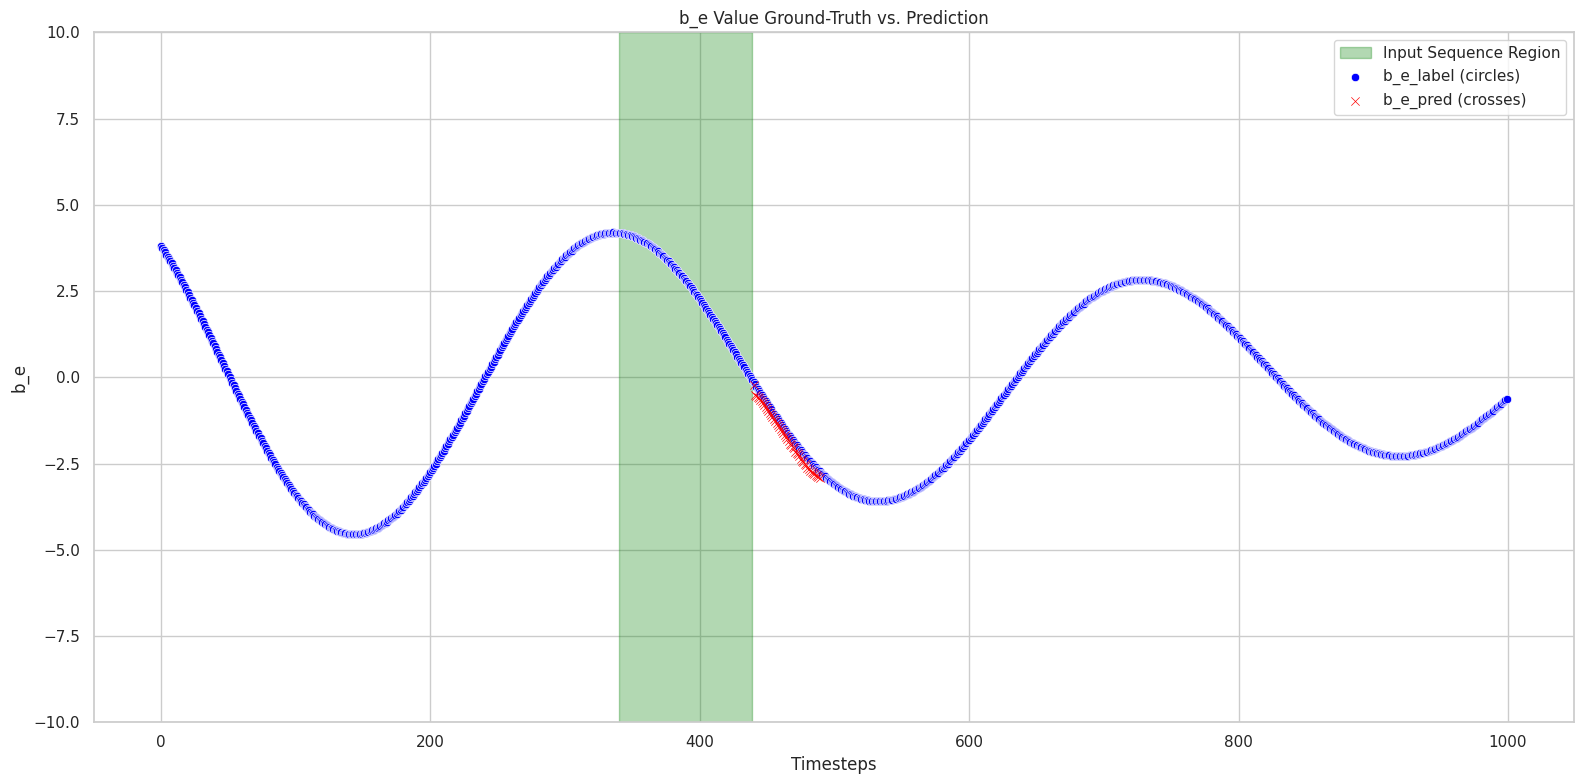

18it [00:04,  4.34it/s, single_test_loss=0.003491]

Output Timestep 441
    Input Timesteps [363 364 365 362 366 367 361 368 369 360]
    Scores ['0.01011', '0.01011', '0.01011', '0.01011', '0.01011', '0.01011', '0.01011', '0.01011', '0.01010', '0.01010']

Output Timestep 442
    Input Timesteps [422 423 421 420 424 419 416 417 415 425]
    Scores ['0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025']

Output Timestep 443
    Input Timesteps [409 410 411 412 408 413 407 414 406 415]
    Scores ['0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01020', '0.01020']

Output Timestep 444
    Input Timesteps [410 409 411 412 408 413 407 414 406 415]
    Scores ['0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021', '0.01021']

Output Timestep 445
    Input Timesteps [412 411 413 410 414 409 415 416 408 417]
    Scores ['0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023'

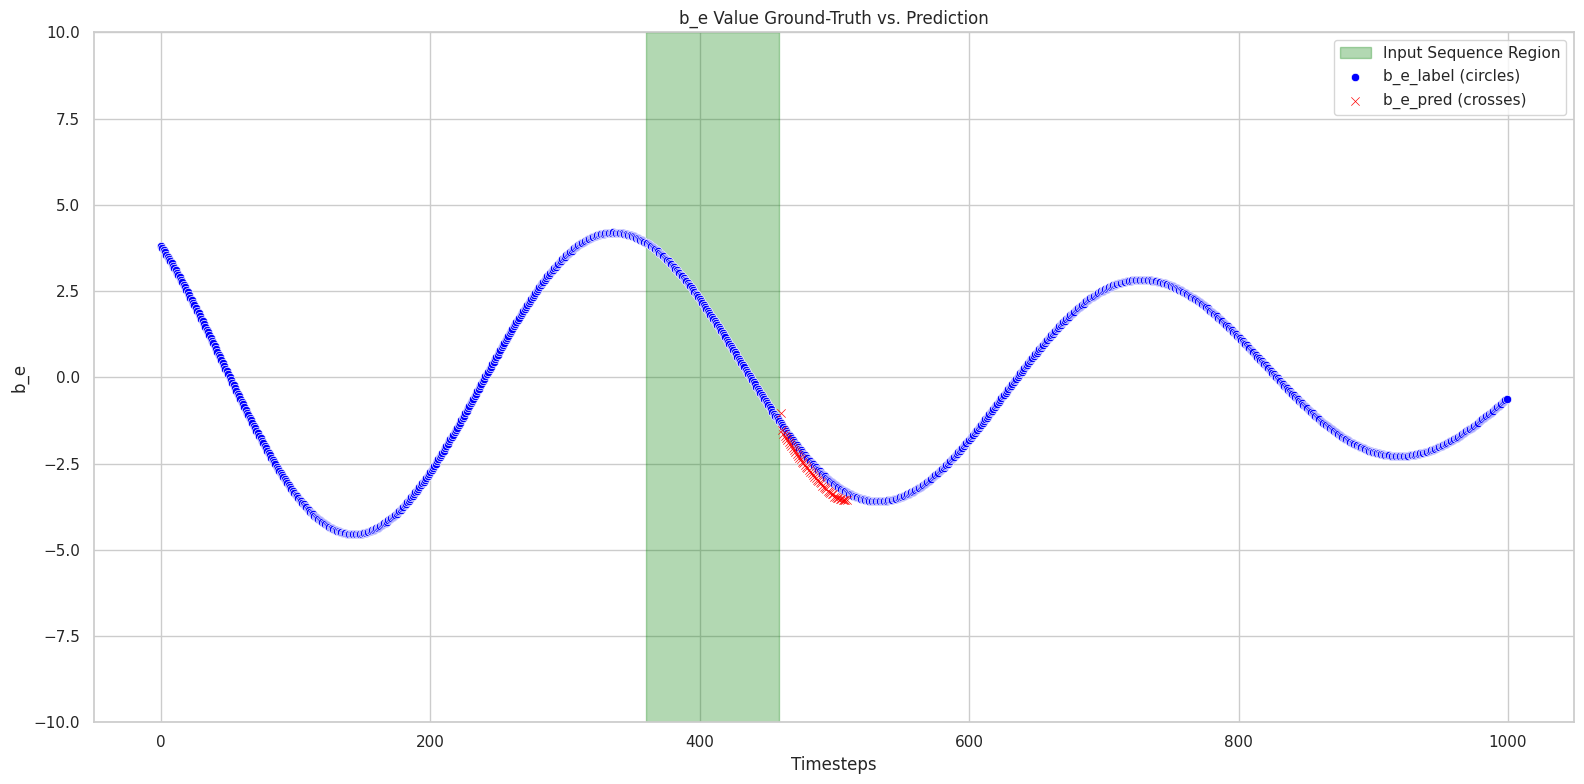

19it [00:04,  4.34it/s, single_test_loss=0.003328]

Output Timestep 461
    Input Timesteps [361 362 363 365 364 366 367 375 376 374]
    Scores ['0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01035', '0.01035', '0.01035', '0.01035']

Output Timestep 462
    Input Timesteps [423 422 424 421 420 425 419 426 418 417]
    Scores ['0.01015', '0.01015', '0.01015', '0.01015', '0.01015', '0.01015', '0.01015', '0.01014', '0.01014', '0.01014']

Output Timestep 463
    Input Timesteps [408 407 409 406 405 410 404 411 403 412]
    Scores ['0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01015', '0.01015', '0.01015']

Output Timestep 464
    Input Timesteps [409 410 408 411 407 412 413 406 405 414]
    Scores ['0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01015']

Output Timestep 465
    Input Timesteps [421 420 422 419 423 418 424 417 412 413]
    Scores ['0.01017', '0.01017', '0.01017', '0.01017', '0.01017', '0.01016', '0.01016', '0.01016'

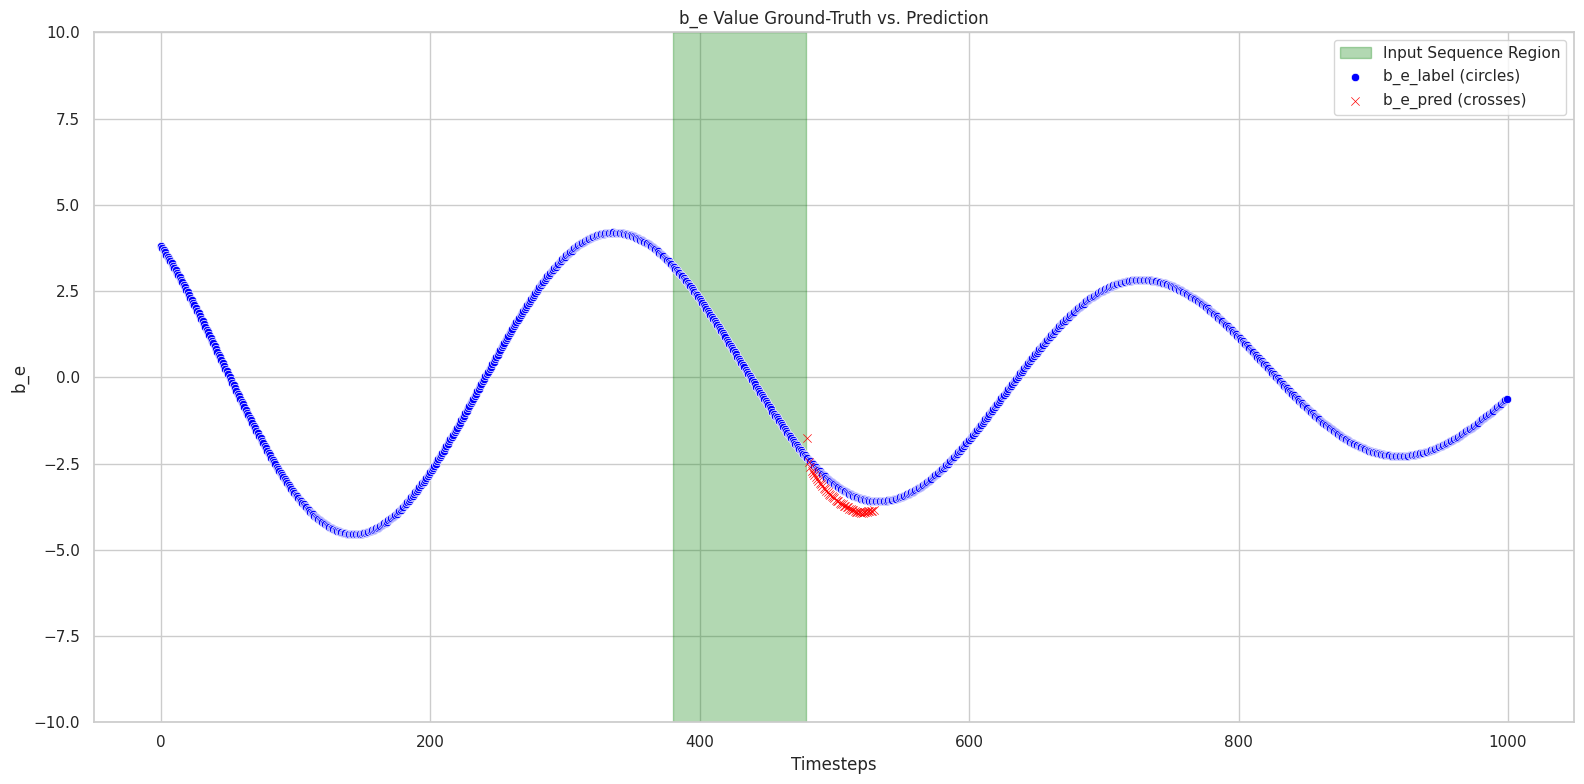

20it [00:04,  4.36it/s, single_test_loss=0.003315]

Output Timestep 481
    Input Timesteps [381 382 383 384 385 386 387 388 389 390]
    Scores ['0.01066', '0.01065', '0.01064', '0.01064', '0.01063', '0.01063', '0.01062', '0.01060', '0.01060', '0.01059']

Output Timestep 482
    Input Timesteps [413 414 412 415 411 416 410 417 418 409]
    Scores ['0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01025', '0.01024', '0.01024']

Output Timestep 483
    Input Timesteps [411 412 413 410 414 409 415 408 416 407]
    Scores ['0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029']

Output Timestep 484
    Input Timesteps [413 414 412 415 411 416 410 409 417 418]
    Scores ['0.01028', '0.01028', '0.01028', '0.01028', '0.01028', '0.01028', '0.01028', '0.01027', '0.01027', '0.01027']

Output Timestep 485
    Input Timesteps [415 416 414 418 417 413 419 420 412 411]
    Scores ['0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01025', '0.01025', '0.01025'

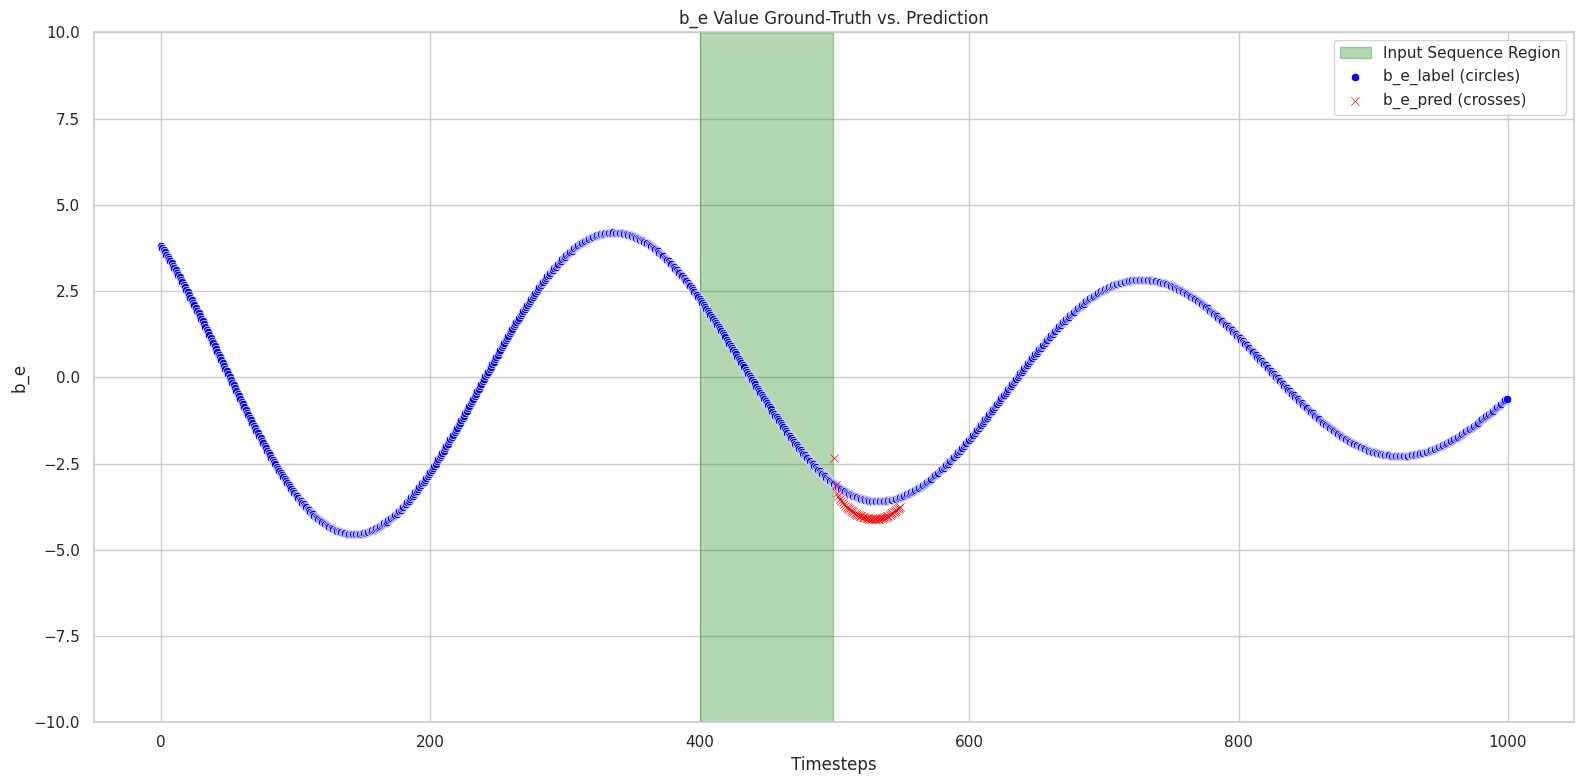

21it [00:05,  3.71it/s, single_test_loss=0.003702]

Output Timestep 501
    Input Timesteps [401 402 403 404 405 406 407 408 409 410]
    Scores ['0.01096', '0.01094', '0.01093', '0.01091', '0.01090', '0.01088', '0.01087', '0.01085', '0.01084', '0.01082']

Output Timestep 502
    Input Timesteps [417 416 418 419 415 420 414 421 413 422]
    Scores ['0.01051', '0.01051', '0.01051', '0.01050', '0.01050', '0.01050', '0.01050', '0.01050', '0.01050', '0.01050']

Output Timestep 503
    Input Timesteps [416 417 415 418 419 414 420 413 421 412]
    Scores ['0.01057', '0.01057', '0.01057', '0.01057', '0.01057', '0.01057', '0.01056', '0.01056', '0.01056', '0.01056']

Output Timestep 504
    Input Timesteps [417 418 416 419 420 415 421 414 422 423]
    Scores ['0.01054', '0.01054', '0.01054', '0.01054', '0.01054', '0.01054', '0.01053', '0.01053', '0.01053', '0.01053']

Output Timestep 505
    Input Timesteps [419 420 418 421 417 422 416 423 424 415]
    Scores ['0.01049', '0.01049', '0.01049', '0.01049', '0.01049', '0.01049', '0.01049', '0.01049'

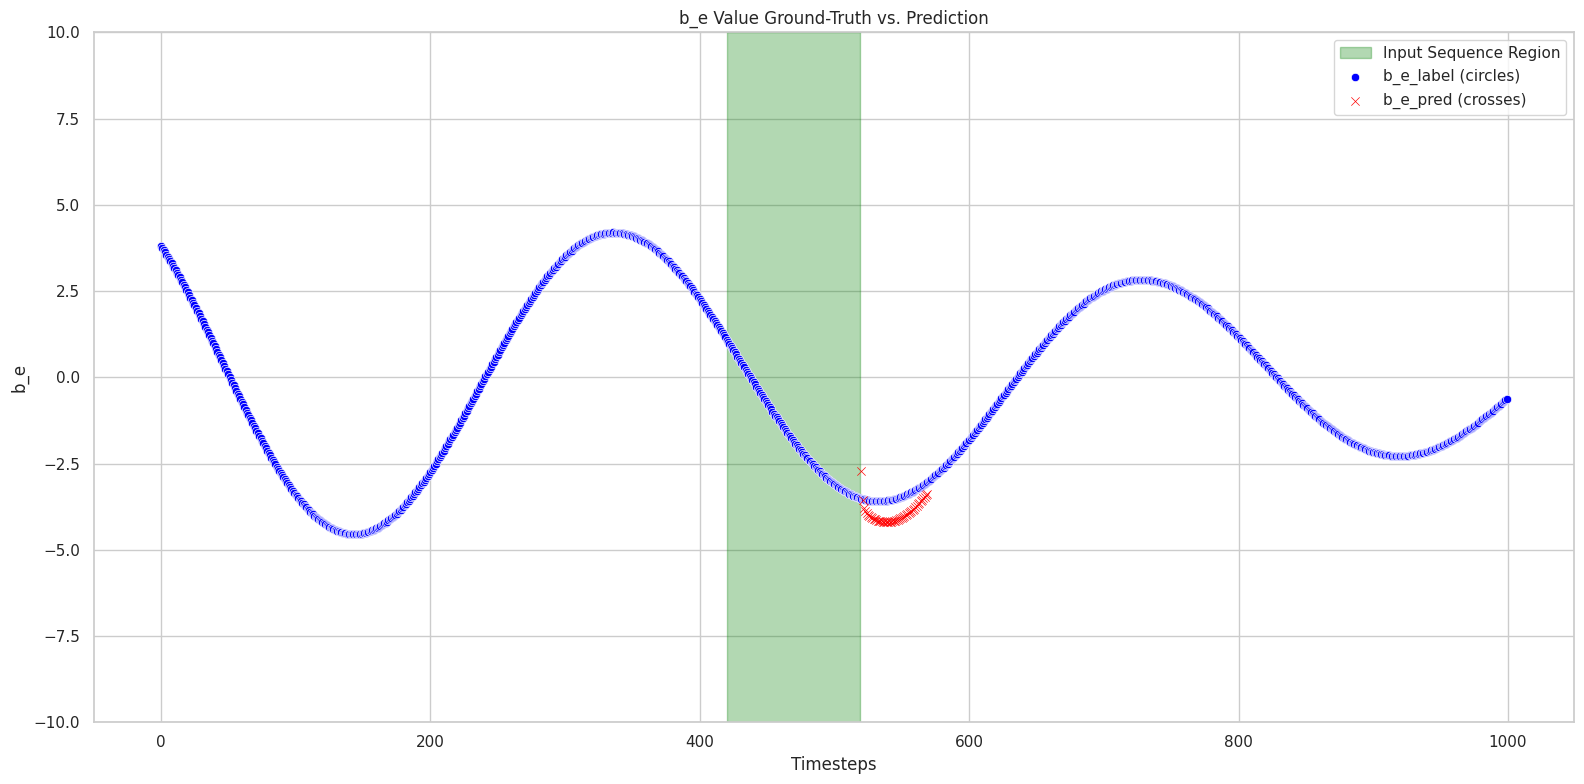

22it [00:05,  3.90it/s, single_test_loss=0.004075]

Output Timestep 521
    Input Timesteps [421 422 423 424 425 426 427 428 429 430]
    Scores ['0.01116', '0.01114', '0.01112', '0.01110', '0.01108', '0.01107', '0.01105', '0.01103', '0.01101', '0.01099']

Output Timestep 522
    Input Timesteps [421 422 423 424 425 426 427 428 429 430]
    Scores ['0.01088', '0.01088', '0.01087', '0.01087', '0.01087', '0.01086', '0.01086', '0.01085', '0.01085', '0.01084']

Output Timestep 523
    Input Timesteps [421 422 423 424 425 426 427 428 429 430]
    Scores ['0.01095', '0.01094', '0.01094', '0.01094', '0.01093', '0.01093', '0.01093', '0.01092', '0.01091', '0.01091']

Output Timestep 524
    Input Timesteps [421 422 423 424 425 426 427 428 429 430]
    Scores ['0.01090', '0.01090', '0.01089', '0.01089', '0.01089', '0.01089', '0.01089', '0.01088', '0.01088', '0.01087']

Output Timestep 525
    Input Timesteps [422 423 421 424 426 425 427 428 429 430]
    Scores ['0.01083', '0.01083', '0.01083', '0.01083', '0.01083', '0.01083', '0.01083', '0.01082'

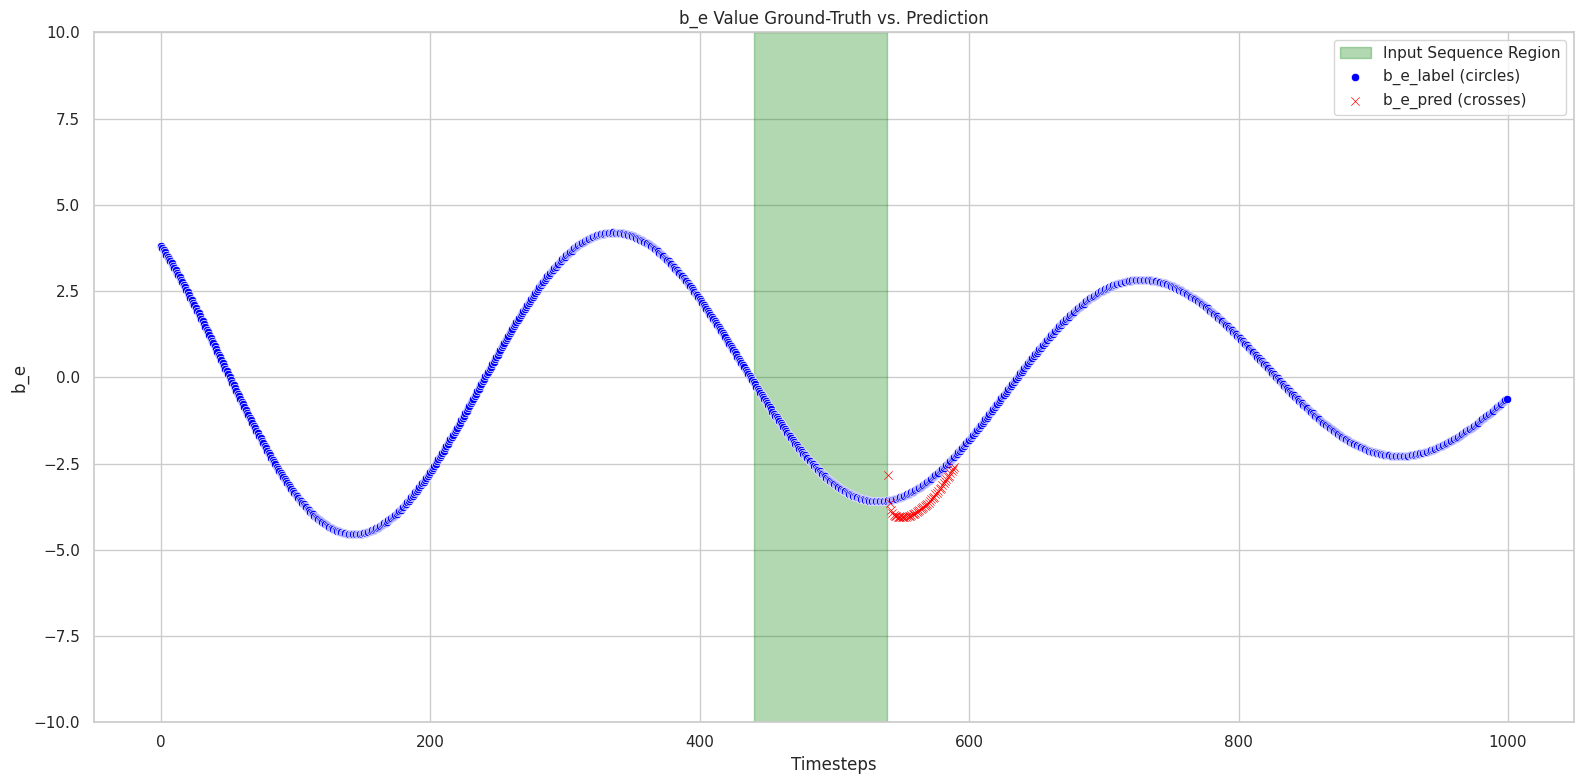

23it [00:05,  4.03it/s, single_test_loss=0.004275]

Output Timestep 541
    Input Timesteps [441 442 443 444 445 446 447 448 449 450]
    Scores ['0.01131', '0.01129', '0.01127', '0.01125', '0.01123', '0.01120', '0.01118', '0.01116', '0.01113', '0.01111']

Output Timestep 542
    Input Timesteps [441 442 443 444 445 446 447 448 449 450]
    Scores ['0.01118', '0.01117', '0.01116', '0.01115', '0.01113', '0.01112', '0.01111', '0.01109', '0.01108', '0.01107']

Output Timestep 543
    Input Timesteps [441 442 443 444 445 446 447 448 449 450]
    Scores ['0.01124', '0.01123', '0.01122', '0.01120', '0.01119', '0.01118', '0.01117', '0.01115', '0.01114', '0.01112']

Output Timestep 544
    Input Timesteps [441 442 443 444 445 446 447 448 449 450]
    Scores ['0.01120', '0.01119', '0.01118', '0.01116', '0.01115', '0.01114', '0.01113', '0.01111', '0.01110', '0.01109']

Output Timestep 545
    Input Timesteps [441 442 443 444 445 446 447 448 449 450]
    Scores ['0.01113', '0.01112', '0.01111', '0.01110', '0.01109', '0.01108', '0.01107', '0.01106'

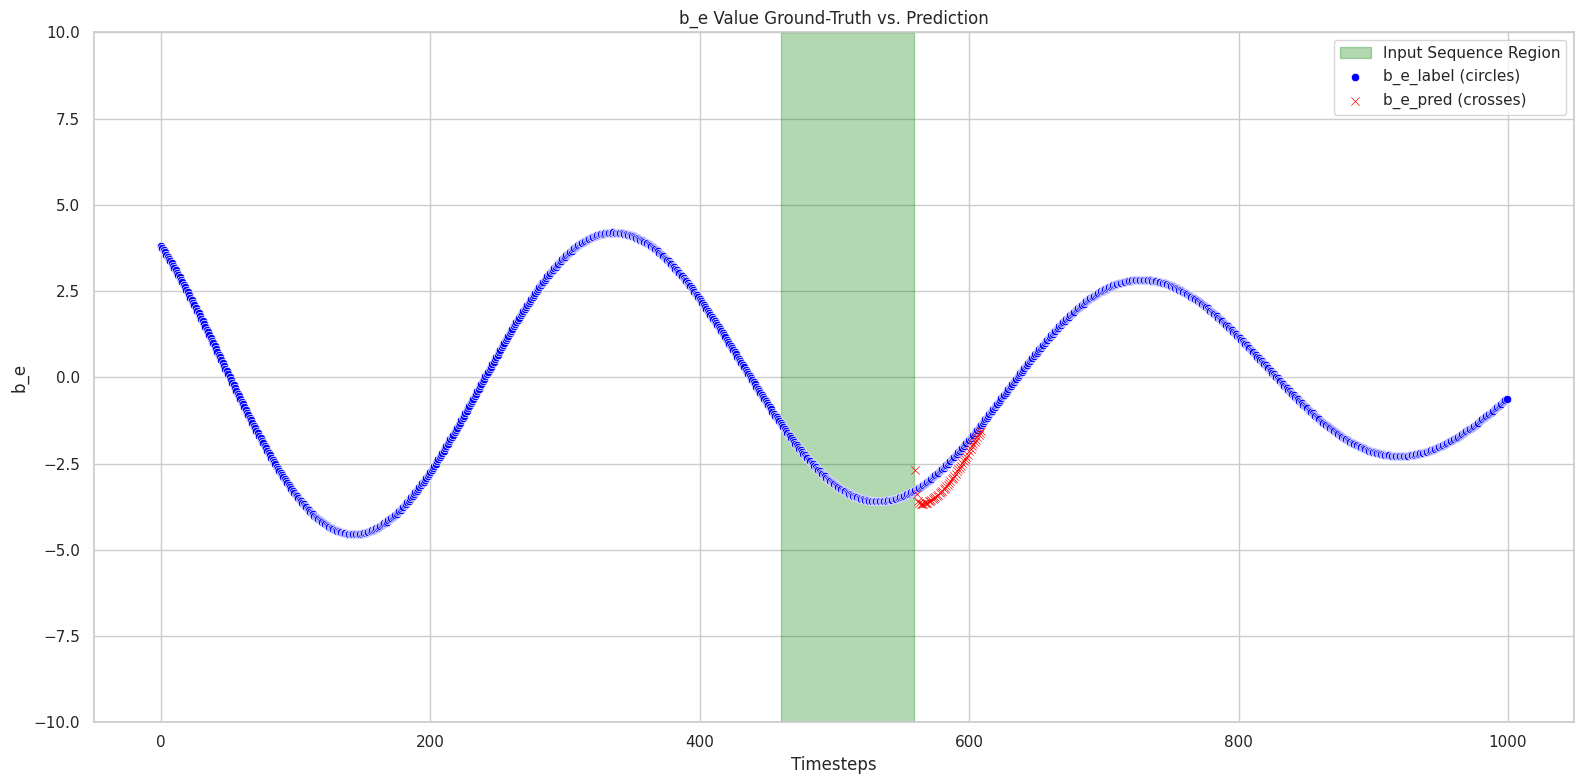

24it [00:05,  4.07it/s, single_test_loss=0.004345]

Output Timestep 561
    Input Timesteps [461 462 463 464 465 466 467 468 469 470]
    Scores ['0.01161', '0.01158', '0.01156', '0.01153', '0.01150', '0.01148', '0.01145', '0.01142', '0.01139', '0.01137']

Output Timestep 562
    Input Timesteps [461 462 463 464 465 466 467 468 469 470]
    Scores ['0.01144', '0.01142', '0.01140', '0.01139', '0.01137', '0.01135', '0.01133', '0.01130', '0.01128', '0.01126']

Output Timestep 563
    Input Timesteps [461 462 463 464 465 466 467 468 469 470]
    Scores ['0.01147', '0.01145', '0.01143', '0.01141', '0.01139', '0.01137', '0.01135', '0.01133', '0.01131', '0.01128']

Output Timestep 564
    Input Timesteps [461 462 463 464 465 466 467 468 469 470]
    Scores ['0.01142', '0.01140', '0.01138', '0.01136', '0.01134', '0.01133', '0.01131', '0.01128', '0.01126', '0.01124']

Output Timestep 565
    Input Timesteps [461 462 463 464 465 466 467 468 469 470]
    Scores ['0.01134', '0.01133', '0.01131', '0.01129', '0.01128', '0.01126', '0.01124', '0.01122'

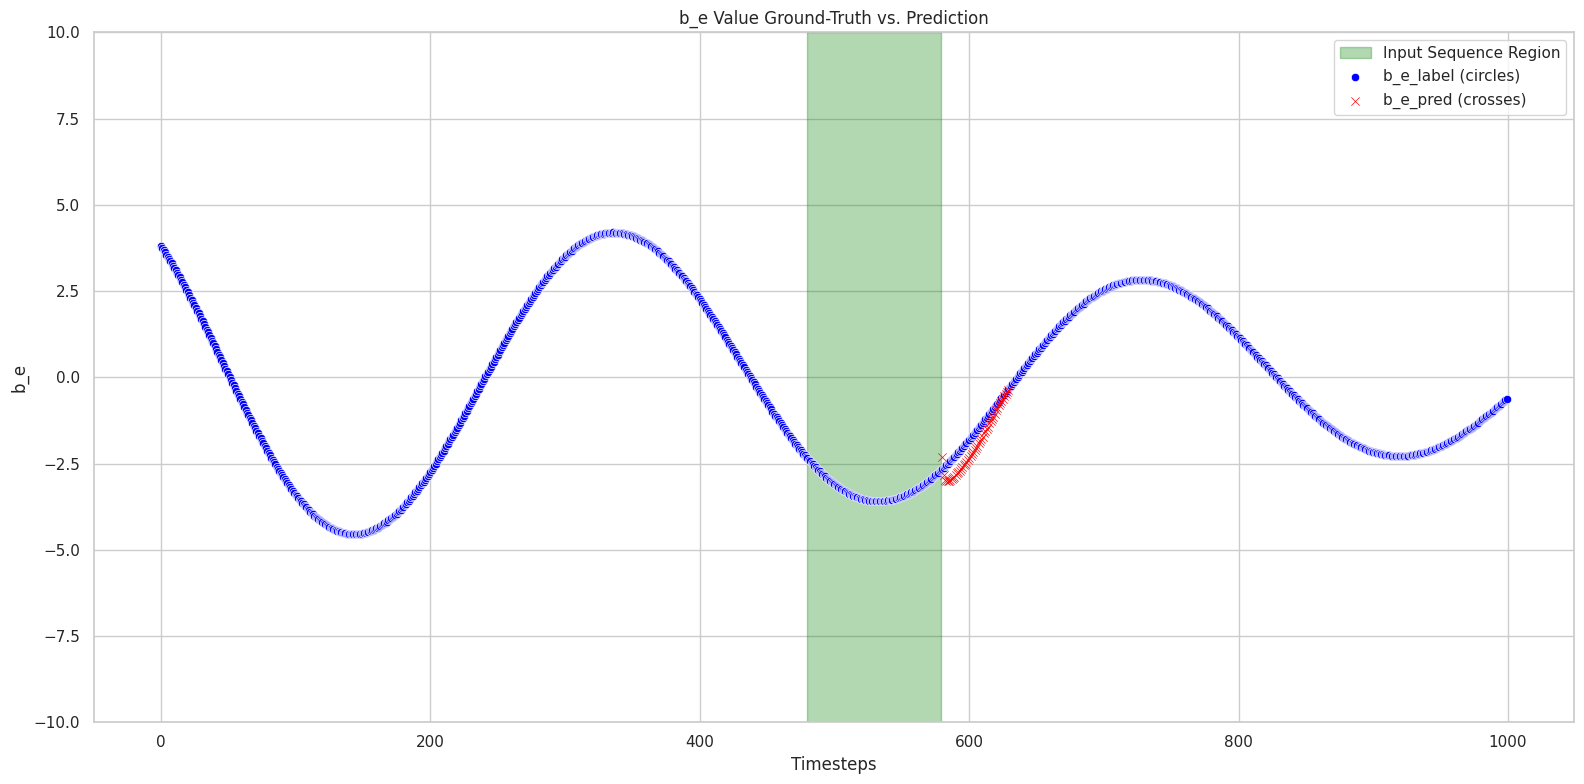

25it [00:06,  4.15it/s, single_test_loss=0.004281]

Output Timestep 581
    Input Timesteps [481 482 483 484 485 486 487 488 489 490]
    Scores ['0.01190', '0.01186', '0.01183', '0.01180', '0.01176', '0.01172', '0.01169', '0.01165', '0.01161', '0.01158']

Output Timestep 582
    Input Timesteps [481 482 483 484 485 486 487 488 489 490]
    Scores ['0.01159', '0.01156', '0.01153', '0.01151', '0.01148', '0.01145', '0.01143', '0.01140', '0.01137', '0.01134']

Output Timestep 583
    Input Timesteps [481 482 483 484 485 486 487 488 489 490]
    Scores ['0.01157', '0.01155', '0.01152', '0.01149', '0.01147', '0.01144', '0.01141', '0.01138', '0.01135', '0.01133']

Output Timestep 584
    Input Timesteps [481 482 483 484 485 486 487 488 489 490]
    Scores ['0.01150', '0.01148', '0.01145', '0.01143', '0.01140', '0.01138', '0.01135', '0.01133', '0.01130', '0.01127']

Output Timestep 585
    Input Timesteps [481 482 483 484 485 486 487 488 489 490]
    Scores ['0.01143', '0.01140', '0.01138', '0.01136', '0.01133', '0.01131', '0.01129', '0.01126'

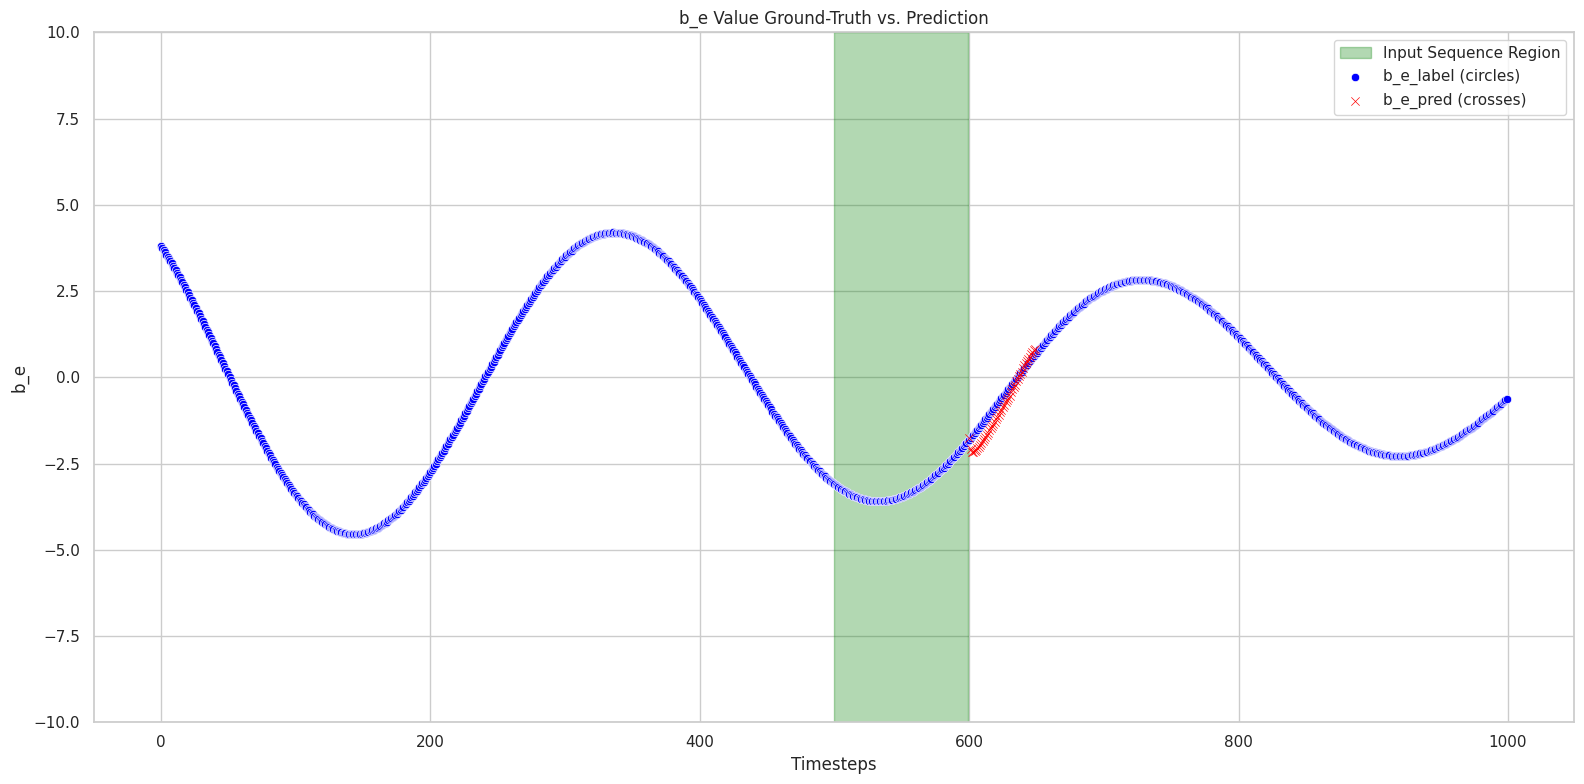

26it [00:06,  4.20it/s, single_test_loss=0.004052]

Output Timestep 601
    Input Timesteps [501 502 503 504 505 506 507 508 509 510]
    Scores ['0.01200', '0.01196', '0.01192', '0.01188', '0.01184', '0.01179', '0.01175', '0.01171', '0.01166', '0.01162']

Output Timestep 602
    Input Timesteps [501 502 503 504 505 506 507 508 509 510]
    Scores ['0.01151', '0.01148', '0.01145', '0.01142', '0.01139', '0.01136', '0.01133', '0.01130', '0.01127', '0.01123']

Output Timestep 603
    Input Timesteps [501 502 503 504 505 506 507 508 509 510]
    Scores ['0.01146', '0.01144', '0.01141', '0.01138', '0.01135', '0.01132', '0.01129', '0.01126', '0.01123', '0.01120']

Output Timestep 604
    Input Timesteps [501 502 503 504 505 506 507 508 509 510]
    Scores ['0.01139', '0.01136', '0.01133', '0.01131', '0.01128', '0.01126', '0.01123', '0.01120', '0.01117', '0.01114']

Output Timestep 605
    Input Timesteps [501 502 503 504 505 506 507 508 509 510]
    Scores ['0.01131', '0.01128', '0.01126', '0.01124', '0.01121', '0.01119', '0.01116', '0.01113'

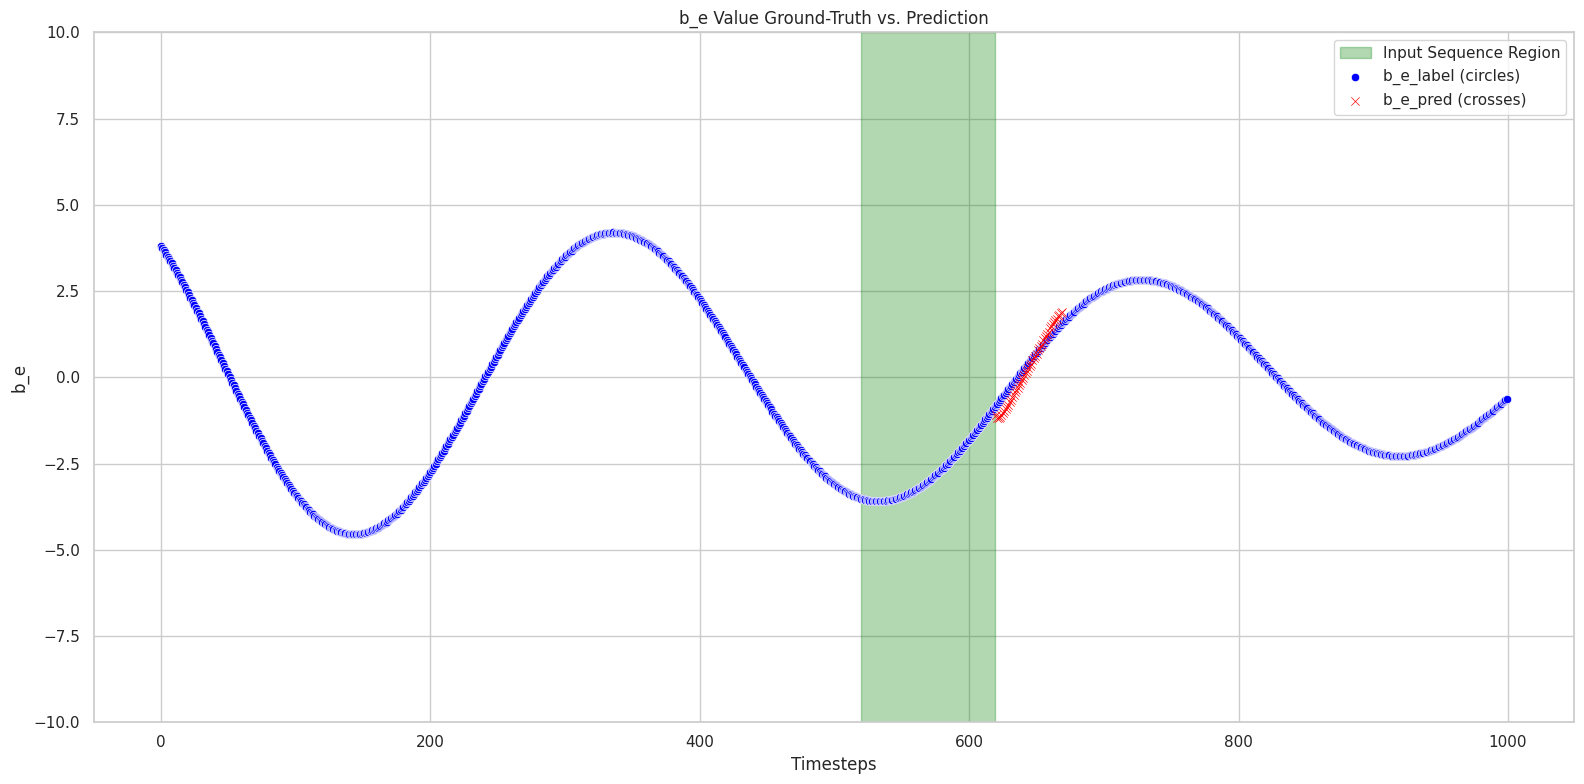

27it [00:06,  4.17it/s, single_test_loss=0.003779]

Output Timestep 621
    Input Timesteps [521 522 523 524 525 526 527 528 529 530]
    Scores ['0.01194', '0.01189', '0.01185', '0.01181', '0.01176', '0.01172', '0.01168', '0.01163', '0.01159', '0.01154']

Output Timestep 622
    Input Timesteps [521 522 523 524 525 526 527 528 529 530]
    Scores ['0.01129', '0.01126', '0.01123', '0.01121', '0.01118', '0.01115', '0.01112', '0.01109', '0.01106', '0.01103']

Output Timestep 623
    Input Timesteps [521 522 523 524 525 526 527 528 529 530]
    Scores ['0.01124', '0.01121', '0.01119', '0.01116', '0.01113', '0.01111', '0.01108', '0.01105', '0.01102', '0.01100']

Output Timestep 624
    Input Timesteps [521 522 523 524 525 526 527 528 529 530]
    Scores ['0.01117', '0.01114', '0.01112', '0.01109', '0.01107', '0.01104', '0.01102', '0.01099', '0.01096', '0.01094']

Output Timestep 625
    Input Timesteps [521 522 523 524 525 526 527 528 529 530]
    Scores ['0.01109', '0.01107', '0.01105', '0.01102', '0.01100', '0.01098', '0.01095', '0.01093'

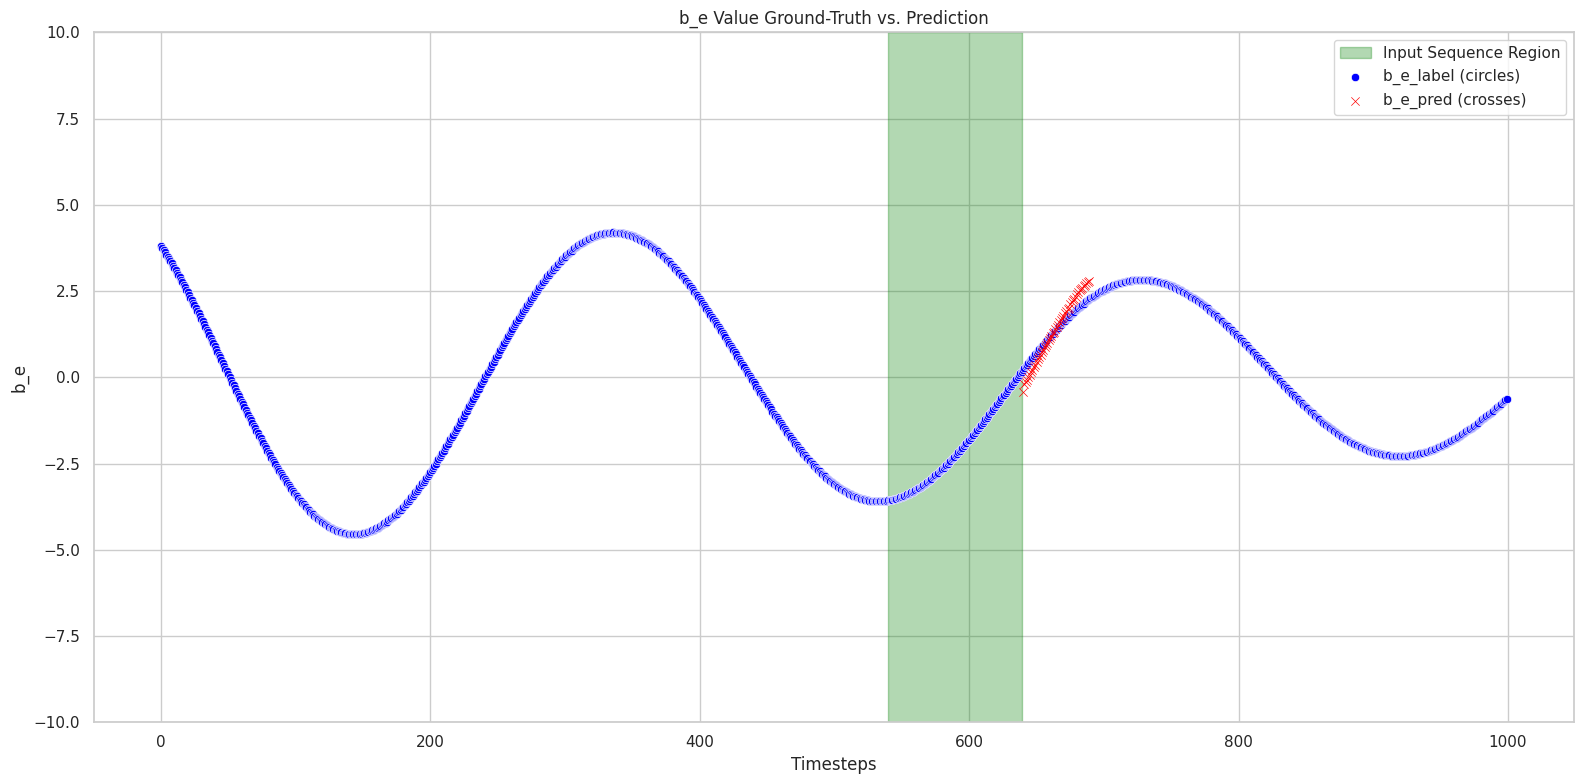

28it [00:06,  4.22it/s, single_test_loss=0.003550]

Output Timestep 641
    Input Timesteps [541 542 543 544 545 546 547 548 549 550]
    Scores ['0.01181', '0.01176', '0.01172', '0.01167', '0.01163', '0.01158', '0.01154', '0.01149', '0.01145', '0.01140']

Output Timestep 642
    Input Timesteps [541 542 543 544 545 546 547 548 549 550]
    Scores ['0.01099', '0.01096', '0.01094', '0.01091', '0.01089', '0.01086', '0.01084', '0.01081', '0.01078', '0.01076']

Output Timestep 643
    Input Timesteps [541 542 543 544 545 546 547 548 549 550]
    Scores ['0.01095', '0.01093', '0.01091', '0.01088', '0.01086', '0.01084', '0.01081', '0.01079', '0.01076', '0.01074']

Output Timestep 644
    Input Timesteps [541 542 543 544 545 546 547 548 549 550]
    Scores ['0.01089', '0.01087', '0.01085', '0.01083', '0.01080', '0.01078', '0.01076', '0.01074', '0.01072', '0.01070']

Output Timestep 645
    Input Timesteps [541 542 543 544 545 546 547 548 549 550]
    Scores ['0.01083', '0.01081', '0.01078', '0.01077', '0.01074', '0.01072', '0.01070', '0.01068'

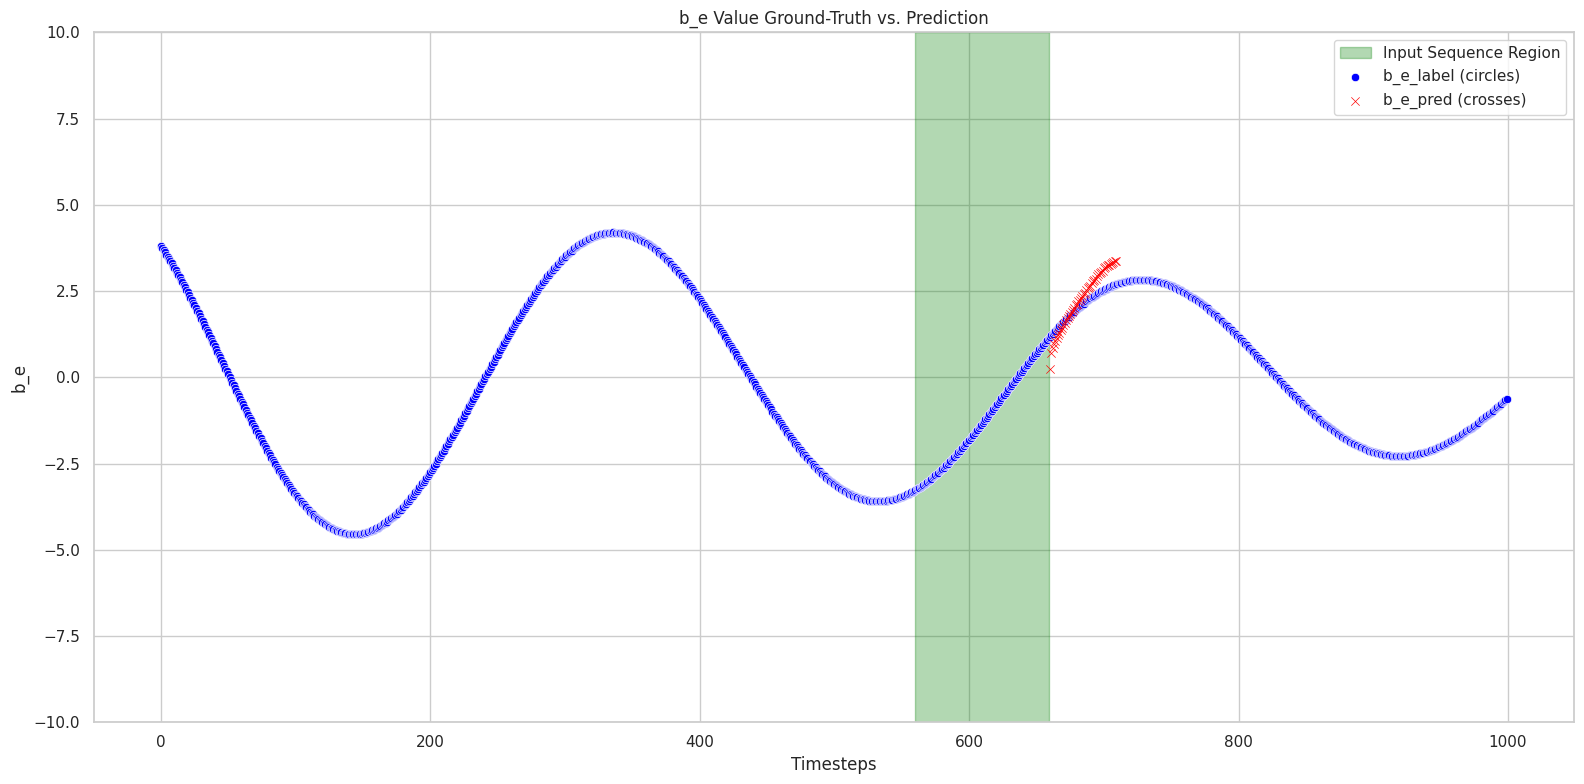

29it [00:07,  4.22it/s, single_test_loss=0.003401]

Output Timestep 661
    Input Timesteps [561 562 563 564 565 566 567 568 569 570]
    Scores ['0.01154', '0.01149', '0.01145', '0.01141', '0.01136', '0.01132', '0.01127', '0.01123', '0.01118', '0.01114']

Output Timestep 662
    Input Timesteps [561 562 563 564 565 566 567 568 569 570]
    Scores ['0.01061', '0.01059', '0.01057', '0.01055', '0.01053', '0.01051', '0.01049', '0.01047', '0.01045', '0.01043']

Output Timestep 663
    Input Timesteps [561 562 563 564 565 566 567 568 569 570]
    Scores ['0.01064', '0.01062', '0.01060', '0.01058', '0.01056', '0.01054', '0.01052', '0.01051', '0.01049', '0.01047']

Output Timestep 664
    Input Timesteps [561 562 563 564 565 566 567 568 569 570]
    Scores ['0.01061', '0.01059', '0.01057', '0.01056', '0.01054', '0.01052', '0.01050', '0.01049', '0.01047', '0.01045']

Output Timestep 665
    Input Timesteps [561 562 563 564 565 566 567 568 569 570]
    Scores ['0.01056', '0.01054', '0.01052', '0.01051', '0.01049', '0.01048', '0.01046', '0.01044'

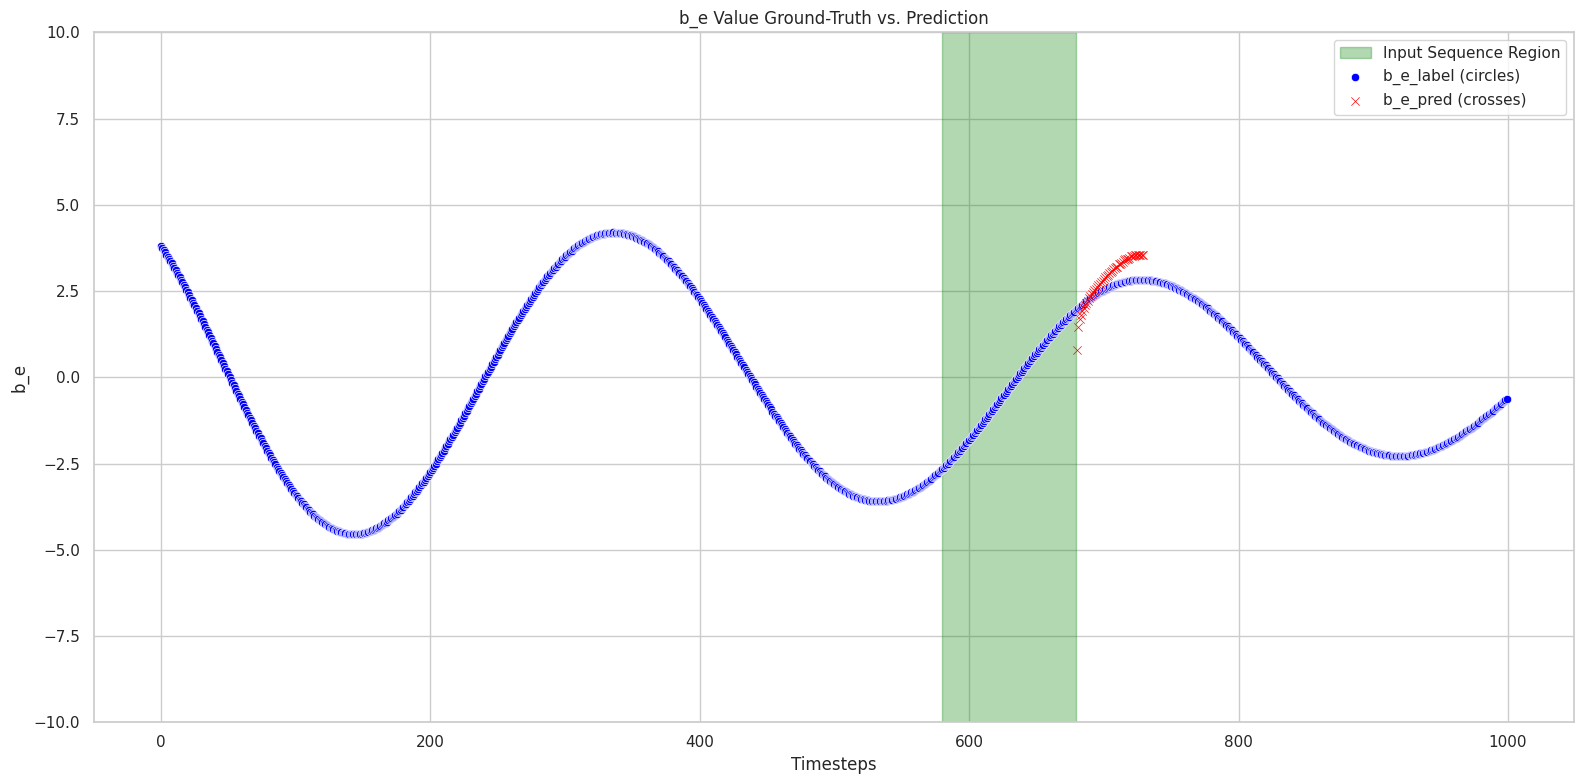

30it [00:07,  4.24it/s, single_test_loss=0.003612]

Output Timestep 681
    Input Timesteps [581 582 583 584 585 586 587 588 589 590]
    Scores ['0.01109', '0.01105', '0.01101', '0.01098', '0.01094', '0.01091', '0.01087', '0.01084', '0.01081', '0.01077']

Output Timestep 682
    Input Timesteps [581 582 583 584 585 586 587 680 588 679]
    Scores ['0.01021', '0.01020', '0.01018', '0.01017', '0.01016', '0.01015', '0.01014', '0.01014', '0.01013', '0.01013']

Output Timestep 683
    Input Timesteps [581 582 583 584 585 586 587 588 589 590]
    Scores ['0.01033', '0.01031', '0.01030', '0.01029', '0.01028', '0.01027', '0.01025', '0.01025', '0.01024', '0.01023']

Output Timestep 684
    Input Timesteps [581 582 583 584 585 586 587 588 589 590]
    Scores ['0.01034', '0.01033', '0.01032', '0.01031', '0.01029', '0.01029', '0.01027', '0.01027', '0.01026', '0.01025']

Output Timestep 685
    Input Timesteps [581 582 583 584 585 586 587 588 589 590]
    Scores ['0.01031', '0.01030', '0.01029', '0.01028', '0.01027', '0.01026', '0.01025', '0.01024'

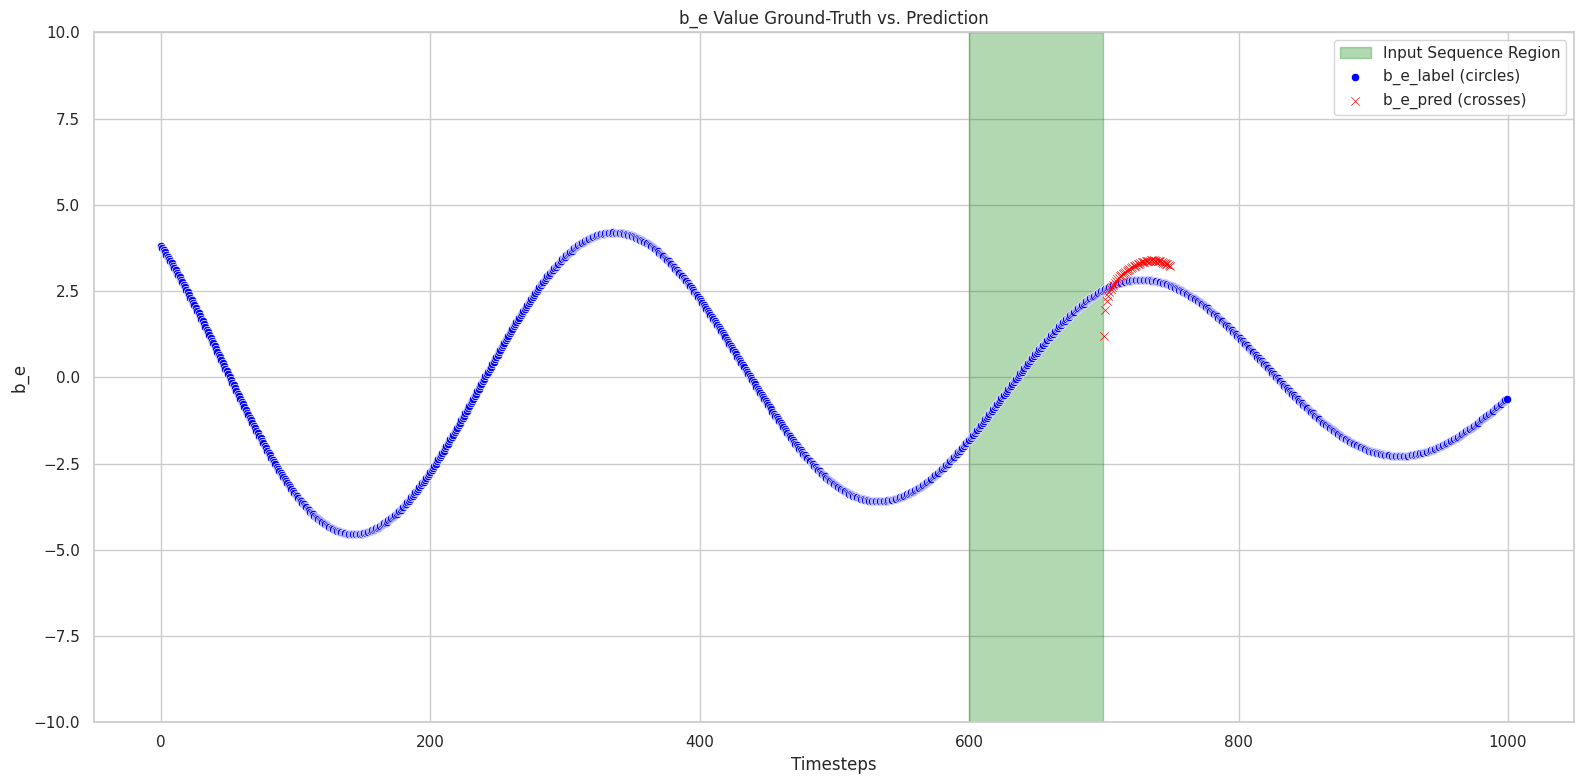

31it [00:07,  4.20it/s, single_test_loss=0.004458]

Output Timestep 701
    Input Timesteps [601 602 603 604 605 606 607 608 609 610]
    Scores ['0.01070', '0.01067', '0.01064', '0.01062', '0.01059', '0.01056', '0.01054', '0.01052', '0.01049', '0.01047']

Output Timestep 702
    Input Timesteps [700 699 698 697 696 695 694 693 692 691]
    Scores ['0.01025', '0.01024', '0.01024', '0.01023', '0.01023', '0.01022', '0.01022', '0.01021', '0.01020', '0.01019']

Output Timestep 703
    Input Timesteps [601 602 603 604 605 606 607 608 609 610]
    Scores ['0.01011', '0.01011', '0.01010', '0.01010', '0.01009', '0.01009', '0.01008', '0.01008', '0.01007', '0.01007']

Output Timestep 704
    Input Timesteps [601 602 603 604 605 606 607 608 609 610]
    Scores ['0.01016', '0.01016', '0.01015', '0.01015', '0.01014', '0.01014', '0.01013', '0.01013', '0.01012', '0.01012']

Output Timestep 705
    Input Timesteps [601 602 603 604 605 606 607 608 609 610]
    Scores ['0.01015', '0.01015', '0.01014', '0.01014', '0.01013', '0.01013', '0.01012', '0.01012'

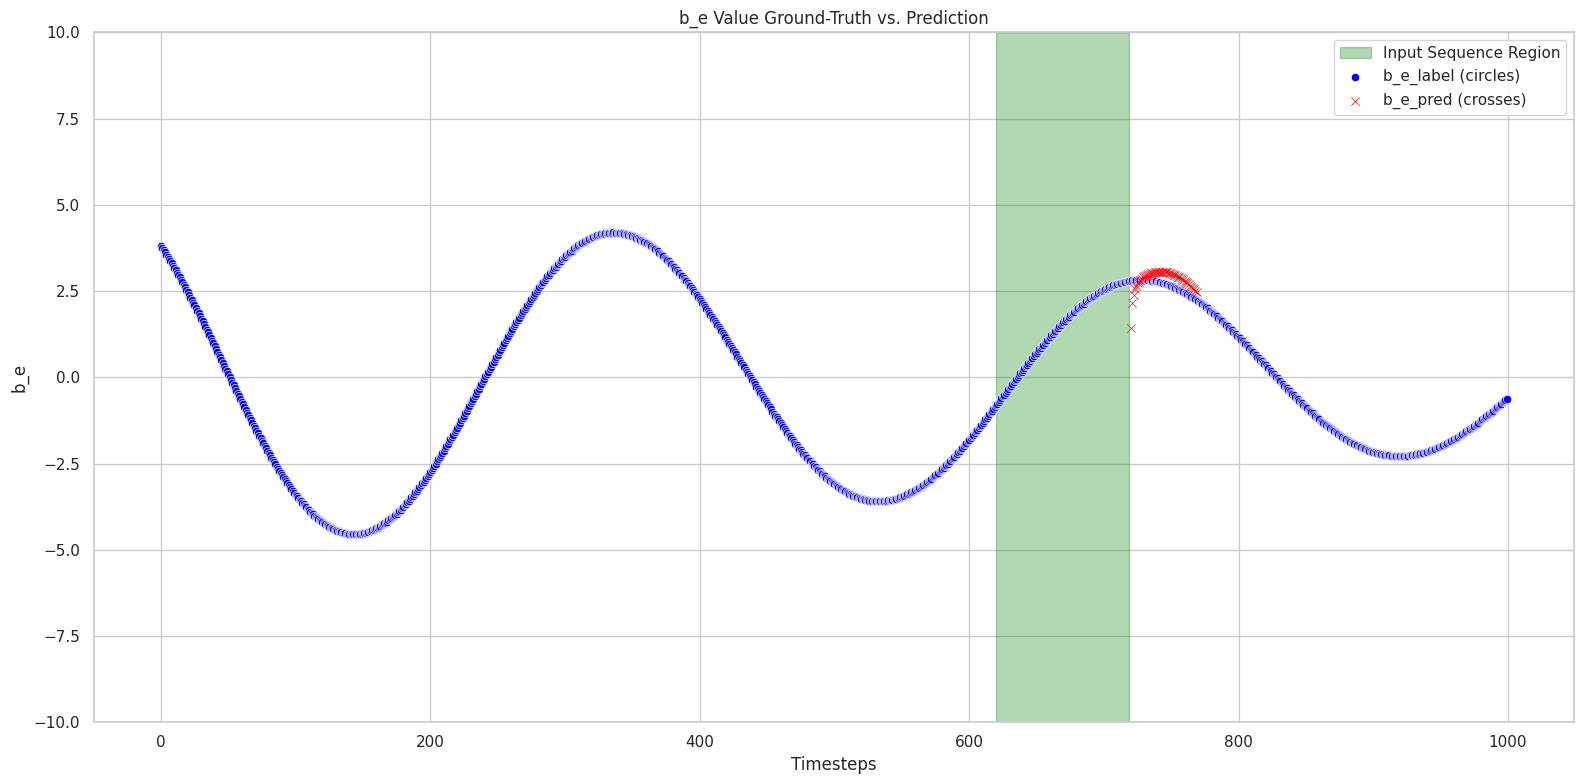

32it [00:07,  4.22it/s, single_test_loss=0.005498]

Output Timestep 721
    Input Timesteps [720 719 621 718 622 717 716 623 624 715]
    Scores ['0.01033', '0.01031', '0.01029', '0.01029', '0.01028', '0.01028', '0.01026', '0.01026', '0.01024', '0.01024']

Output Timestep 722
    Input Timesteps [720 719 718 717 716 715 714 713 712 711]
    Scores ['0.01029', '0.01028', '0.01027', '0.01027', '0.01027', '0.01026', '0.01026', '0.01025', '0.01025', '0.01024']

Output Timestep 723
    Input Timesteps [720 719 718 717 716 715 714 713 712 711]
    Scores ['0.01011', '0.01011', '0.01010', '0.01010', '0.01010', '0.01010', '0.01009', '0.01009', '0.01009', '0.01009']

Output Timestep 724
    Input Timesteps [720 719 718 717 716 715 714 713 712 711]
    Scores ['0.01005', '0.01004', '0.01004', '0.01004', '0.01004', '0.01004', '0.01004', '0.01004', '0.01003', '0.01003']

Output Timestep 725
    Input Timesteps [720 719 718 717 716 715 714 713 712 711]
    Scores ['0.01004', '0.01003', '0.01003', '0.01003', '0.01003', '0.01003', '0.01003', '0.01003'

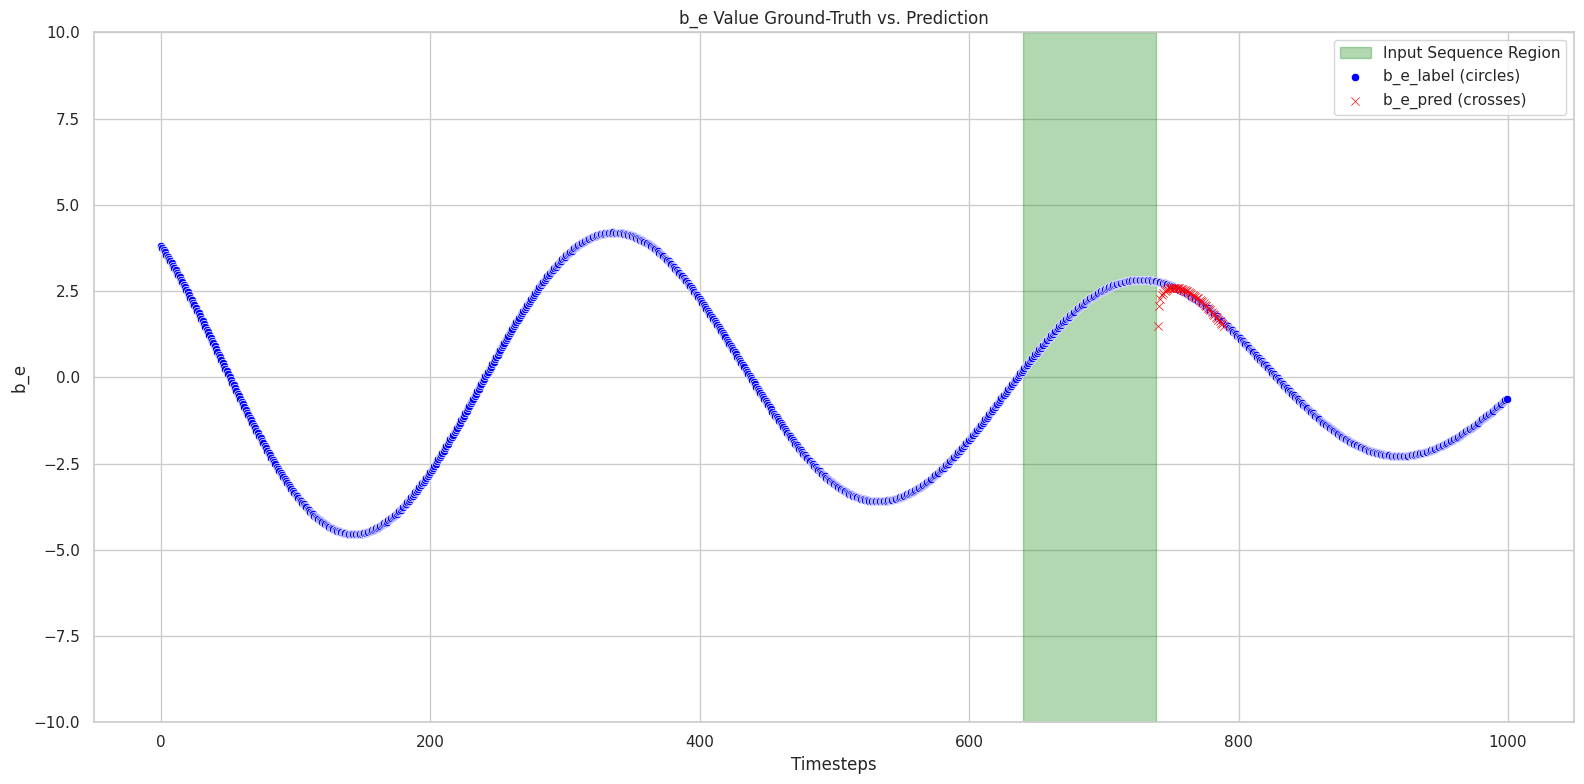

33it [00:08,  4.21it/s, single_test_loss=0.005429]

Output Timestep 741
    Input Timesteps [740 739 738 737 736 735 734 733 732 731]
    Scores ['0.01056', '0.01054', '0.01052', '0.01051', '0.01049', '0.01047', '0.01046', '0.01044', '0.01042', '0.01041']

Output Timestep 742
    Input Timesteps [740 739 738 737 736 735 734 733 732 731]
    Scores ['0.01036', '0.01035', '0.01035', '0.01034', '0.01034', '0.01034', '0.01033', '0.01033', '0.01032', '0.01032']

Output Timestep 743
    Input Timesteps [740 739 738 737 736 735 734 733 732 731]
    Scores ['0.01023', '0.01023', '0.01022', '0.01022', '0.01022', '0.01021', '0.01021', '0.01021', '0.01020', '0.01020']

Output Timestep 744
    Input Timesteps [740 739 738 737 736 735 734 733 732 731]
    Scores ['0.01018', '0.01018', '0.01018', '0.01017', '0.01017', '0.01017', '0.01017', '0.01016', '0.01016', '0.01016']

Output Timestep 745
    Input Timesteps [740 739 738 737 736 735 734 733 732 731]
    Scores ['0.01017', '0.01017', '0.01017', '0.01017', '0.01016', '0.01016', '0.01016', '0.01016'

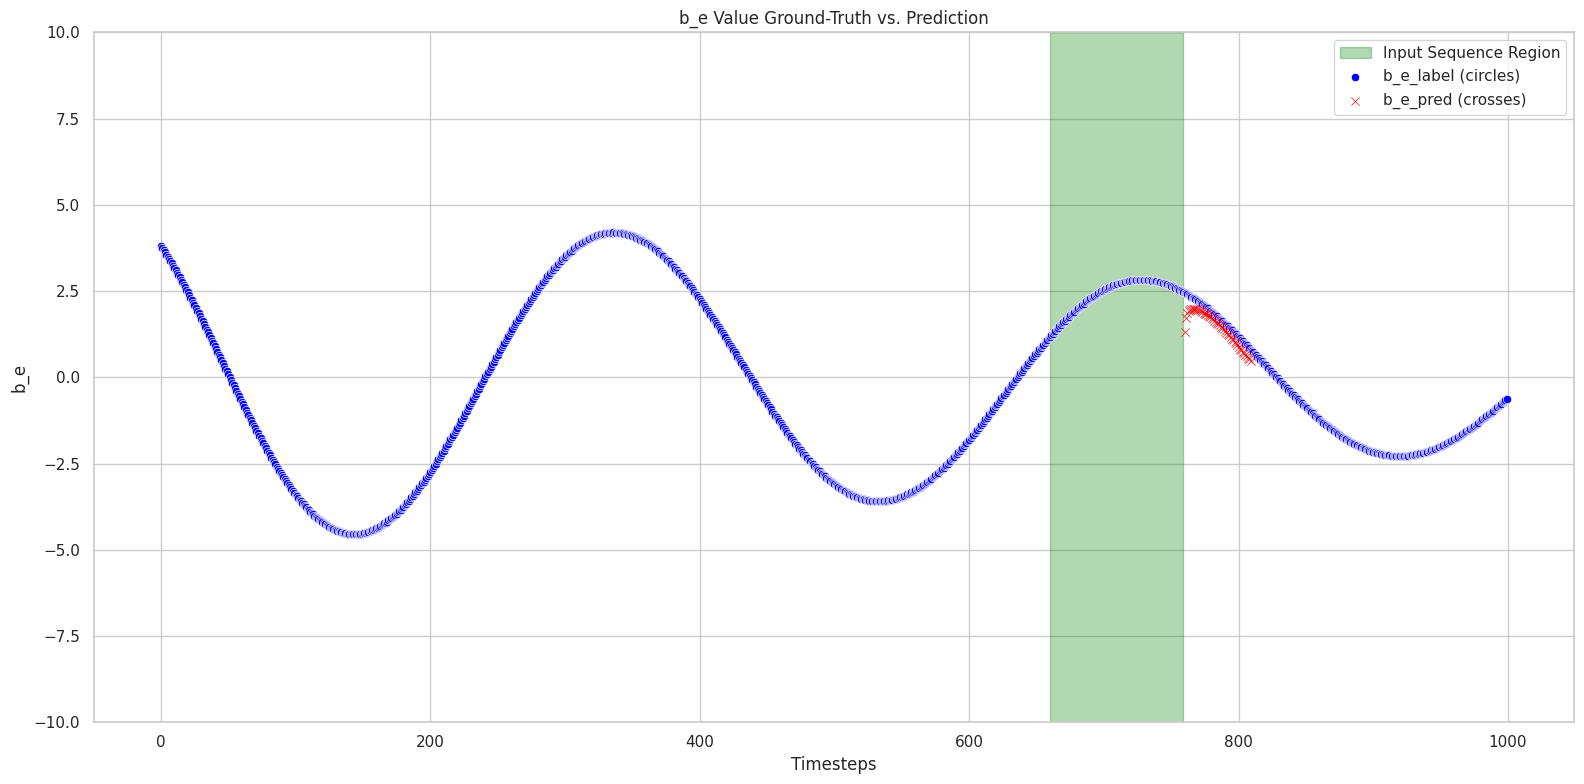

34it [00:08,  4.25it/s, single_test_loss=0.004772]

Output Timestep 761
    Input Timesteps [760 759 758 757 756 755 754 753 752 751]
    Scores ['0.01064', '0.01062', '0.01061', '0.01059', '0.01058', '0.01056', '0.01055', '0.01054', '0.01052', '0.01051']

Output Timestep 762
    Input Timesteps [760 759 758 757 756 755 754 753 752 751]
    Scores ['0.01038', '0.01038', '0.01037', '0.01037', '0.01037', '0.01036', '0.01036', '0.01035', '0.01035', '0.01035']

Output Timestep 763
    Input Timesteps [760 759 758 757 756 755 754 753 752 751]
    Scores ['0.01030', '0.01030', '0.01029', '0.01029', '0.01029', '0.01028', '0.01028', '0.01028', '0.01027', '0.01027']

Output Timestep 764
    Input Timesteps [760 759 758 757 756 755 754 753 752 751]
    Scores ['0.01027', '0.01026', '0.01026', '0.01026', '0.01026', '0.01025', '0.01025', '0.01025', '0.01024', '0.01024']

Output Timestep 765
    Input Timesteps [760 759 758 757 756 755 754 753 752 751]
    Scores ['0.01026', '0.01026', '0.01026', '0.01025', '0.01025', '0.01025', '0.01024', '0.01024'

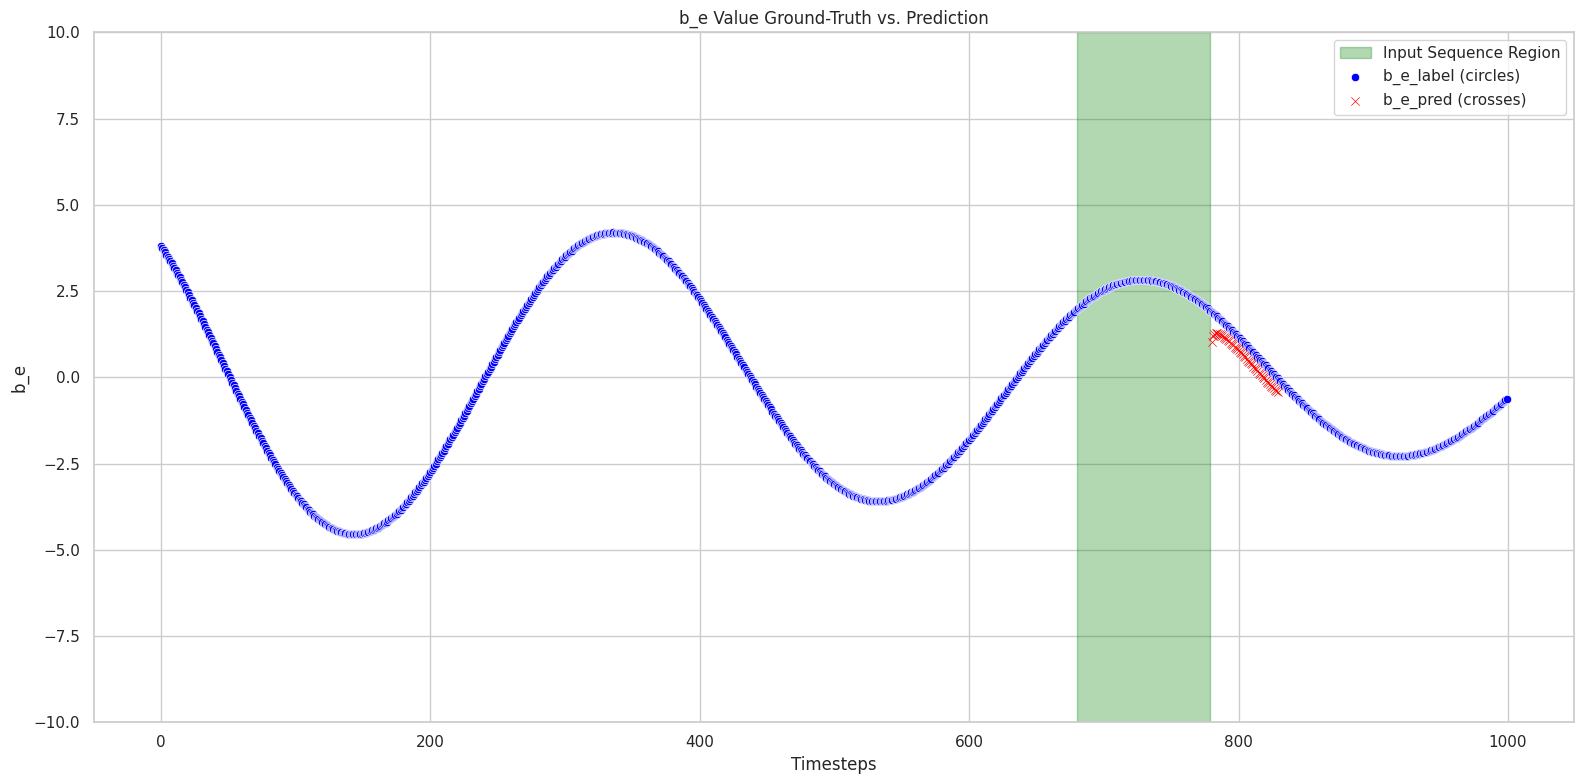

35it [00:08,  4.23it/s, single_test_loss=0.004548]

Output Timestep 781
    Input Timesteps [780 779 778 777 776 775 774 773 772 771]
    Scores ['0.01053', '0.01052', '0.01051', '0.01050', '0.01050', '0.01049', '0.01048', '0.01047', '0.01046', '0.01045']

Output Timestep 782
    Input Timesteps [778 779 780 777 776 775 774 773 772 771]
    Scores ['0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01035']

Output Timestep 783
    Input Timesteps [778 779 780 777 776 775 774 773 772 771]
    Scores ['0.01031', '0.01031', '0.01031', '0.01031', '0.01031', '0.01031', '0.01031', '0.01031', '0.01031', '0.01031']

Output Timestep 784
    Input Timesteps [778 779 780 777 776 775 774 773 772 771]
    Scores ['0.01030', '0.01030', '0.01030', '0.01030', '0.01030', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029']

Output Timestep 785
    Input Timesteps [778 780 779 777 776 775 774 773 772 771]
    Scores ['0.01030', '0.01030', '0.01030', '0.01030', '0.01030', '0.01030', '0.01030', '0.01029'

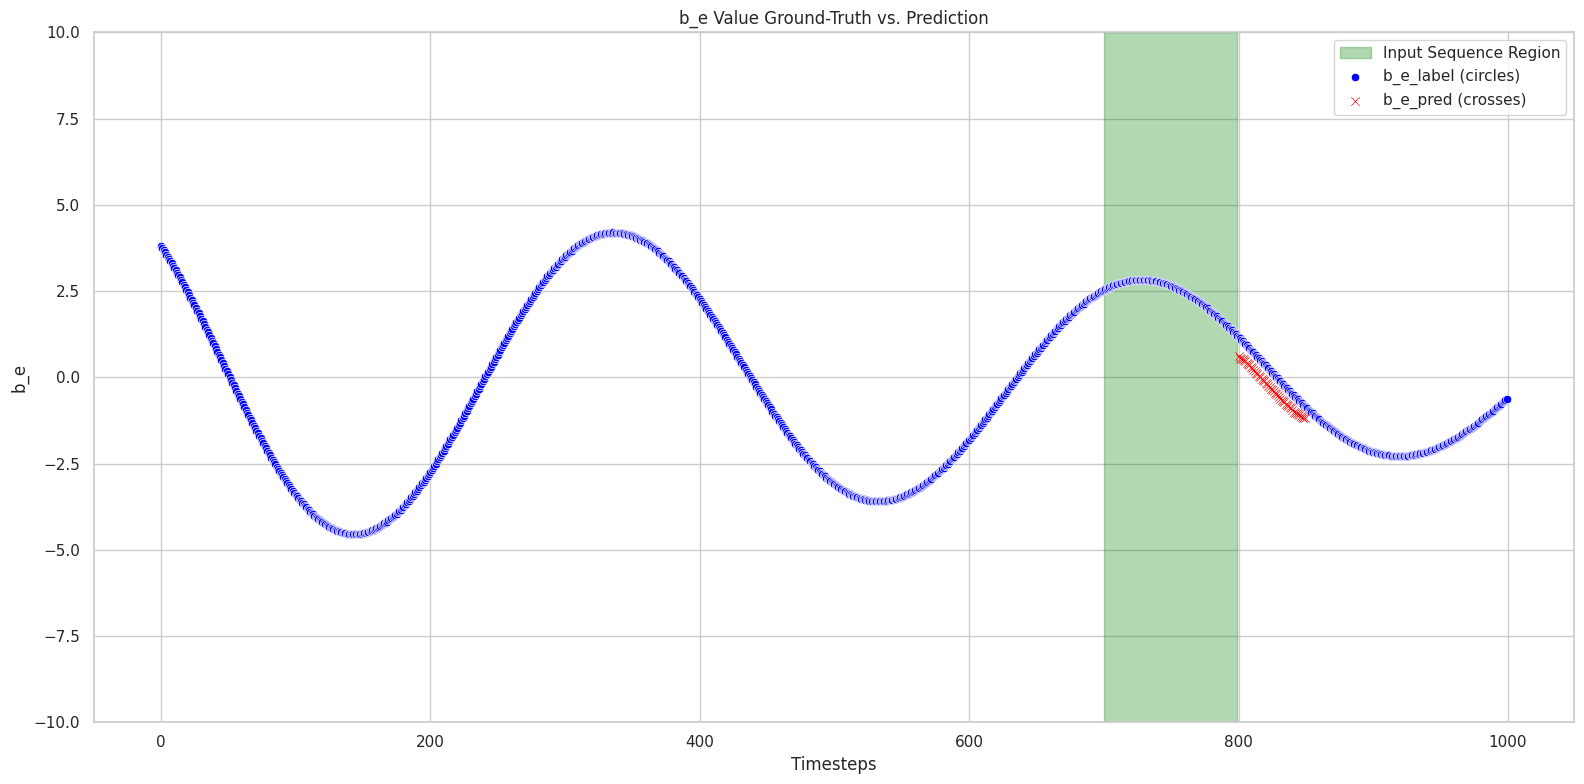

36it [00:08,  4.26it/s, single_test_loss=0.004763]

Output Timestep 801
    Input Timesteps [800 799 798 797 796 795 794 793 792 791]
    Scores ['0.01032', '0.01032', '0.01031', '0.01031', '0.01030', '0.01030', '0.01029', '0.01029', '0.01029', '0.01028']

Output Timestep 802
    Input Timesteps [791 790 789 792 794 793 795 788 796 797]
    Scores ['0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029']

Output Timestep 803
    Input Timesteps [791 790 789 792 794 793 788 795 796 797]
    Scores ['0.01027', '0.01027', '0.01027', '0.01027', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026']

Output Timestep 804
    Input Timesteps [791 790 789 792 794 793 795 796 788 797]
    Scores ['0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026', '0.01026']

Output Timestep 805
    Input Timesteps [791 792 790 794 795 793 789 796 797 800]
    Scores ['0.01027', '0.01027', '0.01027', '0.01027', '0.01027', '0.01027', '0.01027', '0.01027'

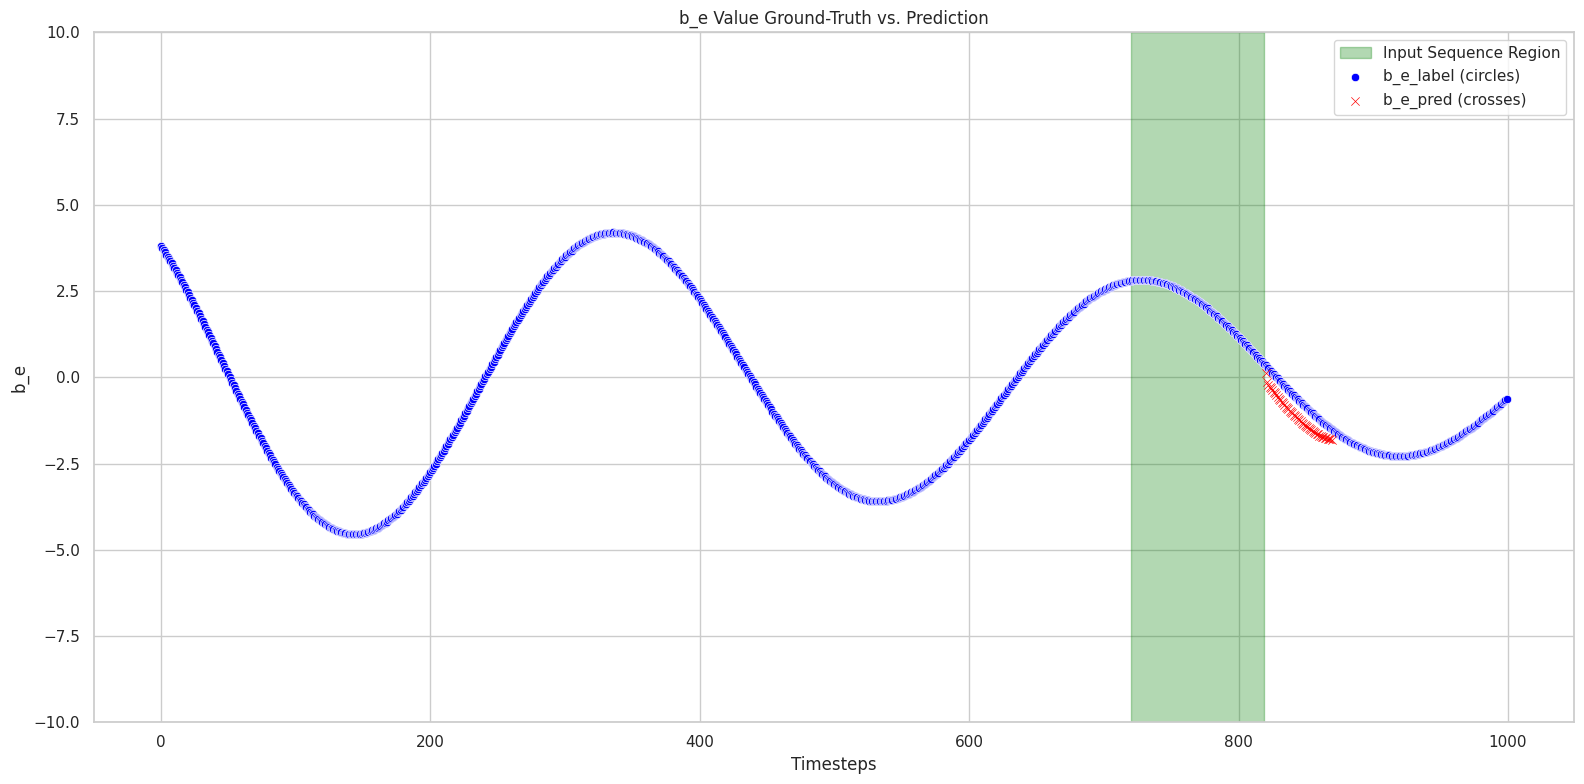

37it [00:09,  4.25it/s, single_test_loss=0.005150]

Output Timestep 821
    Input Timesteps [811 810 809 812 808 813 814 815 807 816]
    Scores ['0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010']

Output Timestep 822
    Input Timesteps [809 808 810 807 806 811 805 812 804 813]
    Scores ['0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01022']

Output Timestep 823
    Input Timesteps [809 808 807 810 806 811 805 804 812 803]
    Scores ['0.01022', '0.01022', '0.01022', '0.01022', '0.01022', '0.01022', '0.01022', '0.01022', '0.01022', '0.01021']

Output Timestep 824
    Input Timesteps [809 808 810 807 811 806 805 812 804 813]
    Scores ['0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01023', '0.01022', '0.01022', '0.01022', '0.01022']

Output Timestep 825
    Input Timesteps [809 810 808 811 807 806 812 805 813 814]
    Scores ['0.01024', '0.01024', '0.01024', '0.01024', '0.01024', '0.01024', '0.01024', '0.01024'

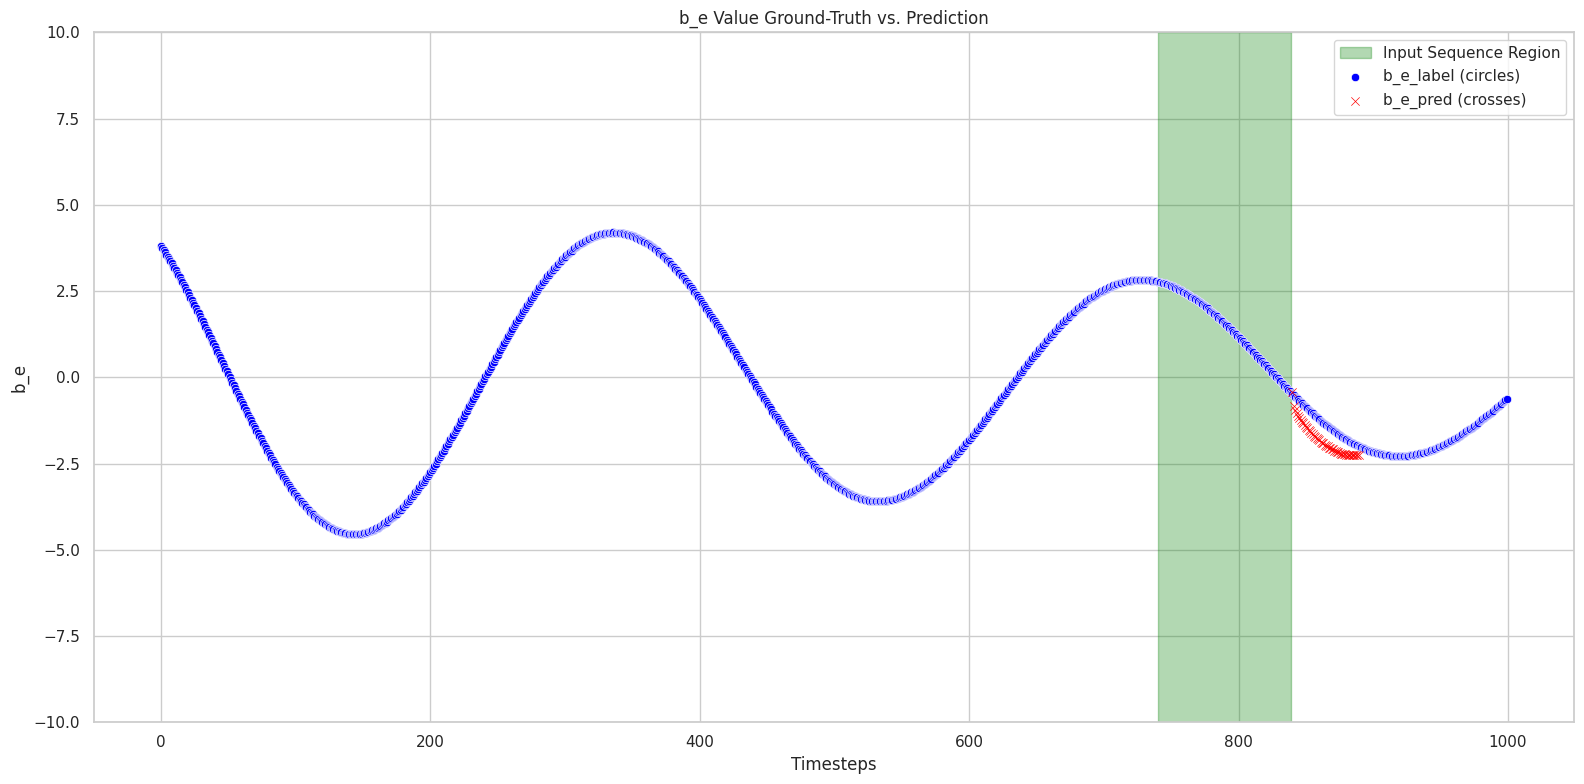

38it [00:09,  4.24it/s, single_test_loss=0.005515]

Output Timestep 841
    Input Timesteps [756 757 758 759 755 760 761 754 762 763]
    Scores ['0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010']

Output Timestep 842
    Input Timesteps [825 824 823 826 822 821 827 820 814 815]
    Scores ['0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01013', '0.01013', '0.01013', '0.01013']

Output Timestep 843
    Input Timesteps [825 824 823 822 821 826 814 813 820 815]
    Scores ['0.01013', '0.01013', '0.01013', '0.01013', '0.01013', '0.01013', '0.01013', '0.01013', '0.01013', '0.01013']

Output Timestep 844
    Input Timesteps [825 824 823 826 822 821 827 820 828 819]
    Scores ['0.01015', '0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01014']

Output Timestep 845
    Input Timesteps [825 824 826 823 827 822 828 821 829 820]
    Scores ['0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016'

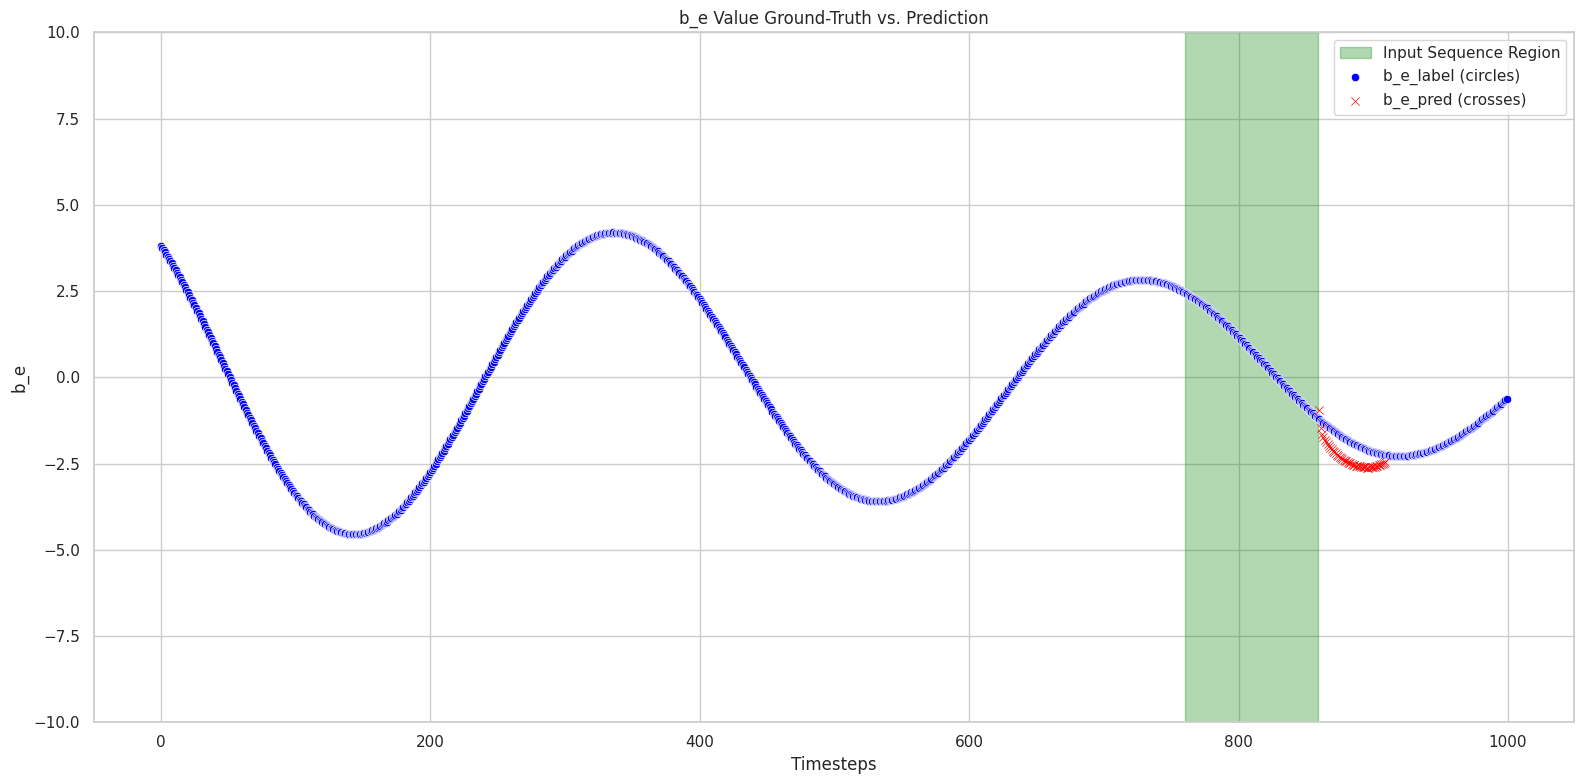

39it [00:09,  4.21it/s, single_test_loss=0.005759]

Output Timestep 861
    Input Timesteps [761 762 763 764 765 766 767 768 769 770]
    Scores ['0.01032', '0.01031', '0.01031', '0.01030', '0.01030', '0.01030', '0.01030', '0.01029', '0.01029', '0.01028']

Output Timestep 862
    Input Timesteps [815 816 814 817 813 818 812 819 811 820]
    Scores ['0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010']

Output Timestep 863
    Input Timesteps [815 814 816 813 817 812 818 811 810 819]
    Scores ['0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010']

Output Timestep 864
    Input Timesteps [816 815 817 814 818 813 819 820 812 811]
    Scores ['0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010']

Output Timestep 865
    Input Timesteps [818 817 819 816 820 815 821 814 822 813]
    Scores ['0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010', '0.01010'

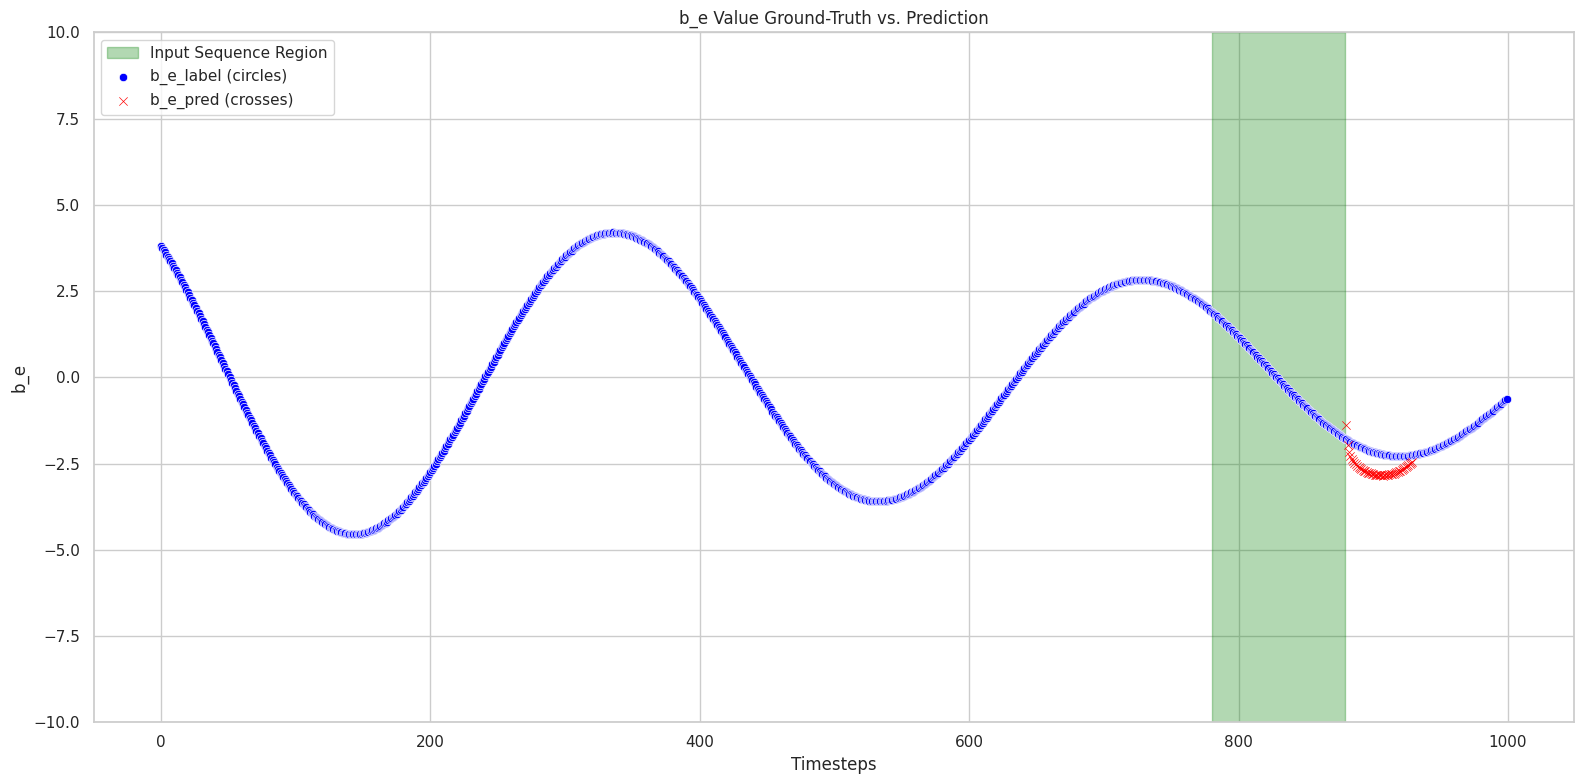

40it [00:09,  4.25it/s, single_test_loss=0.005933]

Output Timestep 881
    Input Timesteps [781 782 783 784 785 786 787 788 789 790]
    Scores ['0.01058', '0.01057', '0.01056', '0.01055', '0.01055', '0.01054', '0.01053', '0.01052', '0.01051', '0.01050']

Output Timestep 882
    Input Timesteps [799 800 798 801 797 802 796 803 804 805]
    Scores ['0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016']

Output Timestep 883
    Input Timesteps [799 800 798 801 797 802 796 803 804 805]
    Scores ['0.01017', '0.01017', '0.01017', '0.01017', '0.01017', '0.01017', '0.01017', '0.01017', '0.01017', '0.01017']

Output Timestep 884
    Input Timesteps [801 800 802 799 805 804 806 803 807 798]
    Scores ['0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01016', '0.01015', '0.01015', '0.01015', '0.01015']

Output Timestep 885
    Input Timesteps [807 808 806 809 805 804 810 803 802 811]
    Scores ['0.01014', '0.01014', '0.01014', '0.01014', '0.01014', '0.01013', '0.01013', '0.01013'

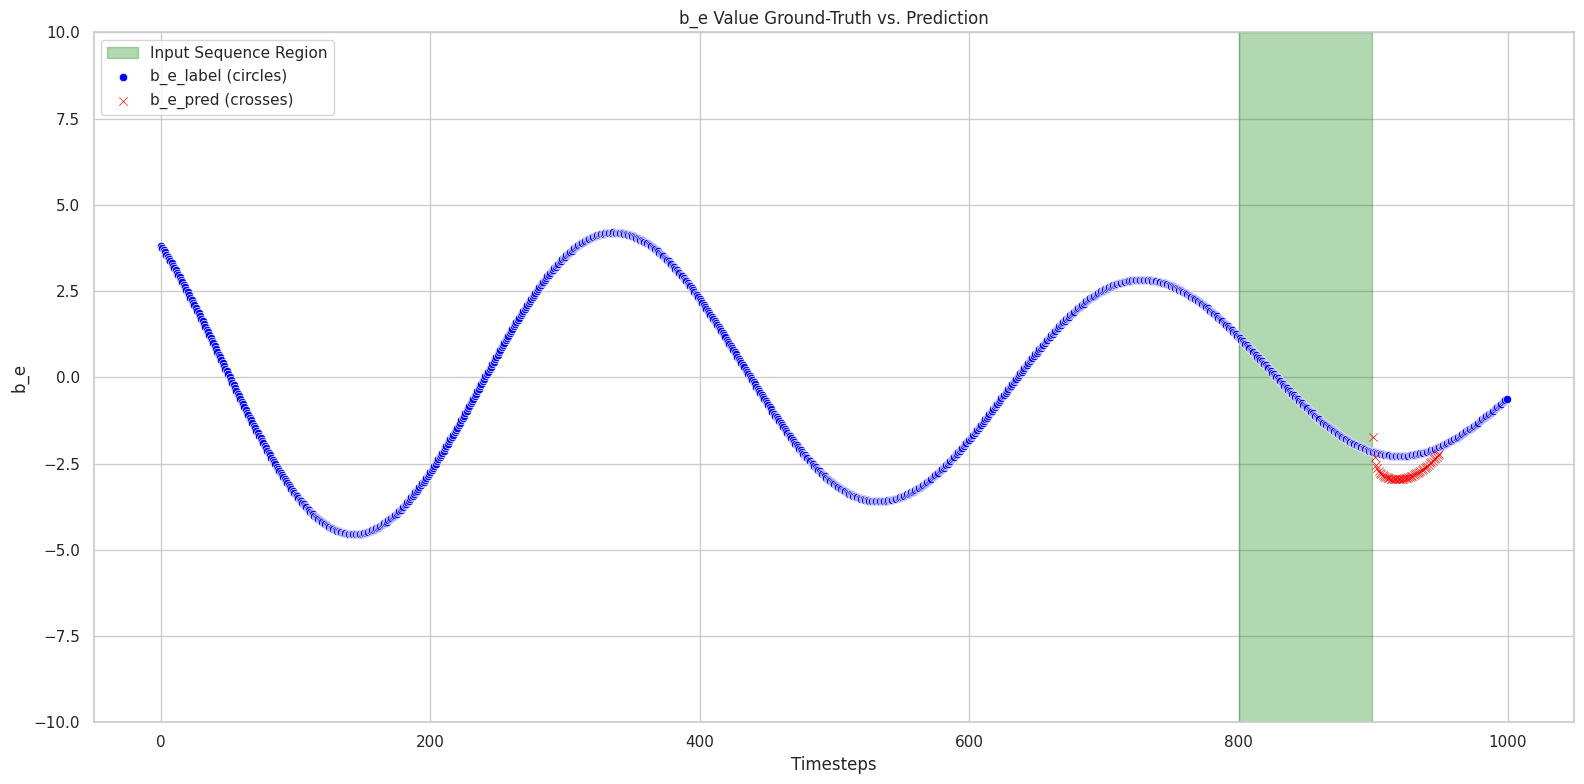

41it [00:09,  4.25it/s, single_test_loss=0.005877]

Output Timestep 901
    Input Timesteps [801 802 803 804 805 806 807 808 809 810]
    Scores ['0.01076', '0.01075', '0.01074', '0.01072', '0.01071', '0.01070', '0.01069', '0.01068', '0.01066', '0.01065']

Output Timestep 902
    Input Timesteps [802 801 803 804 806 807 805 808 809 810]
    Scores ['0.01034', '0.01034', '0.01034', '0.01034', '0.01034', '0.01034', '0.01034', '0.01034', '0.01033', '0.01033']

Output Timestep 903
    Input Timesteps [802 801 803 804 806 805 807 808 809 810]
    Scores ['0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01036', '0.01035', '0.01035', '0.01035']

Output Timestep 904
    Input Timesteps [802 803 807 806 801 804 805 808 809 810]
    Scores ['0.01033', '0.01033', '0.01033', '0.01033', '0.01033', '0.01033', '0.01033', '0.01033', '0.01033', '0.01033']

Output Timestep 905
    Input Timesteps [807 806 810 809 808 811 805 804 812 803]
    Scores ['0.01030', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029', '0.01029'

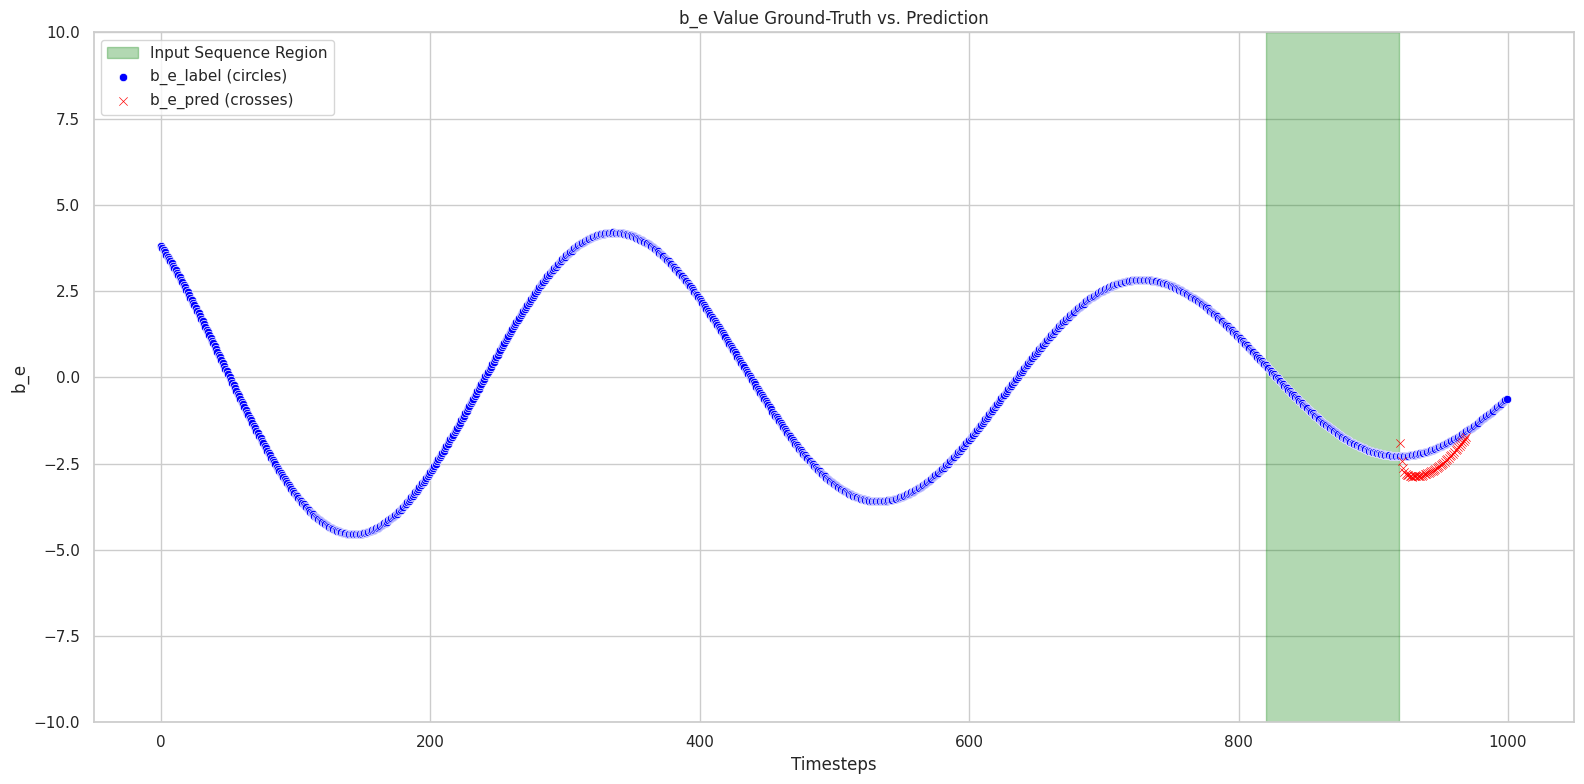

42it [00:10,  4.28it/s, single_test_loss=0.005568]

Output Timestep 921
    Input Timesteps [821 822 823 824 825 826 827 828 829 830]
    Scores ['0.01082', '0.01080', '0.01079', '0.01077', '0.01076', '0.01074', '0.01073', '0.01071', '0.01070', '0.01068']

Output Timestep 922
    Input Timesteps [821 822 823 824 825 826 827 828 829 830]
    Scores ['0.01047', '0.01047', '0.01046', '0.01046', '0.01045', '0.01045', '0.01045', '0.01044', '0.01043', '0.01043']

Output Timestep 923
    Input Timesteps [821 822 823 824 825 826 827 828 829 830]
    Scores ['0.01049', '0.01049', '0.01048', '0.01048', '0.01047', '0.01047', '0.01047', '0.01046', '0.01045', '0.01045']

Output Timestep 924
    Input Timesteps [821 822 823 824 825 826 827 828 829 830]
    Scores ['0.01047', '0.01046', '0.01046', '0.01045', '0.01045', '0.01045', '0.01044', '0.01044', '0.01043', '0.01043']

Output Timestep 925
    Input Timesteps [821 822 823 824 825 826 827 828 829 830]
    Scores ['0.01043', '0.01042', '0.01042', '0.01042', '0.01041', '0.01041', '0.01041', '0.01040'

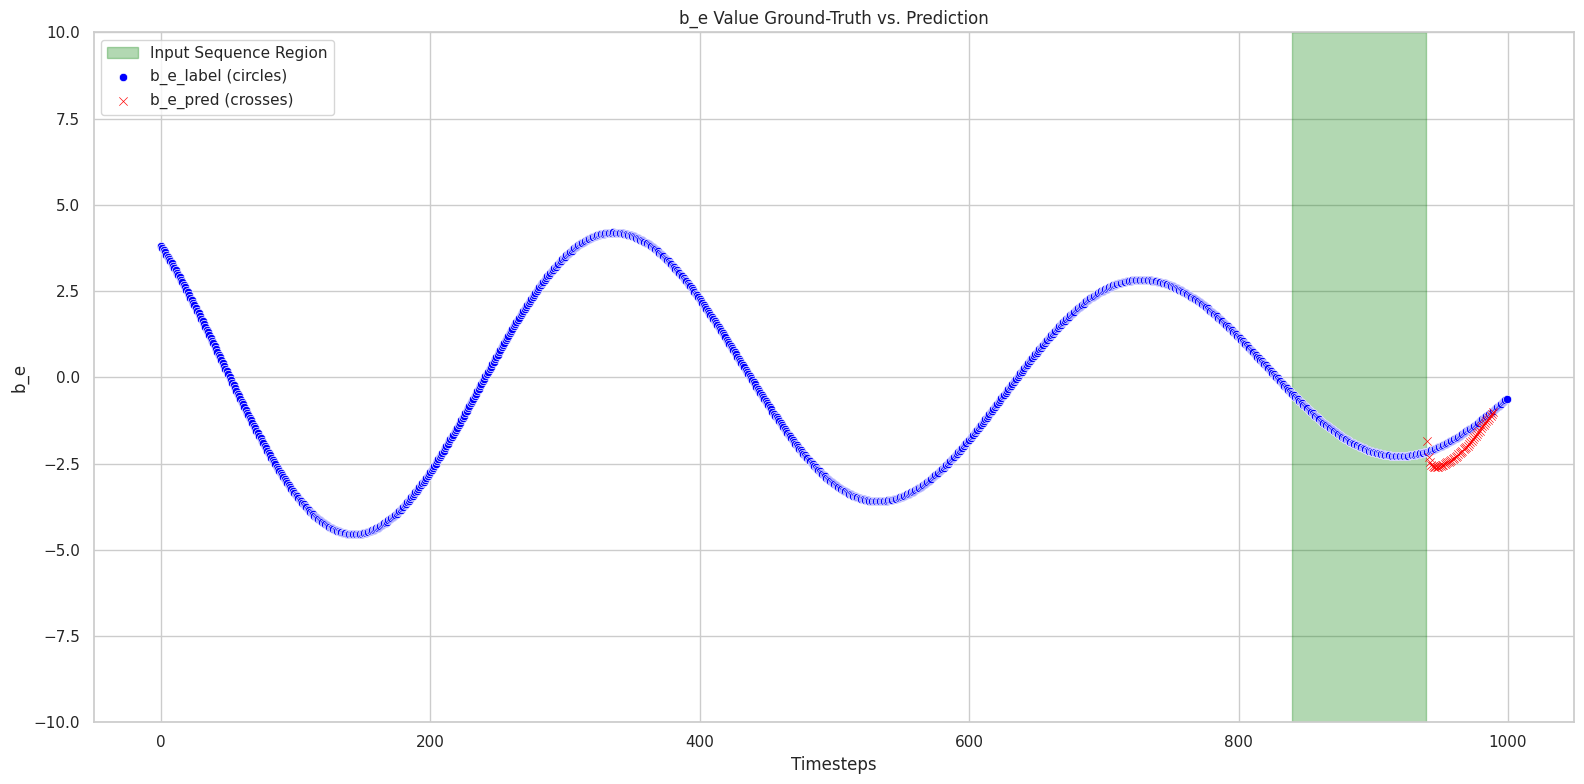

1223it [00:10, 1809.55it/s, single_test_loss=0.005568]

Output Timestep 941
    Input Timesteps [841 842 843 844 845 846 847 848 849 850]
    Scores ['0.01088', '0.01087', '0.01085', '0.01084', '0.01082', '0.01081', '0.01079', '0.01077', '0.01076', '0.01074']

Output Timestep 942
    Input Timesteps [841 842 843 844 845 846 847 848 849 850]
    Scores ['0.01057', '0.01057', '0.01056', '0.01055', '0.01055', '0.01054', '0.01053', '0.01053', '0.01052', '0.01051']

Output Timestep 943
    Input Timesteps [841 842 843 844 845 846 847 848 849 850]
    Scores ['0.01059', '0.01058', '0.01057', '0.01057', '0.01056', '0.01055', '0.01055', '0.01054', '0.01053', '0.01052']

Output Timestep 944
    Input Timesteps [841 842 843 844 845 846 847 848 849 850]
    Scores ['0.01056', '0.01055', '0.01055', '0.01054', '0.01053', '0.01053', '0.01052', '0.01052', '0.01051', '0.01050']

Output Timestep 945
    Input Timesteps [841 842 843 844 845 846 847 848 849 850]
    Scores ['0.01052', '0.01051', '0.01051', '0.01050', '0.01050', '0.01049', '0.01049', '0.01048'

210915it [00:28, 7344.52it/s, single_test_loss=0.005568] 


In [6]:
test_loss = 0.0
test_progress_bar = tqdm(
    data_loader_test
)

criterion = torch.nn.MSELoss()

target_timeseries_idx = 0
feature = "b_e"
figure_range = 10

num_datapoints_per_timeseries = 1 + (num_single_sample_timesteps - (input_window_length + label_window_length) + 1) // window_stride

with torch.no_grad():
    for datapoint_idx, (batch_x, batch_y, x_labels) in enumerate(test_progress_bar):
        if(datapoint_idx >= target_timeseries_idx * num_datapoints_per_timeseries and datapoint_idx < (target_timeseries_idx + 1) * num_datapoints_per_timeseries):
            window_idx = datapoint_idx % num_datapoints_per_timeseries

            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            preds = autoregress(
                model = model,
                batch_x = batch_x,
                batch_y = batch_y,
                device = device,
                extract_attention = True
            )
            
            loss = criterion(preds, batch_y)
            test_progress_bar.set_postfix({
                "single_test_loss": f"{loss.item():.6f}"
            })

            x = list(range(num_single_sample_timesteps))

            feature_idx = label_features.index(feature)

            feature_label = batch_y[0, :, feature_idx].cpu()
            feature_pred = preds[0, :, feature_idx].cpu()
            feature_x_labels = x_labels[0, :, feature_idx]

            feature_pred = (feature_pred * stats["std"][feature]) + stats["mean"][feature]
            feature_label = (feature_label * stats["std"][feature]) + stats["mean"][feature]
            feature_x_labels = (feature_x_labels * stats["std"][feature]) + stats["mean"][feature]

            sns.set_theme(style = "whitegrid")
            fig, ax = plt.subplots(figsize = (16, 8))
            ax.set_ylim(-figure_range, figure_range)

            ax.axvspan(
                x[window_idx * window_stride],
                x[window_idx * window_stride + input_window_length - 1],
                color = "green",
                alpha = 0.3,
                label = "Input Sequence Region"
            )

            sns.scatterplot(
                x = x,
                y = feature_x_labels,
                marker = "o",
                label = f"{feature}_label (circles)",
                color = "blue",
                ax = ax
            )

            sns.scatterplot(
                x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
                y = feature_pred,
                marker = "x",
                label = f"{feature}_pred (crosses)",
                color = "red",
                ax = ax
            )

            ax.set_title(f"{feature} Value Ground-Truth vs. Prediction")
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(feature)
            ax.legend()

            plt.tight_layout()
            plt.show()
            
            avg_attn_vals = model.get_average_attention_values()

            for i in range(20):                                      # First 20 predictions following input sequence 
                output_row = avg_attn_vals[i, :]
                top_k_indices = np.argsort(output_row)[::-1][:10]    # Top 10 highest attention input timesteps
                top_k_scores = output_row[top_k_indices]
                print(f"Output Timestep {input_window_length + window_idx * window_stride + i + 1}")
                print(f"    Input Timesteps {top_k_indices + (window_idx * window_stride + 1)}")
                print(f"    Scores {[f'{score:.5f}' for score in top_k_scores]}\n")
